<a href="https://colab.research.google.com/github/MinhTriLD/Impact_prediction_and-Customer_segmentation/blob/main/Trade_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fashion-boutique-chain:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4485158%2F7686254%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240223%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240223T164239Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3f2bed2b851a9ae928d52ebb6dda842b8a17b76eb6d8711b1f370d99a4bb190cdcb9bc694a5354544b32b7ebd0eed967c40ff77ccec787efe084fc9586cf4dd4762162ef6655b6fb92348c13874332f3674c2419b00c5bcf5c8cdb5d148affd4e8d89a31dc639133cdca12ba1572da1210b4a7aa29336978d38393ad1b487fba28bfacaf3d68aff378bcf821d67a923d5306a18c7eaf3770b61433ebce2f654045aac1a1ce55f0100719478a746f774c7a2e43f36d937ac972186e959d46d68dbd44e2352887557c84faa1b7e734dbc88c53e3d6a6315f7fa4edd152ba4c1da3678f05ec3d9b0b4d3bd079487de1809ab39d6cda320ce87a43f1f9bc654db512'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3211013 bytes downloaded
Downloaded and uncompressed: fashion-boutique-chain
Data source import complete.


# <b><u> Fashion boutique – Trade marketing
## - How web traffic impacts on business performance?
## - Customer segmentation

## <b><u>Abstract:</u></b>
A Company has been operated it's business as a fashion boutique chain since the March of 2019. They are possessing stores in each country’s capital: UK (London); FR (Paris); IT (Milan); GER (Berlin). Since the end of 2019, to enhance the business performance, BoDs have intend to invest in applying technical solutions such as website and big data into their business.
    
This company kicked off a website at the beginning of 2020. This is an experiment for the marketing promotion, thus, they just fund a static web with a few simple functiom for only the display of the boutiques information, product detail, pictures and purchasing contact. The website has not been combined the functions to process the data input by web users to determine web user and collect vital data. This web just has able to count distinct user ('users'), page view ('pageviews') and unique page view based on loading within a certain duration ('uniquePageviews') for each web page of each product.
    
To make decision for investing the web upgraded to  dynamic functions matching for the E-commerce, the board of management requested a coverage of the website traffic's impact on business performance. Another request is to determine personal group of current customers.
    
The material is supplied to complete this mission, includes the documents in type of Excel file (.xlsx), which record the traffic of each each 2020's month and a compound file containing sheets where data of customers, items and transactions.
    
Some feature has been encoded or changed to conceal the identification.
    
### <b><u>Request 1:</u></b> How web traffic impacts on business performance?
    
### <b><u>Request 2:</u></b> Customer segmentation.
    


## <b><u>Input data:</u></b>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashion-boutique-chain/2020_07.xlsx
/kaggle/input/fashion-boutique-chain/2020_03.xlsx
/kaggle/input/fashion-boutique-chain/2020_10.xlsx
/kaggle/input/fashion-boutique-chain/2020_09.xlsx
/kaggle/input/fashion-boutique-chain/2020_08.xlsx
/kaggle/input/fashion-boutique-chain/2020_11.xlsx
/kaggle/input/fashion-boutique-chain/2020_01.xlsx
/kaggle/input/fashion-boutique-chain/2020_05.xlsx
/kaggle/input/fashion-boutique-chain/2020_04.xlsx
/kaggle/input/fashion-boutique-chain/2020_12.xlsx
/kaggle/input/fashion-boutique-chain/customers (UK).xlsx
/kaggle/input/fashion-boutique-chain/2020_02.xlsx
/kaggle/input/fashion-boutique-chain/2020_06.xlsx


In [3]:
# Reading all the files
raw_path = '/kaggle/input/fashion-boutique-chain/'
customers = pd.read_excel(raw_path + 'customers (UK).xlsx',sheet_name ='customer info')
items = pd.read_excel(raw_path + 'customers (UK).xlsx',sheet_name ='Items')
transactions = pd.read_excel(raw_path + 'customers (UK).xlsx',sheet_name ='Customer transactions')
df01 = pd.read_excel(raw_path + '2020_01.xlsx')
df02 = pd.read_excel(raw_path + '2020_02.xlsx')
df03 = pd.read_excel(raw_path + '2020_03.xlsx')
df04 = pd.read_excel(raw_path + '2020_04.xlsx')
df05 = pd.read_excel(raw_path + '2020_05.xlsx')
df06 = pd.read_excel(raw_path + '2020_06.xlsx')
df07 = pd.read_excel(raw_path + '2020_07.xlsx')
df08 = pd.read_excel(raw_path + '2020_08.xlsx')
df09 = pd.read_excel(raw_path + '2020_09.xlsx')
df10 = pd.read_excel(raw_path + '2020_10.xlsx')
df11 = pd.read_excel(raw_path + '2020_11.xlsx')
df12 = pd.read_excel(raw_path + '2020_12.xlsx')

In [4]:
# Gathers 'traffic' dataset of the year 2020
traffic = pd.concat([df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,df11,df12])

## <b><u>II. Introduction:</u></b>
This paper provides a full procedure of a data analysis project from 'init' to 'predict' with the great emphasis on business accumen for satisfying the request assigned. Over and above, the result of this project gives the acknowledge about how website application impact on business performance and the classification of customers to establish the business strategic plans. Noticably, this report should be implemented periodically to measure the performance and keep the figures been upto date.

The assigned requests is too general to determine the features which need to be measured and considered for the report output. By the knowledge about business management and digital marketing, I am able to affirm which features relevant to fators and consequence in the question. Below is the discussion and predict identical variables.

**Request 1:** How web traffic impacts on business performance?
    
- Features relevant to web traffic are the count of users, page view which  is the number of times a web page is loaded, unique page view which is the number of unique times a web page loaded within a specific time period, and existing duration.
    
- Business performance is too general,because it includes the whole business's aspects. Business performance would be specified sales performance due to digital marketing only being able to impact on the sale of business. Therefore, it is certainly expressed by the indicators of revenue, avg revenue per unit, sales volume, customer volume, vonversiom rate, etc.
        
    These variables are numerical and datetime, which used respectively to express quantity and timestamp.
        
**Request 2:** Customer segmentation:
    
In addition to segmenting customers by the categorical variables provided in the original dataset such as geography, gender, etc., customer segmentation can also be grouped by numerical and time data. For example, independent variables for grouping are age, relationship time, spending turnover, and some other models like RFM, etc.

The tools that facilitate this analysis are libraries supported by Python and Machine Learning models.

**Flow chart:**

Determine the contextual situation and understand the requests   --->   Determine detail of independent and dependent variable   --->   Select sufficient tools   --->   Overview data and determine incorrect and feature for conversion or optimization   --->   Process and feature data   --->   Analyze exploratorily data (EDA)   --->   Select feature and model   --->   Train model   --->   Evaluate model   --->   Discuss analysis results and Conclude.

## <b><u>III. Dataset overview:</u></b>

![Data structure](https://i.imgur.com/Rx0tNx0.png)

The Entity Ralationship Diagram (ERD) of the material dataset is conducive to regcognize the relationship among tables or entities was expressed obviously as well as the feature detail in each table.

Currently, the dataset has possessed three dim tables showing the figures of three entities, include items, customers and web traffic. Additionally, the dataset has had one fact table which contains the real-time historical events relevant to the success transactions with customers. It is a striking feature that the dim table of web traffic could be integrated into products table, meanwhile the fact table, transaction, could be split into 2 tables being the dim table order and the fact table transaction by the key being order ID with the relationship respectively being one-to-many. Below is the references of entity relationship in this dataset:

* Ref: traffic.product - item.Product // one-to-one

* Ref: customer.ID < transaction.CustomerID // one-to-many

* Ref: item.ItemID < transaction.ItemID // one-to-many

The description of feature names is not too intensive to conceive the definition of them. However, there is some technical feature which need the explaination in this dataset, are page URL, users, pageviews and unique pageviews, below is their dictionary:

* Page URL ('Page_URL') is the link leading to the product's web page.
* Users ('users') is the number of distinct viewers accessing the page URL.
* Page views ('pageviews') is the count of the web page's loading.
* Unique page views ('uniquePageviews') is the count of the access in the page URL by an user in a specific period.

#### To determine the existing issues in the material dataset to establish the strategy of data processing, a statistical table which gives information about the number of the common issues in each feature, was created below. Additionally, the detail of features is also expressed. Moreover, it is no doubt that the value samples in each feature should be also observed to reacg the insight.

In [5]:
transactions.head(), customers.head(), traffic.head(),  items.head()

(   OrderID  CustomerID  ItemID TransactionDate   Channel
 0        0           0     352      2020-03-21  In Store
 1        0           0    3433      2020-07-14  In Store
 2        0           0   11162      2020-08-09  In Store
 3        0           0   13011      2020-12-07  In Store
 4        0           0   13885      2020-11-08  In Store,
    ID              FirstName               LastName              Country  \
 0   0     V0.296680287495188     L0.104646531512644          FR - France   
 1   1     D0.793097101838541   Law0.141693355411763        GER - Germany   
 2   2   Ker0.141418247925814    Ng0.753960335680345          FR - France   
 3   3   Fik0.950054552966336     F0.590961171612745  UK - United Kingdom   
 4   4  Iona0.294287981536498  Ison0.826191754811968           IT - Italy   
 
   DateJoined Gender   Birthday Newsletter  
 0 2020-03-17    NaN 1968-02-03          N  
 1 2020-03-20      M 2009-10-06          Y  
 2 2020-03-21      F 1990-08-04          Y  
 3 2020

By observing the values sample, the coversion could be applied for the correct feature. The gained insight includes:

1. Firstname and lastname are stored in customer can be concatenated to full name.
2. 'Birthday' and 'DateJoined' of customers with the'Posted On (DD/MM/YYYY)' of traffic are date categorical feature, are not time series, and could be converted to time duration, which is numerical type, and simplifies the measurement.
3. The dim table 'traffic' is able to to connect with the dim table 'products' by the fourth string of each 'Page_URL' value split by '/', which is equal to each product's encoded name. Moreover, the number of distinct values in 'traffic' is also equal to the figures in products. In conclusion, each instance in 'traffic' is matching with that in 'products'.
4. The identificational features of the customers and the products has been encoded to protect customer security and trade secret.


In [6]:
# List dataset
datasets = [traffic, customers, items, transactions]
# List dataset name
titles = ['traffic','customers','items','transactions']

# Creates an empty list to store findings
summary_list = []


# Implements a loop to iterate over the data frames in the lists
# and construct a summary table for each one
for title, df in zip(titles, datasets):
    # Creates 'sumary' table with 3 columns
    summary = pd.DataFrame({'dataset':title,
                            'data_type':df.dtypes,
                            'quantity':len(df),
                            'distinct_value': df.nunique(),
                           'dup_row':df.duplicated().sum(),
                           'dup_row%':df.duplicated().mean()})
    # Creates an empty list to store counts of duplicate rows and null values for each column
    # Assists in making decision for data exploring and preprocessing
    duplicated_value = []
    null_value = []
    min_value = []
    max_value = []
    #quantile_25=[]
    # Iterates through each column in the DataFrame
    for column in df.columns:
        # Counts the number of the duplicated and the null then appends them respectively
        # in the matching list.
        duplicated_value.append(df.duplicated(subset=[column]).sum())
        null_value.append(df[column].isnull().sum())
        if df[column].dtype == 'float64' or df[column].dtype == 'int64' or df[column].dtype == 'datetime64[ns]':
            min_value.append(df[column].min())
            max_value.append(df[column].max())
        else:
            min_value.append(np.nan)
            max_value.append(np.nan)
        #quantile_25.append(df[column].quantile(0.25))
    # Add columns and attach value list in the 'sumary' table
    summary['dup_value'] = duplicated_value

    summary['dup_value%'] = summary['dup_value'] /len(df) *100

    summary['null_value']= null_value

    summary['null_value%'] = summary['null_value']/len(df) *100

    summary['min_value'] = min_value

    summary['max_value'] = max_value

    #summary['quantile_25']=quantile_25

    # Converts the index of the summary DataFrame to a column named column and
    # appends it to the summary_list
    summary_list.append(summary.reset_index())

# Concatenates all summary DataFrames in the summary_list vertically
#into a single DataFrame named combined_summary.
combined_summary = pd.concat(summary_list)

combined_summary= combined_summary.rename(columns = {'index':'column'} )
combined_summary

column       dataset       data_type  quantity  \
0                Page URL       traffic          object     17889   
1                   users       traffic         float64     17889   
2         uniquePageviews       traffic         float64     17889   
3               pageviews       traffic         float64     17889   
4                   Brand       traffic          object     17889   
5  Posted On (DD/MM/YYYY)       traffic  datetime64[ns]     17889   
0                      ID     customers           int64       770   
1               FirstName     customers          object       770   
2                LastName     customers          object       770   
3                 Country     customers          object       770   
4              DateJoined     customers  datetime64[ns]       770   
5                  Gender     customers          object       770   
6                Birthday     customers  datetime64[ns]       770   
7              Newsletter     customers          object       770   
0                  ItemID         items           int64     17889   
1                 Product         items          object     17889   
2                   Brand         items          object     17889   
3               SellPrice         items           int64     17889   
4               CostPrice         items           int64     17889   
0                 OrderID  transactions           int64     25213   
1              CustomerID  transactions           int64     25213   
2                  ItemID  transactions           int64     25213   
3         TransactionDate  transactions  datetime64[ns]     25213   
4                 Channel  transactions          object     25213   

   distinct_value  dup_row  dup_row%  dup_value  dup_value%  null_value  \
0           17889        0       0.0          0    0.000000           0   
1            9247        0       0.0       8642   48.309017           0   
2            9381        0       0.0       8508   47.559953           0   
3            9731        0       0.0       8158   45.603443           0   
4            3242        0       0.0      14647   81.877131           0   
5           17882        0       0.0          7    0.039130           0   
0             770        0       0.0          0    0.000000           0   
1             638        0       0.0        132   17.142857           0   
2             491        0       0.0        279   36.233766           0   
3               4        0       0.0        766   99.480519           0   
4             172        0       0.0        598   77.662338           0   
5               2        0       0.0        767   99.610390         251   
6             761        0       0.0          9    1.168831           0   
7               2        0       0.0        768   99.740260           0   
0           17889        0       0.0          0    0.000000           0   
1           17889        0       0.0          0    0.000000           0   
2            3242        0       0.0      14647   81.877131           0   
3            1423        0       0.0      16466   92.045391           0   
4             461        0       0.0      17428   97.422997           0   
0            8363        0       0.0      16850   66.830603           0   
1             770        0       0.0      24443   96.946020           0   
2           13542        0       0.0      11671   46.289613           0   
3             324        0       0.0      24889   98.714949           0   
4               2        0       0.0      25211   99.992068           0   

   null_value%            min_value            max_value  
0     0.000000                  NaN                  NaN  
1     0.000000                  0.2             215222.6  
2     0.000000                  0.2             221108.4  
3     0.000000                  0.4             232177.0  
4     0.000000                  NaN                  NaN  
5     0.000000  2020-01-01 01:03:02  2020-12-09 23:37:08  
0   

This table shows the number and the proportion of the null and duplicated values in each column of dataframes. Additionally, it points out the data type of values in each column and the number of duplicated rows in each dataset.</li>

his table is conducive to penetrating dataset and intending to process data by combining the description of columns. The findings are obtained, include:
        <ol>
            <li>The numeric indicators of web traffic are the count, which are 'uniquePageviews','pageviews' and 'users', would be set the form of positive integer.
            </li>
            <li>The 'transactions' dataset is the fact dateset which store the transactional information with the customers of the store.
            </li>
            <li>There are three columns which own binary values (0 and 1), are respectively 'Gender','Newsleett','Channel'.
            </li>
            <li>There is not any duplicated row.
            </li>
            <li>The unique keys of each dataset are not duplicated.
            </li>
            <li>There are 251 missing values in 'Gender' of 'cust' dataset taking a large portion of this dataset. This has been a sensitive personal information in the current time. So they will be replaced by 'bisexual'.
            </li>  
        
With the above judgements about the dataset, the following will be implemented respectively to solve the issues for earning the useful dataset.



    
        
    

## <b><u>IV. Data preprocessing:</u></b>
### 1. <b><u>Convert data:</u>   
### <b><u> FirstName and LastName:</u></b> convert to 'FullName'.

In [7]:
# Adds fullname concatenated by 'FirstName' and 'LastName'
customers['FullName'] = customers['FirstName']+' '+customers['LastName']
customers.head(5)

ID              FirstName               LastName              Country  \
0   0     V0.296680287495188     L0.104646531512644          FR - France   
1   1     D0.793097101838541   Law0.141693355411763        GER - Germany   
2   2   Ker0.141418247925814    Ng0.753960335680345          FR - France   
3   3   Fik0.950054552966336     F0.590961171612745  UK - United Kingdom   
4   4  Iona0.294287981536498  Ison0.826191754811968           IT - Italy   

  DateJoined Gender   Birthday Newsletter  \
0 2020-03-17    NaN 1968-02-03          N   
1 2020-03-20      M 2009-10-06          Y   
2 2020-03-21      F 1990-08-04          Y   
3 2020-03-21      M 1974-07-24          N   
4 2020-03-21      M 1981-08-13          N   

                                      FullName  
0        V0.296680287495188 L0.104646531512644  
1      D0.793097101838541 Law0.141693355411763  
2     Ker0.141418247925814 Ng0.753960335680345  
3      Fik0.950054552966336 F0.590961171612745  
4  Iona0.294287981536498 Ison0.826191754811968

### <b><u>'Birthday', 'DateJoined' and 'Posted On (DD/MM/YYYY)':</u></b> convert to integer.

In [8]:
# Imports datetime library
from datetime import date
# Extract the present date of the dataset by the most recent day of transaction date
date_today = pd.to_datetime(transactions['TransactionDate']).max() + pd.Timedelta(days=1)
print(f'Today: {date_today}')

Today: 2020-12-28 00:00:00


In [9]:
# Adds matching time duration values of customers accounted by date_today and identical birthday in 'Age' column
customers['Age']= customers['Birthday'].apply(lambda x: (date_today - x).days//365)
customers['relationship_duration'] = customers['DateJoined'].apply(lambda x: (date_today - x).days)
traffic['existing_duration']= traffic['Posted On (DD/MM/YYYY)'].apply(lambda x: (date_today - x).days)

In [10]:
customers.head(5)

ID              FirstName               LastName              Country  \
0   0     V0.296680287495188     L0.104646531512644          FR - France   
1   1     D0.793097101838541   Law0.141693355411763        GER - Germany   
2   2   Ker0.141418247925814    Ng0.753960335680345          FR - France   
3   3   Fik0.950054552966336     F0.590961171612745  UK - United Kingdom   
4   4  Iona0.294287981536498  Ison0.826191754811968           IT - Italy   

  DateJoined Gender   Birthday Newsletter  \
0 2020-03-17    NaN 1968-02-03          N   
1 2020-03-20      M 2009-10-06          Y   
2 2020-03-21      F 1990-08-04          Y   
3 2020-03-21      M 1974-07-24          N   
4 2020-03-21      M 1981-08-13          N   

                                      FullName  Age  relationship_duration  
0        V0.296680287495188 L0.104646531512644   52                    286  
1      D0.793097101838541 Law0.141693355411763   11                    283  
2     Ker0.141418247925814 Ng0.753960335680345   30                    282  
3      Fik0.950054552966336 F0.590961171612745   46                    282  
4  Iona0.294287981536498 Ison0.826191754811968   39                    282

In [11]:
traffic.head()

Page URL   users  uniquePageviews  pageviews  \
0  /2020/1/032irview0.686128260621012  5669.2           5777.8     6286.4   
1  /2020/1/070ttream0.518887735674677   359.8            370.4      403.4   
2  /2020/1/070htream0.333307794468401   587.6            614.2      657.6   
3  /2020/1/100Grseys0.271522111052549  1284.0           1308.6     1385.4   
4  /2020/1/100[nside0.645837365801341  1846.0           1880.8     2025.0   

              Brand Posted On (DD/MM/YYYY)  existing_duration  
0  Ki)D3jDmA,RIP68X    2020-01-10 16:56:13                352  
1  GO4582ey<S!+k1VE    2020-01-10 05:04:35                352  
2  G.Kb^jz*soY!(-4Q    2020-01-16 23:27:08                346  
3  Dr|vm[-5p~56Y\mk    2020-01-17 12:32:24                345  
4  Dr|vm[-5p~56Y\mk    2020-01-23 05:21:08                339

### <b><u>'Page_URL':</u></b> convert to product.

In [12]:
traffic['Product']=traffic['Page URL'].str.split('/').str[3]

In [13]:
traffic.head()

Page URL   users  uniquePageviews  pageviews  \
0  /2020/1/032irview0.686128260621012  5669.2           5777.8     6286.4   
1  /2020/1/070ttream0.518887735674677   359.8            370.4      403.4   
2  /2020/1/070htream0.333307794468401   587.6            614.2      657.6   
3  /2020/1/100Grseys0.271522111052549  1284.0           1308.6     1385.4   
4  /2020/1/100[nside0.645837365801341  1846.0           1880.8     2025.0   

              Brand Posted On (DD/MM/YYYY)  existing_duration  \
0  Ki)D3jDmA,RIP68X    2020-01-10 16:56:13                352   
1  GO4582ey<S!+k1VE    2020-01-10 05:04:35                352   
2  G.Kb^jz*soY!(-4Q    2020-01-16 23:27:08                346   
3  Dr|vm[-5p~56Y\mk    2020-01-17 12:32:24                345   
4  Dr|vm[-5p~56Y\mk    2020-01-23 05:21:08                339   

                      Product  
0  032irview0.686128260621012  
1  070ttream0.518887735674677  
2  070htream0.333307794468401  
3  100Grseys0.271522111052549  
4  100[nside0.645837365801341

### <b><u>'uniquePageviews', 'pageviews' and 'users':</u></b> convert to integer

In [14]:
# Rounds the float values at the count columns
traffic[['uniquePageviews','pageviews','users']]=traffic[['uniquePageviews','pageviews','users']].round(0)

In [15]:
traffic.head()

Page URL   users  uniquePageviews  pageviews  \
0  /2020/1/032irview0.686128260621012  5669.0           5778.0     6286.0   
1  /2020/1/070ttream0.518887735674677   360.0            370.0      403.0   
2  /2020/1/070htream0.333307794468401   588.0            614.0      658.0   
3  /2020/1/100Grseys0.271522111052549  1284.0           1309.0     1385.0   
4  /2020/1/100[nside0.645837365801341  1846.0           1881.0     2025.0   

              Brand Posted On (DD/MM/YYYY)  existing_duration  \
0  Ki)D3jDmA,RIP68X    2020-01-10 16:56:13                352   
1  GO4582ey<S!+k1VE    2020-01-10 05:04:35                352   
2  G.Kb^jz*soY!(-4Q    2020-01-16 23:27:08                346   
3  Dr|vm[-5p~56Y\mk    2020-01-17 12:32:24                345   
4  Dr|vm[-5p~56Y\mk    2020-01-23 05:21:08                339   

                      Product  
0  032irview0.686128260621012  
1  070ttream0.518887735674677  
2  070htream0.333307794468401  
3  100Grseys0.271522111052549  
4  100[nside0.645837365801341

In [16]:
# Transforms value type to integer.
traffic[['uniquePageviews','pageviews','users']]=traffic[['uniquePageviews','pageviews','users']].astype(int)

### 2. <b><u>Process missing values:</u></b>


In [17]:
customers['Gender'].head()

0    NaN
1      M
2      F
3      M
4      M
Name: Gender, dtype: object

In [18]:
# Fills all missing values (nan) by 'B' meaning bisexual.
customers['Gender']=customers['Gender'].fillna('B')

## <b><u>V. Exploratory Data Analysis (EDA):</u></b>

EDA in this project will be executed by data visualization - charts, which are depended on data type, and serves materially the observation
of numerous instance by two or more dimensions for gaining their correlation. It assist effectively  to inspect smoothly the direction of each feature by others.

The analysis will be initiated by observing the data distribution which intents on the sight of the standard deviation, the percentile and the outline  of the values in each feature for attaining the data dispersion to  evaluate the sufficiency of each feature. The following is the correlation between the features and the research objects for figuring out the proper fearures vitally of the predicted models.

It is a striking feature that EDA should be implemented by the fact tables to determine the elements of frequency, recency, quantity, quality, trendy and etc. In addition, the features with the same data type could be transformed to the same graph. The project's data set has three data types.

However, in terms of the design and function of this dataset, it's fact table is the transaction table which express the information of a sold item. This data could be ranked ordinally.

it assists identify the vital feature affect to research object.


Object1 : Customer volum (y1)
Object2 : Product sales volume (y2)

In [19]:
# Merges 'traffic' tables into 'items' table  by 'Product' value
items = pd.merge(traffic,items, on = 'Product',how= 'left')

In [20]:
# Merges the dim tables into the new fact table transaction, namely 'trans_detail'
transactions = pd.merge(transactions,customers,left_on='CustomerID',right_on='ID',how='left')
transactions = pd.merge(transactions,items,on='ItemID',how='left')
transactions = transactions.drop(["ID"], axis=1)

In [21]:
# Sorts the DataFrame by the 'TransactionDate' column
trans_detail = transactions.sort_values(by='TransactionDate')

# Resets the index of the sorted DataFrame
trans_detail.reset_index(drop=True, inplace=True)

# Adds a new column for numbering the rows
trans_detail['ordinal'] = trans_detail.index + 1

# Prints the first 5 rows of the sorted DataFrame with row numbers
print(trans_detail.head())

   OrderID  CustomerID  ItemID TransactionDate   Channel  \
0     1639         144    2736      2020-01-01    Online   
1     6695         612   14942      2020-01-01  In Store   
2     1170         108   12987      2020-01-01  In Store   
3     1830         166    3252      2020-01-01  In Store   
4     5800         533   12603      2020-01-01    Online   

               FirstName                LastName              Country  \
0    Ric0.12434077974775   Tamo0.747855032136146           IT - Italy   
1    Ridh0.6269774796358    Zuk0.439693338061207          FR - France   
2    Ch0.237920427031177    Loh0.791222685855633          FR - France   
3  Fern0.180060029060372  Medin0.634042769916507           IT - Italy   
4    Se0.730563054519865  Girsa0.795430113156434  UK - United Kingdom   

  DateJoined Gender  ... uniquePageviews pageviews                 Brand_x  \
0 2019-06-07      M  ...             434       451  So)zm5Pl^_G5_x007f_t?q   
1 2020-12-12      B  ...            1032    

After concatenating all tables in dataset, there is not any missing value.

This points out the data collecting has been concerned on by the store.

In [22]:
trans_detail.isnull().sum()

OrderID                   0
CustomerID                0
ItemID                    0
TransactionDate           0
Channel                   0
FirstName                 0
LastName                  0
Country                   0
DateJoined                0
Gender                    0
Birthday                  0
Newsletter                0
FullName                  0
Age                       0
relationship_duration     0
Page URL                  0
users                     0
uniquePageviews           0
pageviews                 0
Brand_x                   0
Posted On (DD/MM/YYYY)    0
existing_duration         0
Product                   0
Brand_y                   0
SellPrice                 0
CostPrice                 0
ordinal                   0
dtype: int64

After concatenating all tables in dataset, there is not any missing value, the cause is due to the data collecting being concerned on by the store. However, there is one duplicated column of brand due to it's presence ìn two table.

In [23]:
# Replace two current incorrect brand name column by new column, namely 'Brand'
trans_detail['Brand'] = trans_detail['Brand_y']
trans_detail = trans_detail.drop(['Brand_y','Brand_x'], axis=1)

After merging tables into the fact table, the columns are arranged by their data type to analyze specifically.

In [24]:
# Creates column groups with the same datatype
categorical_columns = trans_detail.select_dtypes(exclude=['number', 'datetime']).columns
numerical_columns = trans_detail.select_dtypes(include='number').columns
datetime_columns = trans_detail.select_dtypes(include='datetime').columns

# Checks results
print(categorical_columns,numerical_columns,datetime_columns)

Index(['Channel', 'FirstName', 'LastName', 'Country', 'Gender', 'Newsletter',
       'FullName', 'Page URL', 'Product', 'Brand'],
      dtype='object') Index(['OrderID', 'CustomerID', 'ItemID', 'Age', 'relationship_duration',
       'users', 'uniquePageviews', 'pageviews', 'existing_duration',
       'SellPrice', 'CostPrice', 'ordinal'],
      dtype='object') Index(['TransactionDate', 'DateJoined', 'Birthday', 'Posted On (DD/MM/YYYY)'], dtype='object')


In [25]:
# Imports libraries to visualize statistical date
import matplotlib.pyplot as plt
import seaborn as sns
import math

## <b><u>1. Data distribution</u></b>
### A. <b><u>Datetime feature:</u></b>

This dataset has four columns data, include 'TransactionDate','DateJoined','Posted On (DD/MM/YYYY)' and 'Birthday'.

However, These columns are used to store the categorical value of the objects.

They record the date that instances of the object added to itself. Particularly, they help determining the existing time duration of object sufficiently.

* 'TransactionDate' give information about the timestampt when each transaction on a product item was done. It records events in the time series

* 'DateJoined' give information about the timestampt when customers perform the first purchasing order. by each customer.

* 'Birthday' give information about the timestampt when customers begin breathing.

* 'Posted On (DD/MM/YYYY)' show the date when each web page of  each product is published by the website of the store.

#### <b><u>Transaction date</u></b>

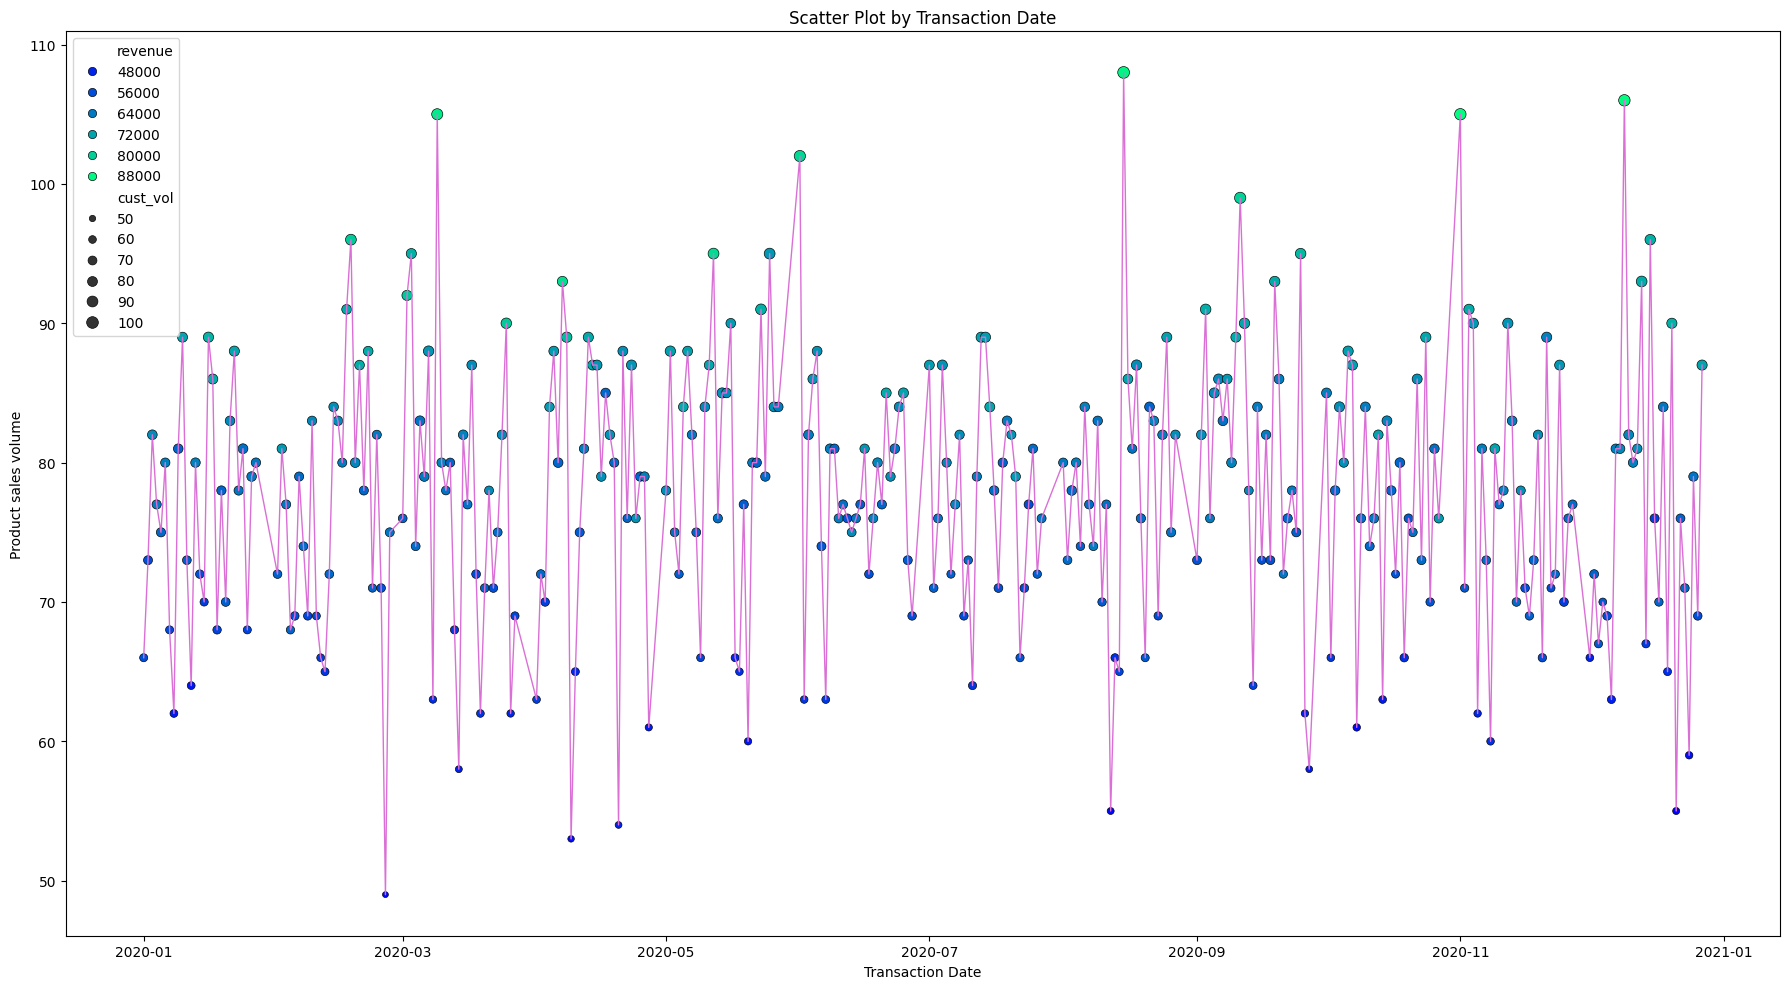

In [26]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['TransactionDate'], as_index=False).agg(product_sales_vol=('ordinal', 'count'),
                                                                            revenue= ('SellPrice', 'sum'),
                                                                             cust_vol=('CustomerID', 'nunique'),)

sns.scatterplot(x='TransactionDate', y='product_sales_vol',  hue='revenue', size='cust_vol',
                data=groupby_date, palette='winter', edgecolor='black')

sns.lineplot(x='TransactionDate', y='product_sales_vol', data=groupby_date, color='orchid', linewidth=1)

plt.xlabel('Transaction Date')
plt.ylabel('Product sales volume')
plt.title('Scatter Plot by Transaction Date')
plt.xticks(rotation=0)
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2020-03-31')


plt.tight_layout()
plt.show()

This scatter expresses that the business activity of the store had maintained sustainability during the period of 2020.

The main reason is that during the period of 2020, the data is distributed stationary commonly inside a cluster from above 60 unit to under 90 units with min and max respectively just under 50 and 110 units. There are some timestamp when the sale witnessed the breakthrough indicators of the business operation. However, most points have the mean and the extent of variance and covariance be remained less the difference during this period.

In conclusion, the datatime feature is stationary, it means the models could be established easier with high accuracy follow this feature.

#### <b><u>Date joined</u></b>

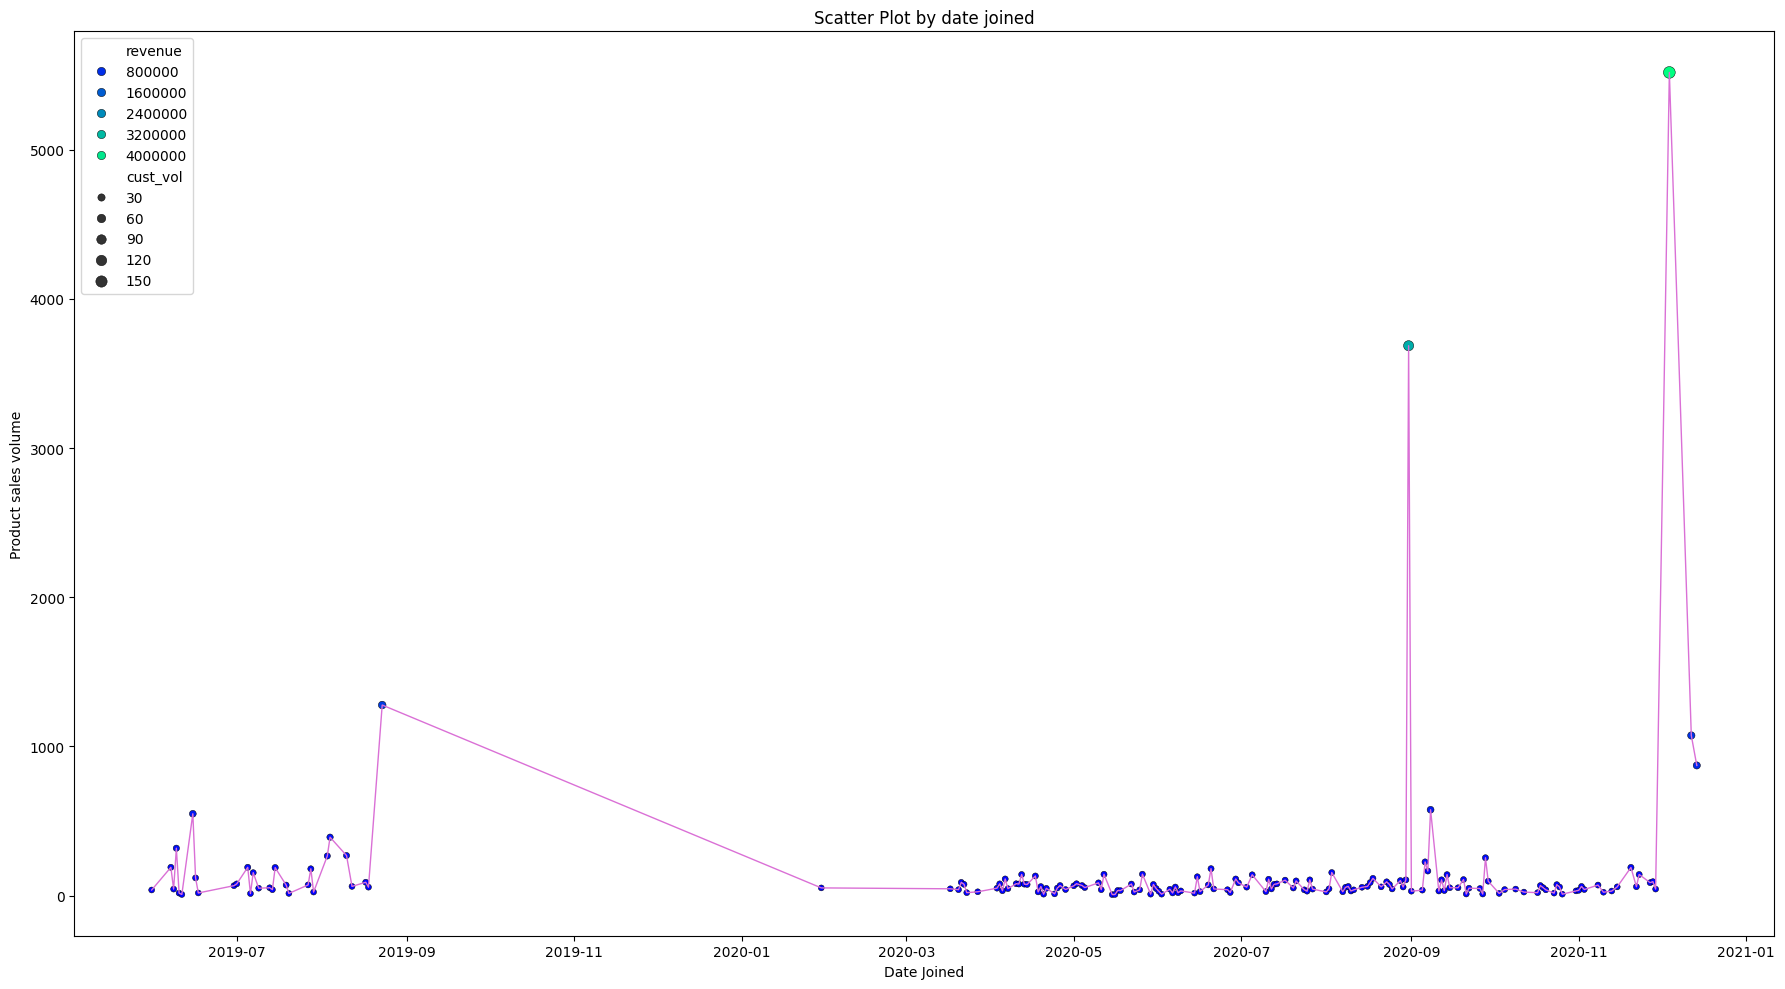

In [27]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['DateJoined'], as_index=False).agg(product_sales_vol=('ordinal', 'count'),
                                                                            revenue= ('SellPrice', 'sum'),
                                                                             cust_vol=('CustomerID', 'nunique'),)

sns.scatterplot(x='DateJoined', y='product_sales_vol',  hue='revenue', size='cust_vol',
                data=groupby_date, palette='winter', edgecolor='black')

sns.lineplot(x='DateJoined', y='product_sales_vol', data=groupby_date, color='orchid', linewidth=1)

plt.xlabel('Date Joined')
plt.ylabel('Product sales volume')
plt.title(f'Scatter Plot by date joined')
plt.xticks(rotation=0)
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2020-03-31')


plt.tight_layout()
plt.show()

This chart shows the number of the sold items that customers with the same date joined paying for. During this time series, the data distribution had less the varied. Because, the instances had been scateered followed a inline gap with a split duration, and existed a few outliners during the period.

The mean, variance and covariance of each instances are too different to build a good model easily. This should not be used as a time series feature.

#### <b><u>Birthday</u></b>


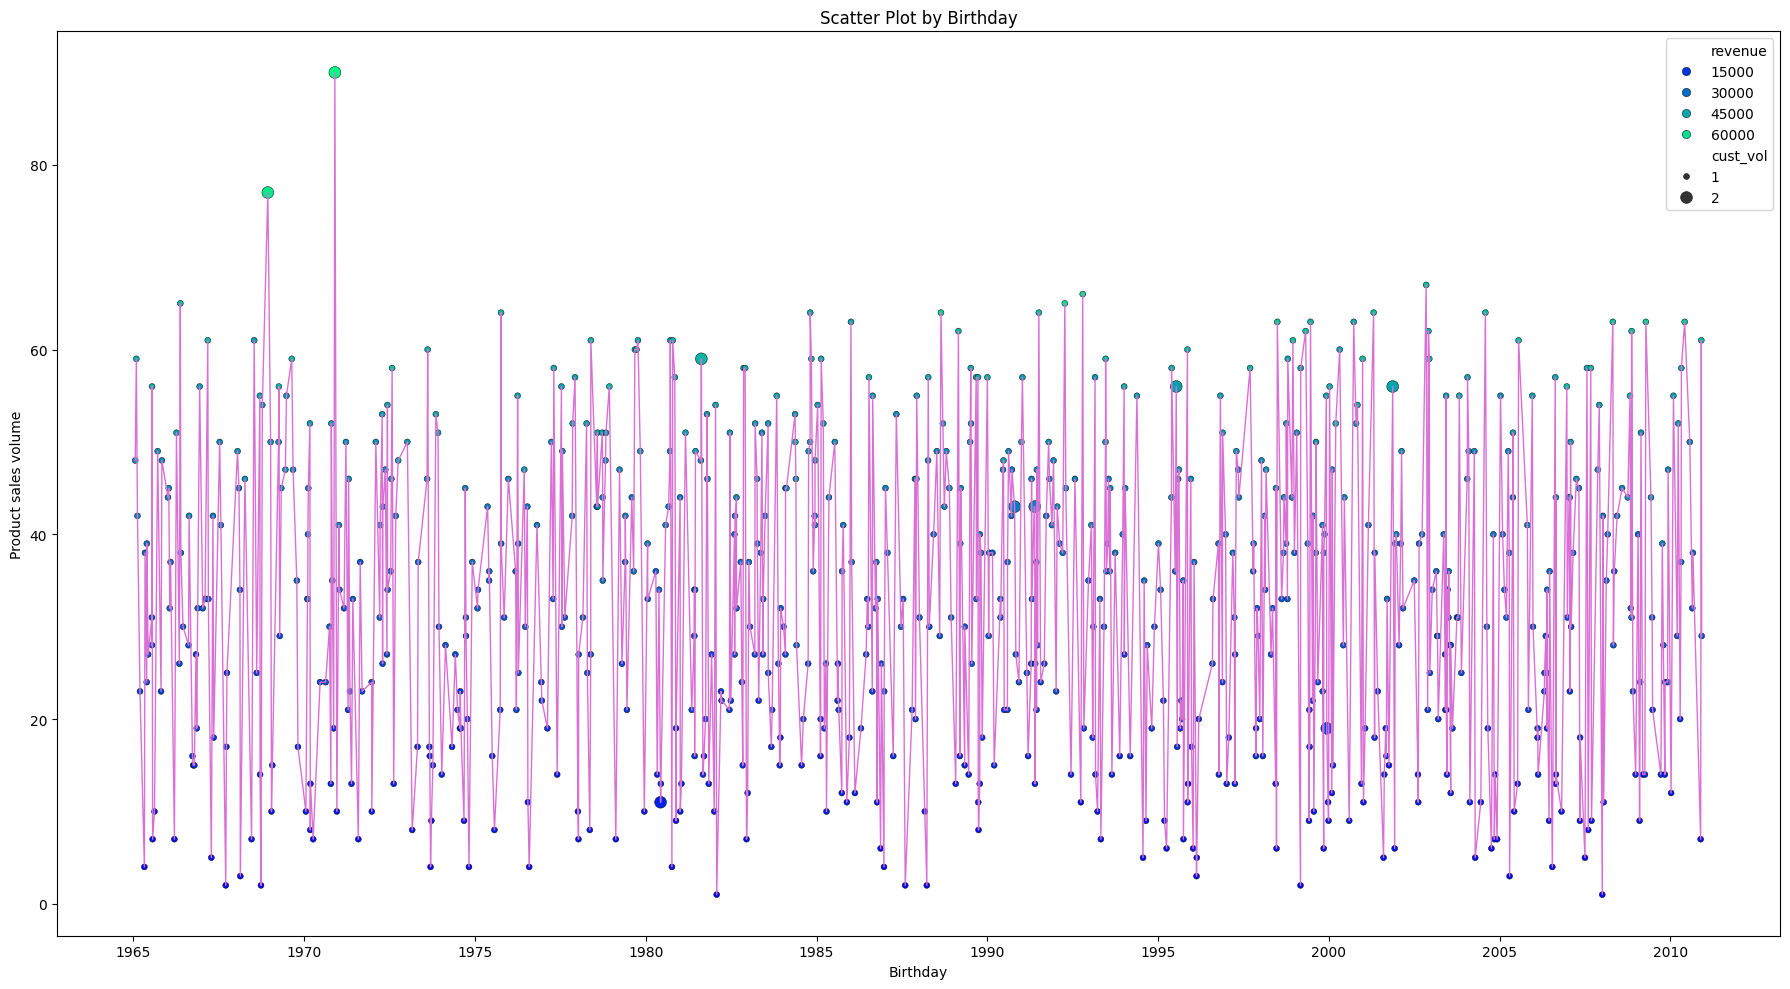

In [28]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['Birthday'], as_index=False).agg(product_sales_vol=('ordinal', 'count'),
                                                                            revenue= ('SellPrice', 'sum'),
                                                                             cust_vol=('CustomerID', 'nunique'),)

sns.scatterplot(x='Birthday', y='product_sales_vol',  hue='revenue', size='cust_vol',
                data=groupby_date, palette='winter', edgecolor='black')

sns.lineplot(x='Birthday', y='product_sales_vol', data=groupby_date, color='orchid', linewidth=1)

plt.xlabel('Birthday')
plt.ylabel('Product sales volume')
plt.title(f'Scatter Plot by Birthday')
plt.xticks(rotation=0)
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2020-03-31')


plt.tight_layout()
plt.show()

This is the date which provides the persoanal information, it is used to group individual object by their age - a demographic object.

In addition, during the period of 2020, the data is distributed stationary commonly inside a cluster from 1 unit to just above 60 units with min and max respectively at 1 and 90 units. There are some timestamp when  the number of values witnessed the breakthrough customer feature. However, most points have the mean and the extent of variance and covariance be remained less the difference during this period.

In conclusion, the datatime feature is stationary, it means the models could be established easier with high accuracy follow this feature.

#### <b><u>Posted On (DD/MM/YYYY)</u></b>

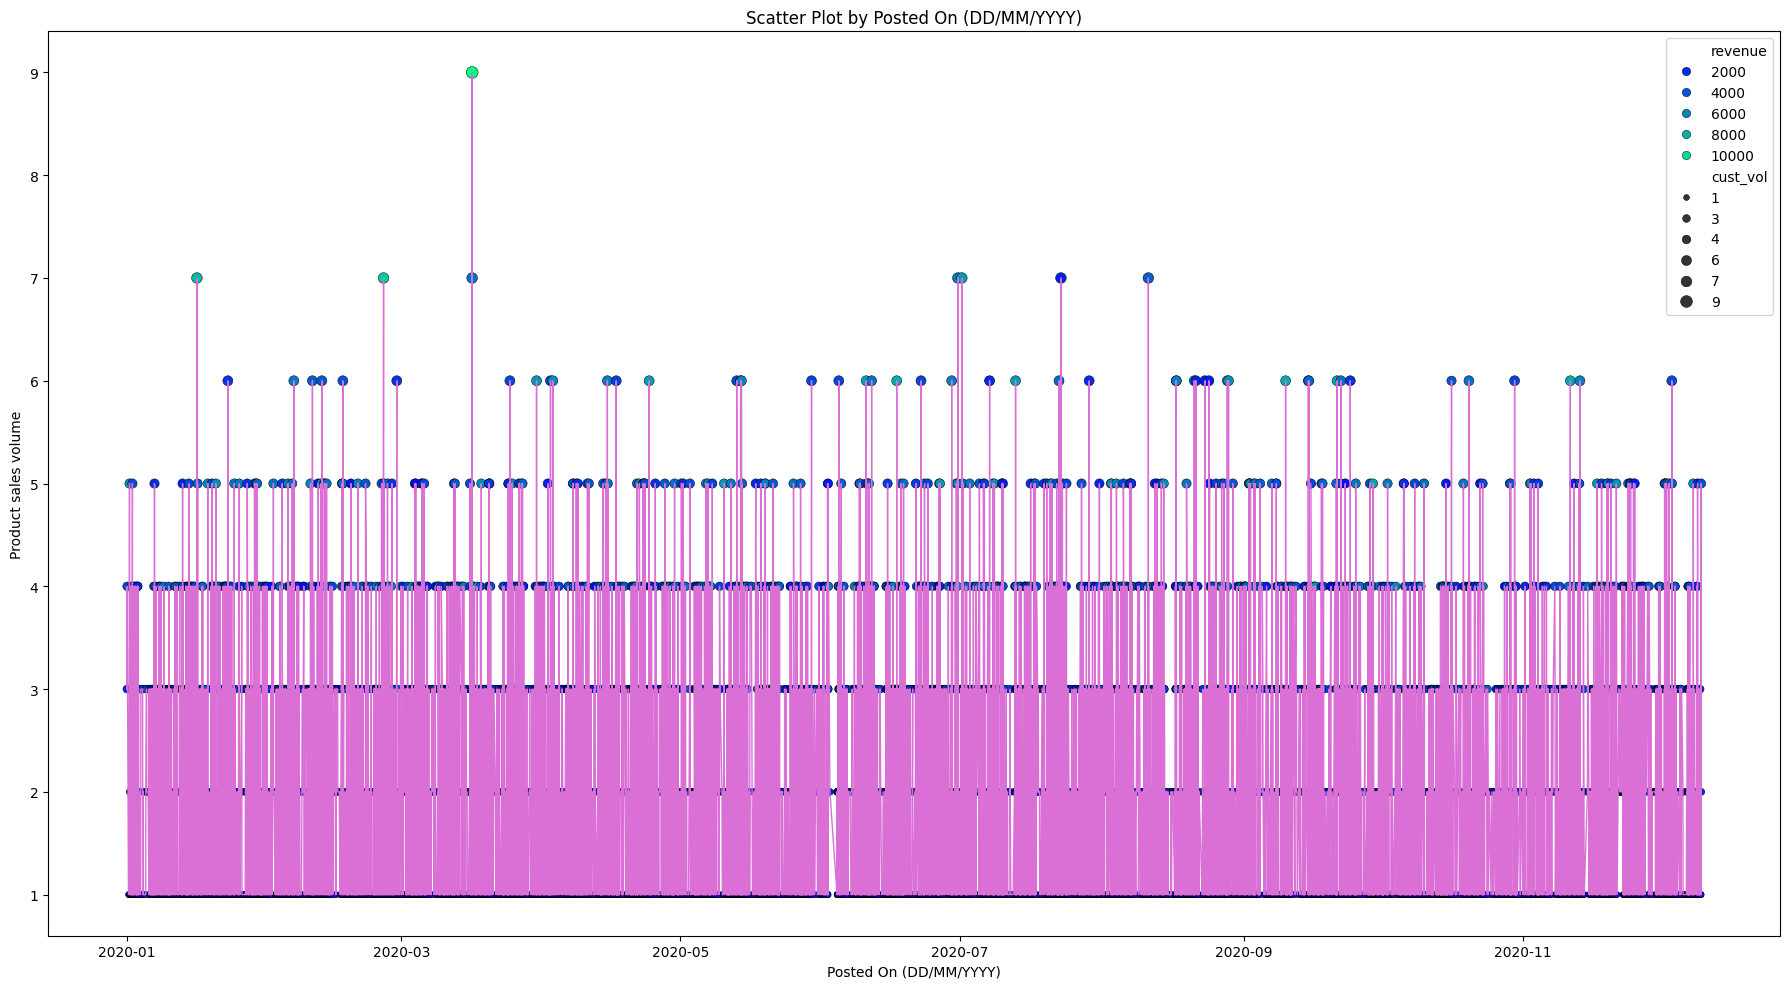

In [29]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['Posted On (DD/MM/YYYY)'], as_index=False).agg(product_sales_vol=('ordinal', 'count'),
                                                                            revenue= ('SellPrice', 'sum'),
                                                                             cust_vol=('CustomerID', 'nunique'),)

sns.scatterplot(x='Posted On (DD/MM/YYYY)', y='product_sales_vol',  hue='revenue', size='cust_vol',
                data=groupby_date, palette='winter', edgecolor='black')

sns.lineplot(x='Posted On (DD/MM/YYYY)', y='product_sales_vol', data=groupby_date, color='orchid', linewidth=1)

plt.xlabel('Posted On (DD/MM/YYYY)')
plt.ylabel('Product sales volume')
plt.title(f'Scatter Plot by Posted On (DD/MM/YYYY)')
plt.xticks(rotation=0)
start_date = pd.Timestamp('2020-03-16')
end_date = pd.Timestamp('2020-03-17')

plt.tight_layout()
plt.show()

During the period of 2020, the data is distributed stationary commonly inside a cluster from 1 unit to 5 units with max at 9 units. There are some timestamp when the number of values witnessed the breakthrough of web page. However, most points have the mean and the extent of variance and covariance be remained less the difference during this period.

In conclusion, the datatime feature is stationary, it means the models could be established easier with high accuracy follow this feature.

These charts show that the products were posted on the store's website, have tend to be sold more than others and also have caught more customers and orders than the others.

### B. <b><u>Categorical feature:</u></b>

Categorical features just are able to classification, assist to selection so their analysis is done at observation to gain the dominant of each class.
In addition, it help conclude the effect of categorical features on the number of customer and sold items.

Moreover, the classification features which express the indentical and unique values of each entity, would be removed when implementing EDA.

The indentical and unique values of the entities include 'FirstName', 'LastName', 'FullName', 'Page_URL', and 'Product'. Additionally, 'Brand' is also known as an indentical and unique values of the entities, suches as supplier.

In [30]:
categorical_columns

Index(['Channel', 'FirstName', 'LastName', 'Country', 'Gender', 'Newsletter',
       'FullName', 'Page URL', 'Product', 'Brand'],
      dtype='object')

In [31]:
filtered_categorical_columns = categorical_columns.drop(['FirstName', 'LastName', 'FullName', 'Page URL', 'Product', 'Brand'])


<ipython-input-32-8fc6d52f49e7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_categorical_columns[i-1], data=trans_detail, palette='winter', edgecolor='black', order=trans_detail[filtered_categorical_columns[i-1]].value_counts().index, ax=ax)
<ipython-input-32-8fc6d52f49e7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_categorical_columns[i-1], data=trans_detail, palette='winter', edgecolor='black', order=trans_detail[filtered_categorical_columns[i-1]].value_counts().index, ax=ax)
<ipython-input-32-8fc6d52f49e7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

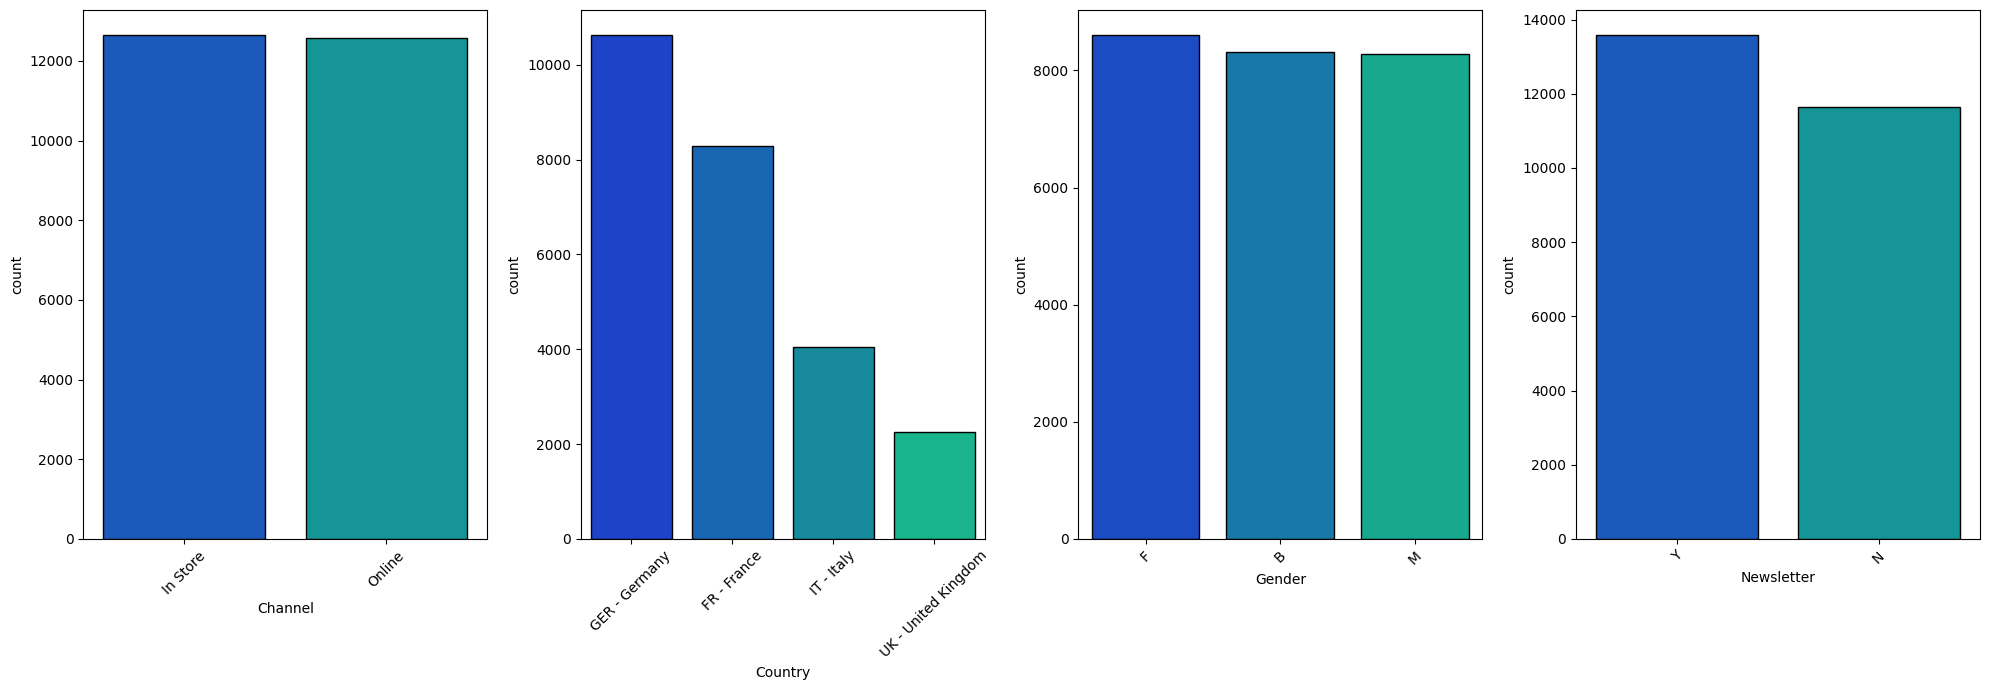

In [32]:
figuresize = (20,7)
cols = 4
rows = math.ceil(len(filtered_categorical_columns) / cols)

fig, axes = plt.subplots(rows, cols, figsize=figuresize)
for i, ax in enumerate(axes.flat, start=1):
    sns.countplot(x=filtered_categorical_columns[i-1], data=trans_detail, palette='winter', edgecolor='black', order=trans_detail[filtered_categorical_columns[i-1]].value_counts().index, ax=ax)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

These histograms count the quantity of instances and in the categorical features and express the data distribution in each feature.

The data distribution of categorical in this dataset has not the striking variation. Exception is the feature 'Country', which is a geographic description, and contains the obvious differences between the values. It means excepting 'Country' feature, the others could be used to divide the dataset for mitigating the noise more readily than 'Country'.



### <b><u>Revenue</u></b>

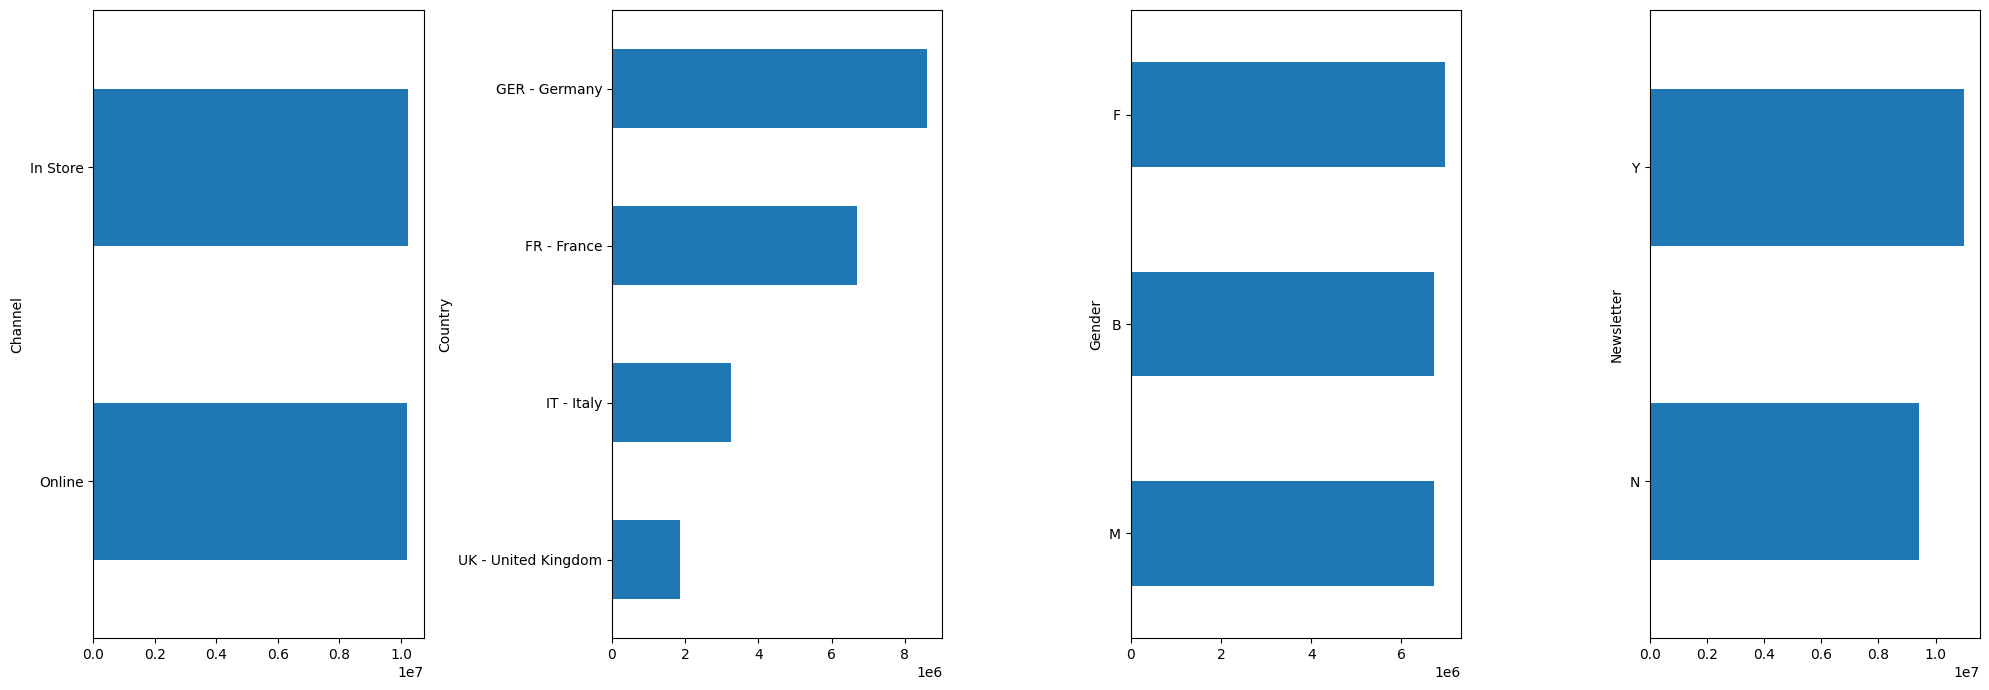

In [33]:
figuresize = (20,7)
cols = 4
rows = math.ceil(len(filtered_categorical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(filtered_categorical_columns)+1):
    plt.subplot(rows, cols, i)
    trans_detail.groupby(filtered_categorical_columns[i-1])["SellPrice"].sum().sort_values().plot(kind="barh")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### <b><u>Item sales volume</u></b>

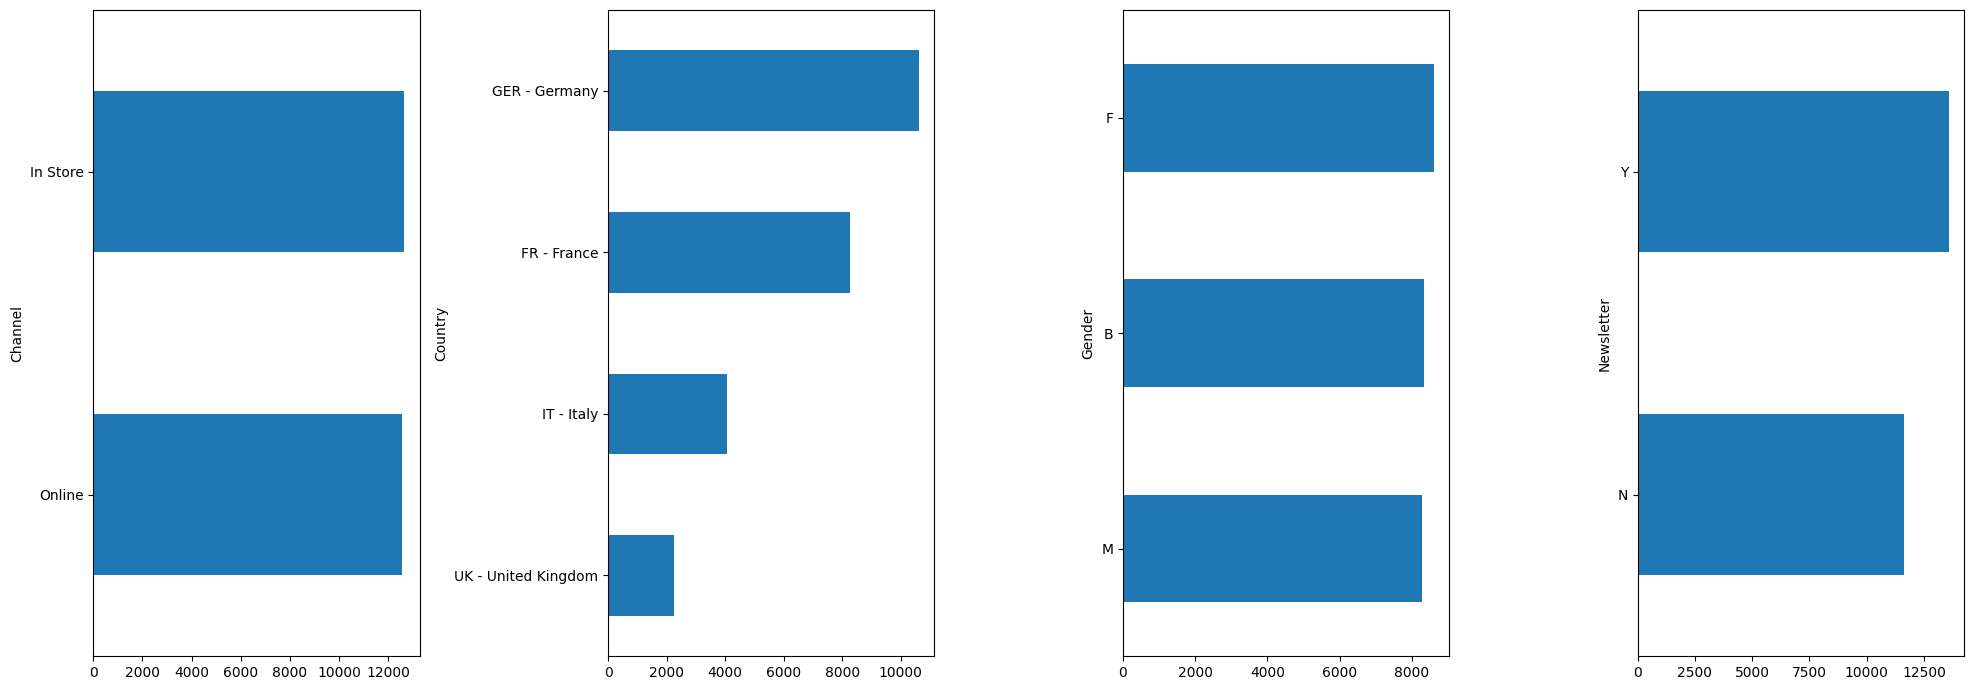

In [34]:
figuresize = (20,7)
cols = 4
rows = math.ceil(len(filtered_categorical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(filtered_categorical_columns)+1):
    plt.subplot(rows, cols, i)
    trans_detail.groupby(filtered_categorical_columns[i-1])["ItemID"].count().sort_values().plot(kind="barh")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### <b><u>Customer volume</u></b>

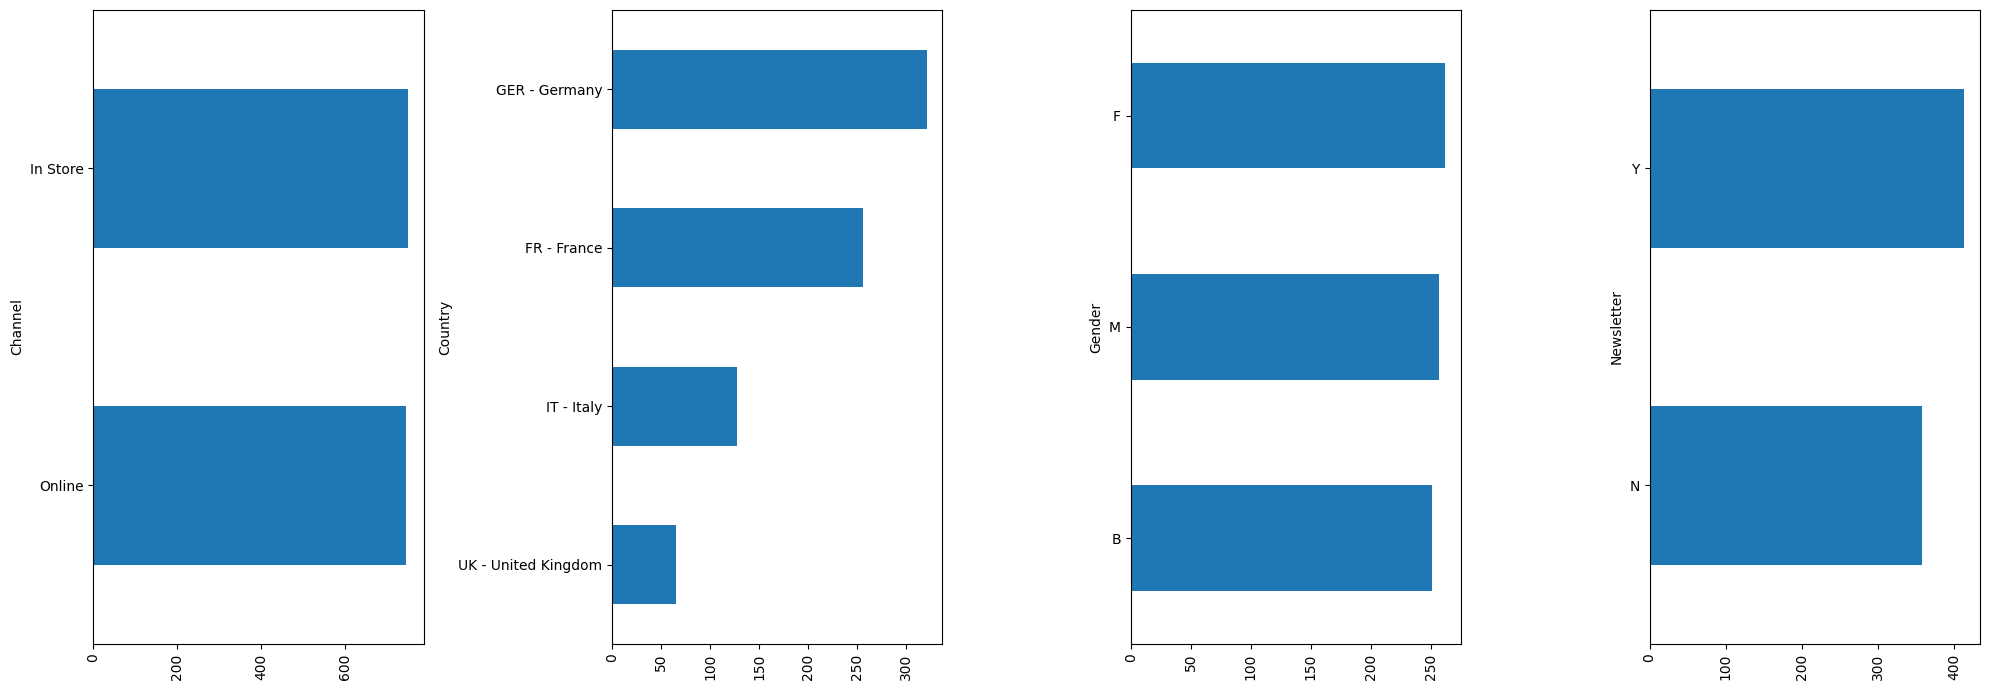

In [35]:
figuresize = (20,7)
cols = 4
rows = math.ceil(len(filtered_categorical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(filtered_categorical_columns)+1):
    plt.subplot(rows, cols, i)
    trans_detail.groupby(filtered_categorical_columns[i-1])["CustomerID"].nunique().sort_values().plot(kind="barh")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### C. <b><u>Numerical feature</u></b>


In [36]:
numerical_columns

Index(['OrderID', 'CustomerID', 'ItemID', 'Age', 'relationship_duration',
       'users', 'uniquePageviews', 'pageviews', 'existing_duration',
       'SellPrice', 'CostPrice', 'ordinal'],
      dtype='object')

In [37]:
filtered_numerical_columns = numerical_columns.drop(['OrderID','CustomerID','ItemID','ordinal'])

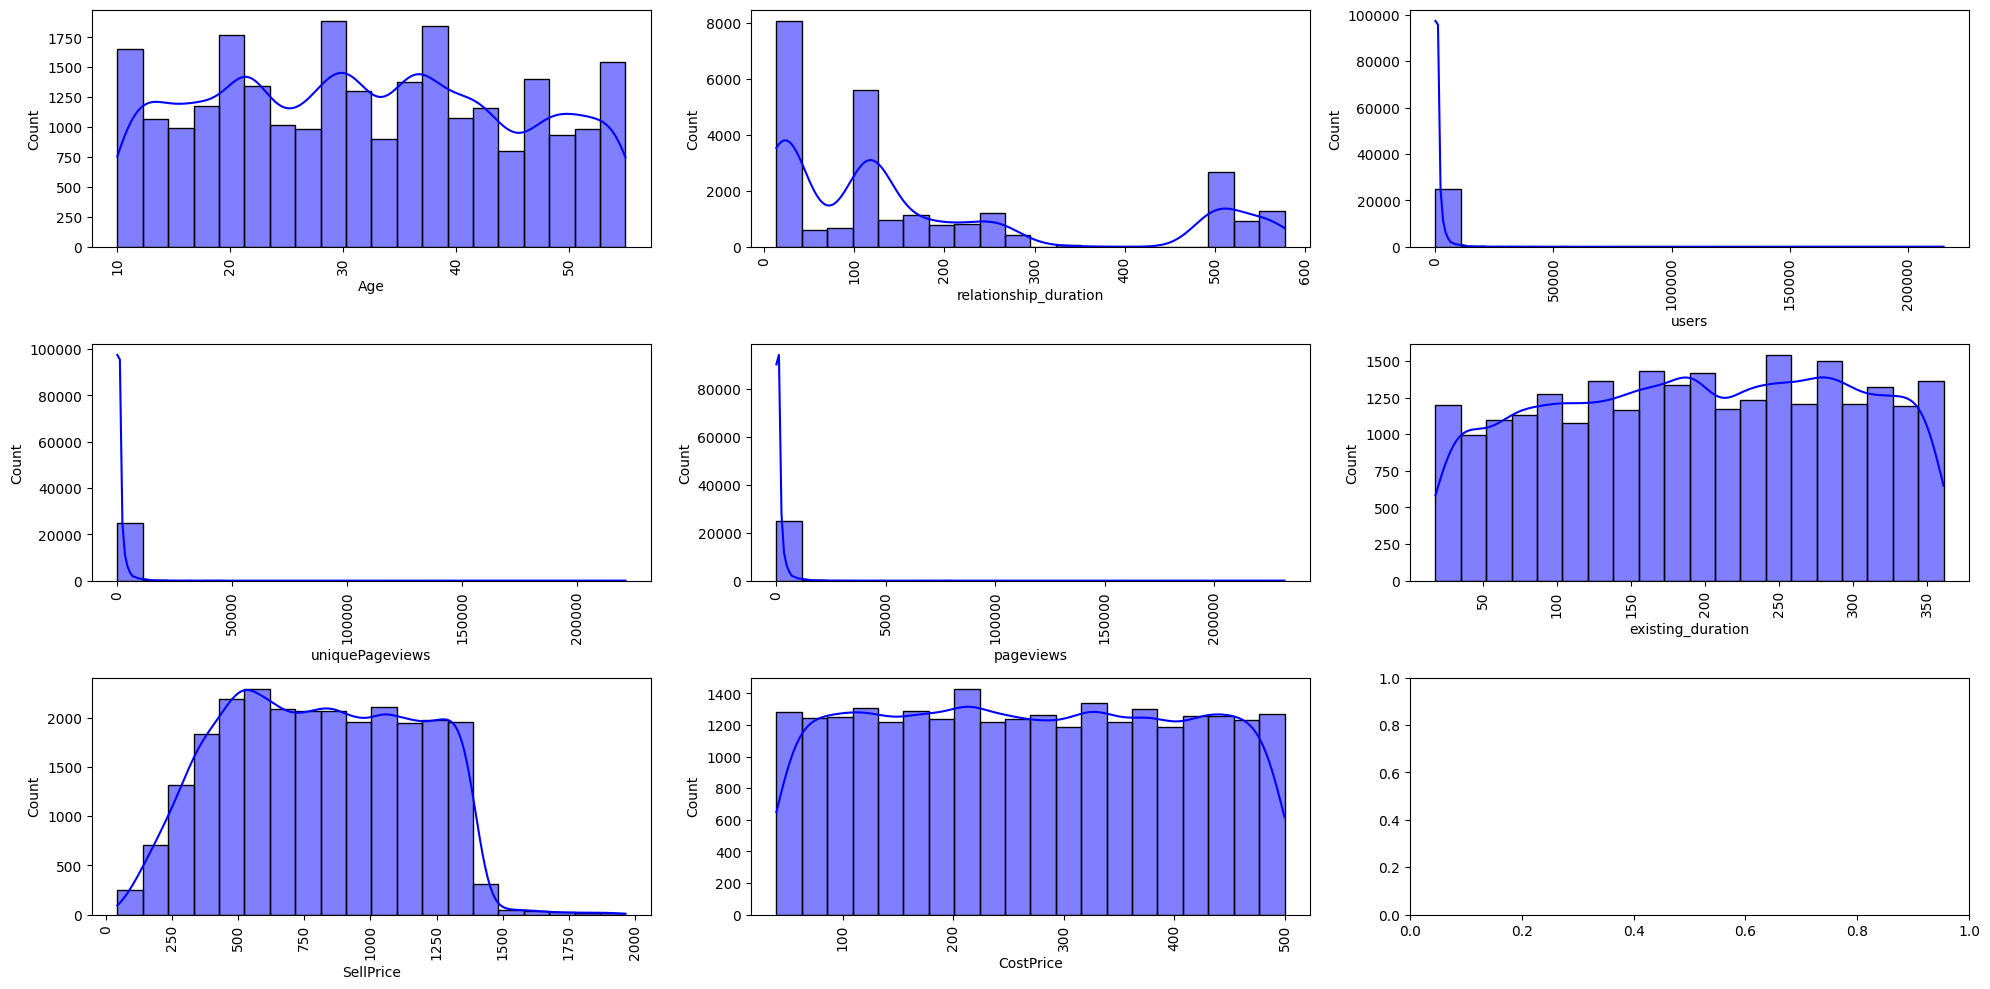

In [38]:
figuresize = (20,10)
cols = 3
rows = math.ceil(len(filtered_numerical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(filtered_numerical_columns) + 1):
    plt.subplot(rows, cols, i)
    sns.histplot(trans_detail[filtered_numerical_columns[i-1]], color='blue', edgecolor='black', kde=True, bins=20)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

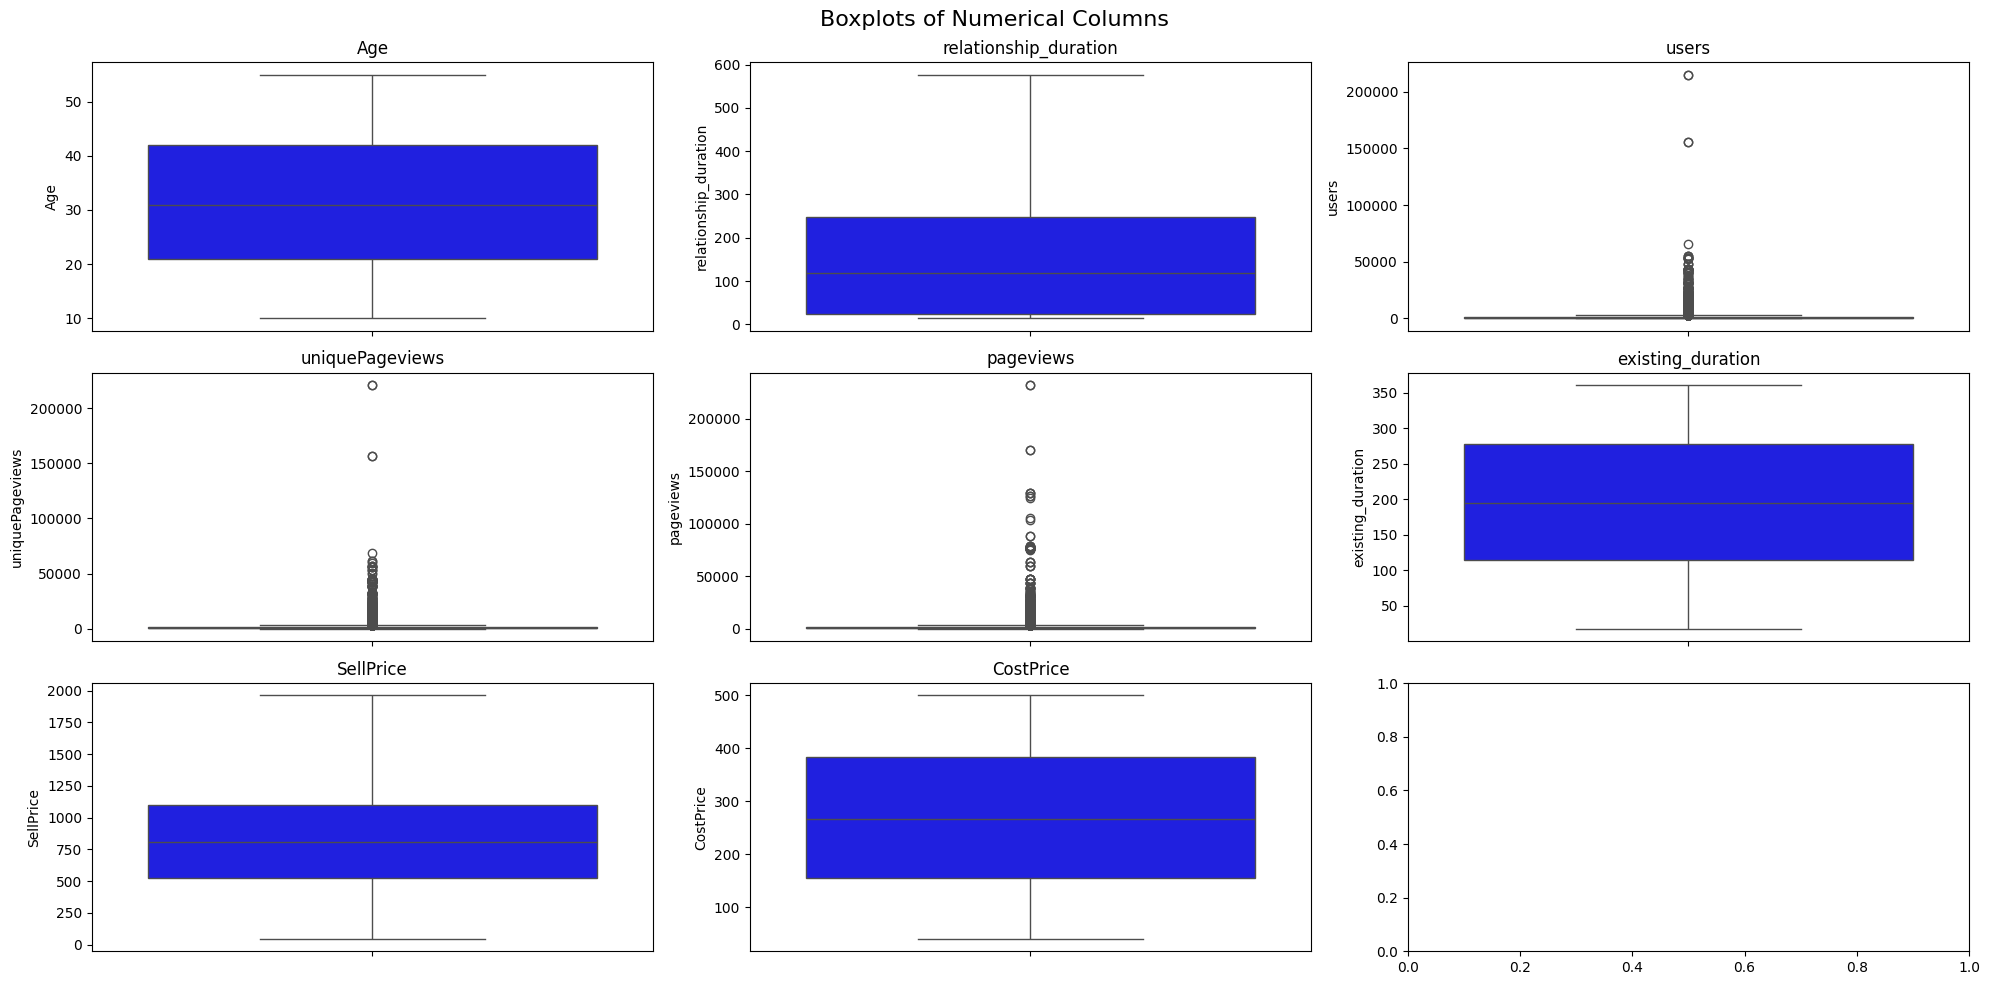

In [39]:
figuresize = (20,10)
cols = 3
rows = math.ceil(len(filtered_numerical_columns) / cols)

fig, axes = plt.subplots(rows, cols, figsize=figuresize)
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)  # Add main title to the figure

for i, col in enumerate(filtered_numerical_columns):
    row_idx = i // cols
    col_idx = i % cols
    sns.boxplot(trans_detail[col], ax=axes[row_idx, col_idx], color='blue')
    axes[row_idx, col_idx].set_title(col)  # Add subplot title
    axes[row_idx, col_idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [40]:
trans_detail[filtered_numerical_columns].describe()

Age  relationship_duration          users  uniquePageviews  \
count  25213.000000           25213.000000   25213.000000     25213.000000   
mean      31.964383             182.543133    1425.997581      1467.587633   
std       12.991924             182.593678    3717.531661      3876.179582   
min       10.000000              14.000000       0.000000         0.000000   
25%       21.000000              24.000000     327.000000       332.000000   
50%       31.000000             119.000000     624.000000       635.000000   
75%       42.000000             247.000000    1345.000000      1380.000000   
max       55.000000             577.000000  215223.000000    221108.000000   

           pageviews  existing_duration     SellPrice     CostPrice  
count   25213.000000       25213.000000  25213.000000  25213.000000  
mean     1641.934597         194.760838    809.789315    268.738072  
std      4935.258921          97.214226    348.490115    132.725391  
min         0.000000          18.000000     43.000000     40.000000  
25%       357.000000         114.000000    524.000000    155.000000  
50%       684.000000         195.000000    806.000000    267.000000  
75%      1490.000000         278.000000   1102.000000    383.000000  
max    232177.000000         361.000000   1964.000000    500.000000

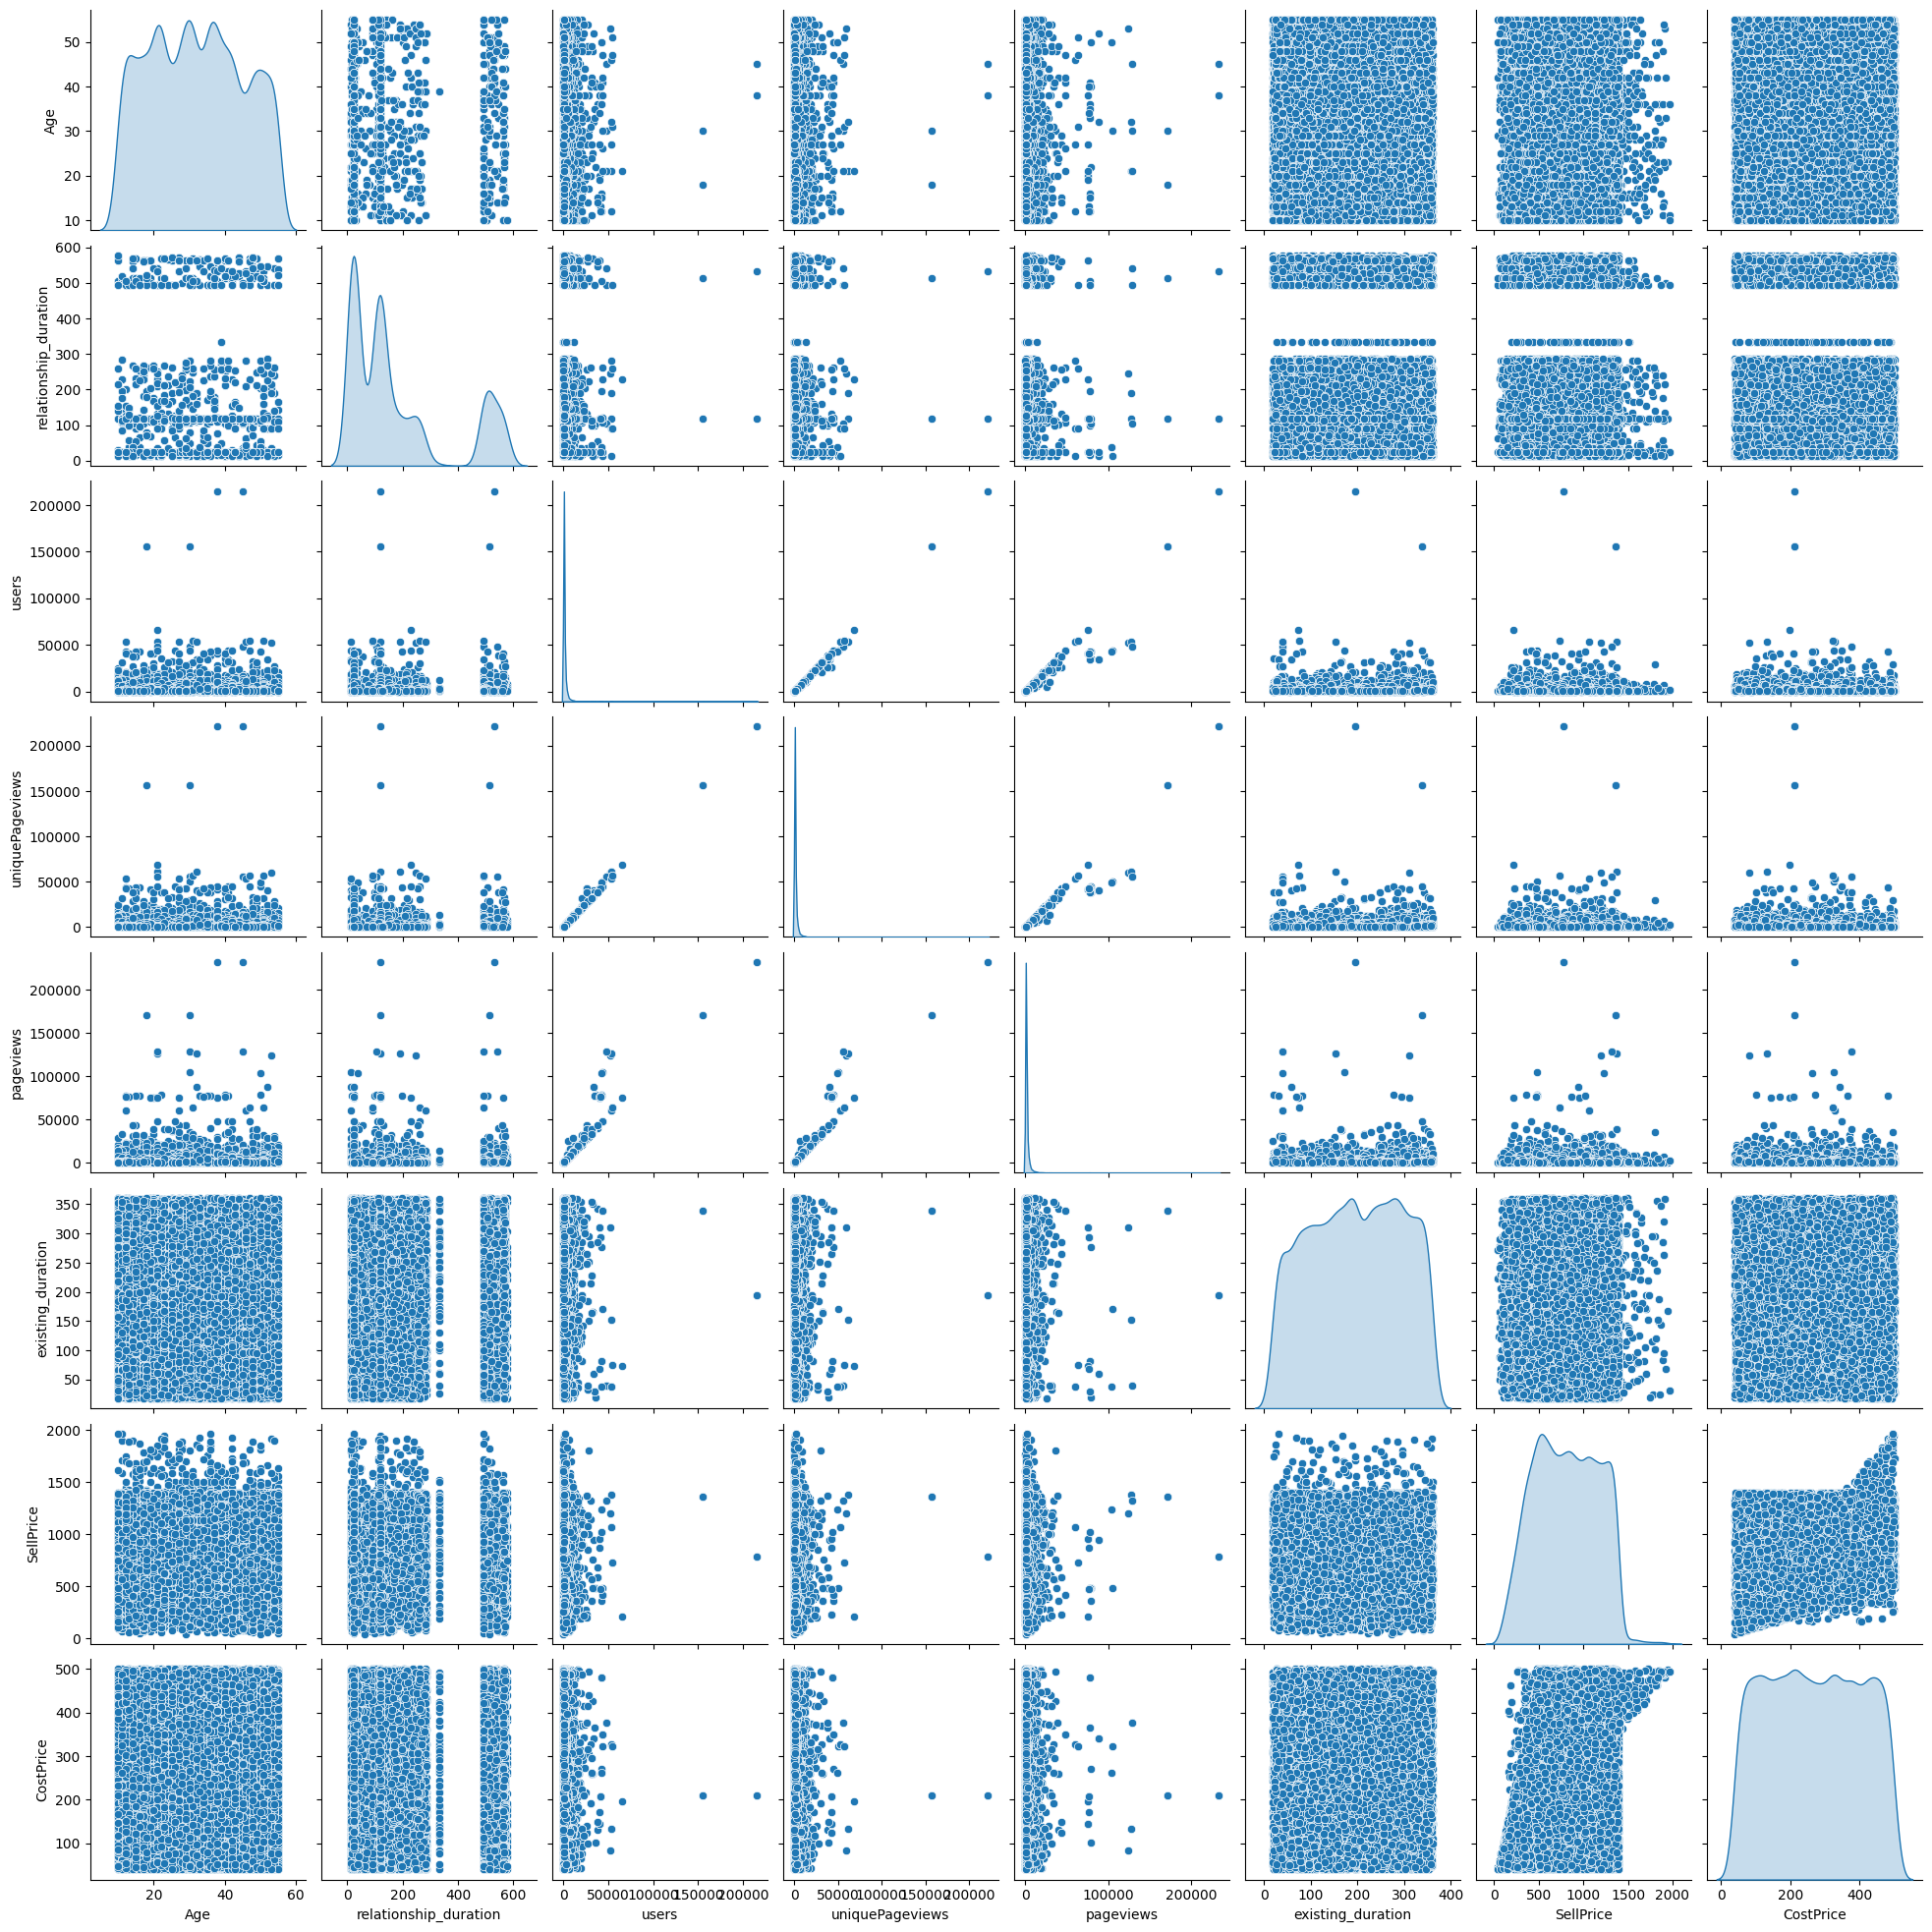

In [41]:
# pairplot
sns.pairplot(trans_detail[filtered_numerical_columns], diag_kind="kde", )
plt.show()

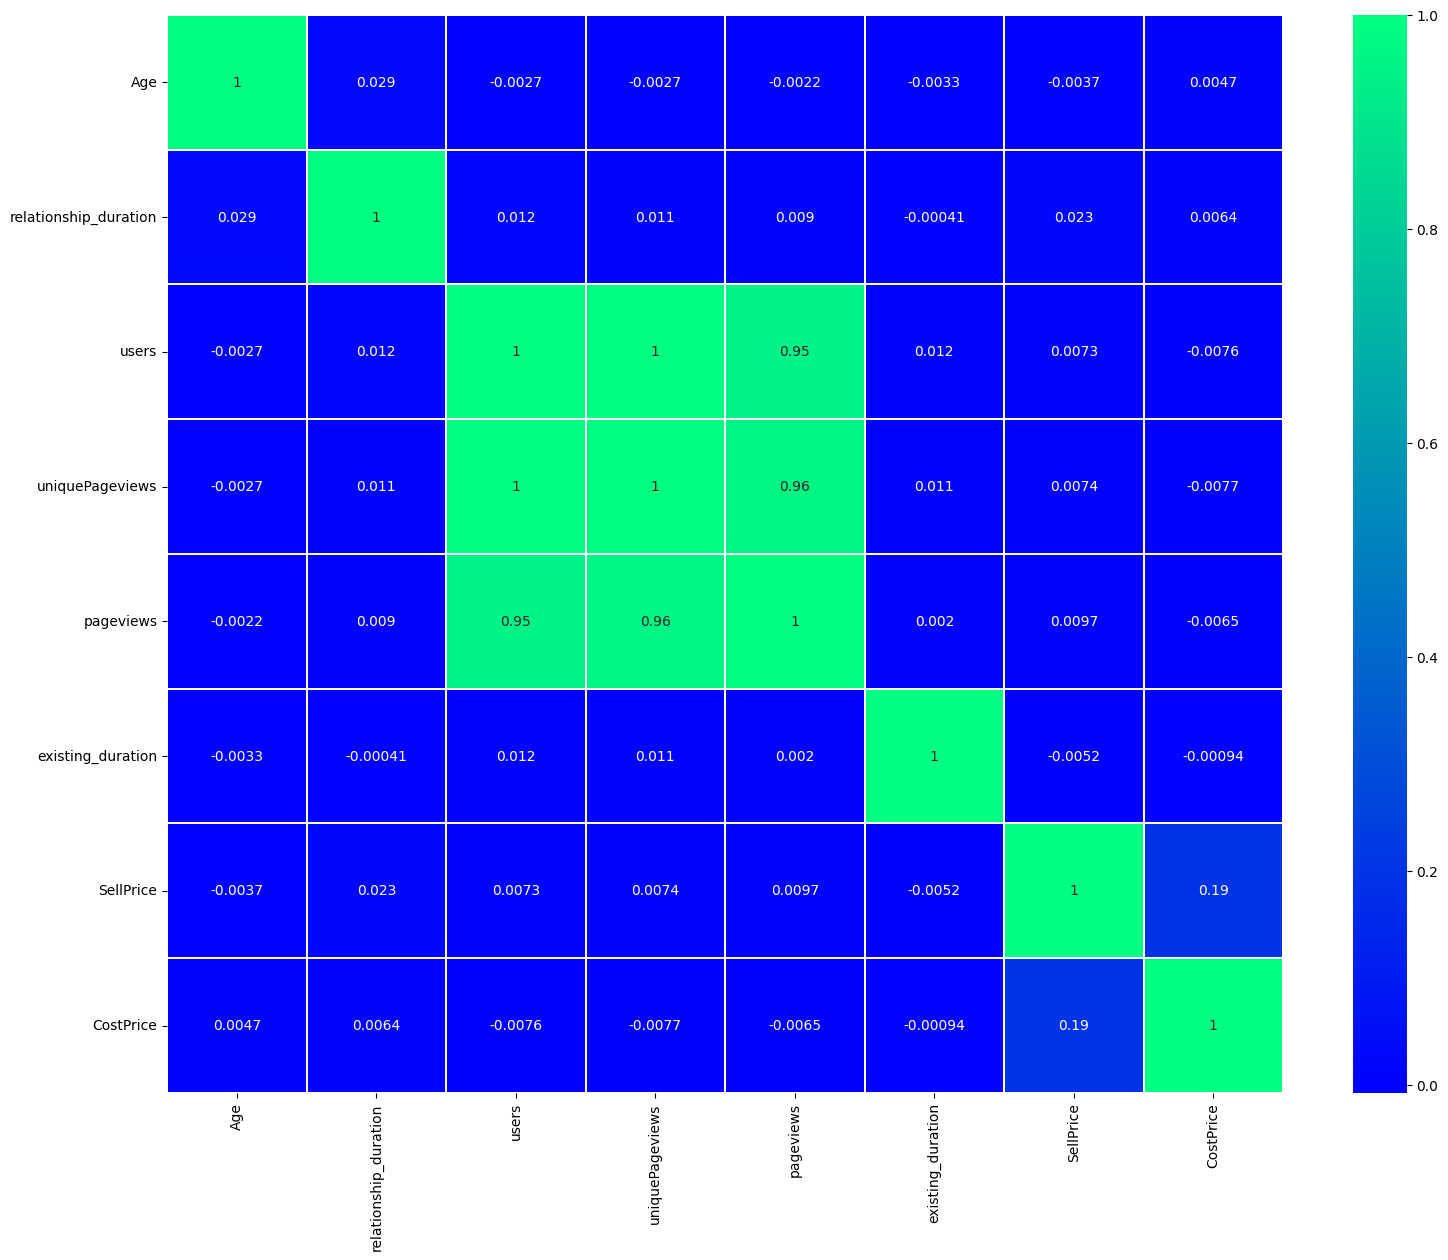

In [42]:
sns.heatmap(trans_detail[filtered_numerical_columns].corr(), annot=True, cmap="winter", linewidths=0.2)
plt.gcf().set_size_inches(18, 14)

plt.show()

Regarding the data distribution, the findings were collude by these above graphs, include:

1. There are three out of eight numerical feature which has been skewed nearly total to the left due to the numerous long upper wick, are 'uniquePaperviews','Paperviews', and 'Users' features illustrating the web traffic object. It means the majority of data cluster at the cap, but the minority scattered at the very higher volume. Notably, these three features share the same distribution pattern and illustrate the "web traffic" object.
2. The relationship duration illustrate the object has been also skewed totally to the left, but the majority distributed during large extent under the middle with many upper outliners and poor lower outliners. The others have the moderately equal distribution for each part numerical value serie.


In terms of the correlation between each pair feature collaborated, these graphs show that there correlational impact between each feature with the others. The findings were concluded by these above graphs, include:

1. The numerical features which illustrates the 'customer' object, divide data at the others by obvious constraint. They express no trendy, the ambiguous interaction, reversely, the classification is expressed clearly. In addition, they also express the almost non-correlation with others. A similar pattern was witnessed in the numerical features of 'Product' object.

2. The numerical features of 'web traffic' witnessed a small variation. Their values show a stronger correlational impact between it and the other objects.

## <b><u>VI. Feature selecting & Modeling</u></b>
### 1. <b><u>How web traffic impacts on business performance? </u></b>
To deal with this request, firstly, we have to determine the proper features illustrate obviously the material and consequent objects, which will be used to model the correlational impact.

In this request, the matter is 'web traffic' object and the outcome is the number of issue being relevant to transaction. The detai is below:

* Material features : x = 'uniquePageviews', 'existing_duration','Channel','Newsletter'.

* Outcome features: y = 'item_sales_volume', 'customer_conversion_rate' and 'relationship duration'.

**Note:** The material features are all features of 'traffic' object. However, the consequent features are the new feature are depended on their value and the value united by material feature of the fact table. Moreover, there are many features which describe one object, would be use intermittently to evaluate sales performance, but are depended meticulously on each other. Thus, this project just focus on features that are the least depended to reduce complex and optimize performance, are 'item_sales_volume', 'customer_conversion_rate' and 'relationship duration'. A similar pattern was applied for material features, the choices are 'uniquePageviews', 'existing_duration', 'Posted On (DD/MM/YYYY)','Channel','Newsletter'.

**Method:** Visualization the correlation between each depended feature with each the independed one.

#### A. **Channel & Newsletter: (Categorical feature)**
* **<b><u>Item sales volume**

<ipython-input-43-d95b8333070f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_categorical_columns[i], data=trans_detail, palette='winter',
<ipython-input-43-d95b8333070f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_categorical_columns[i], data=trans_detail, palette='winter',


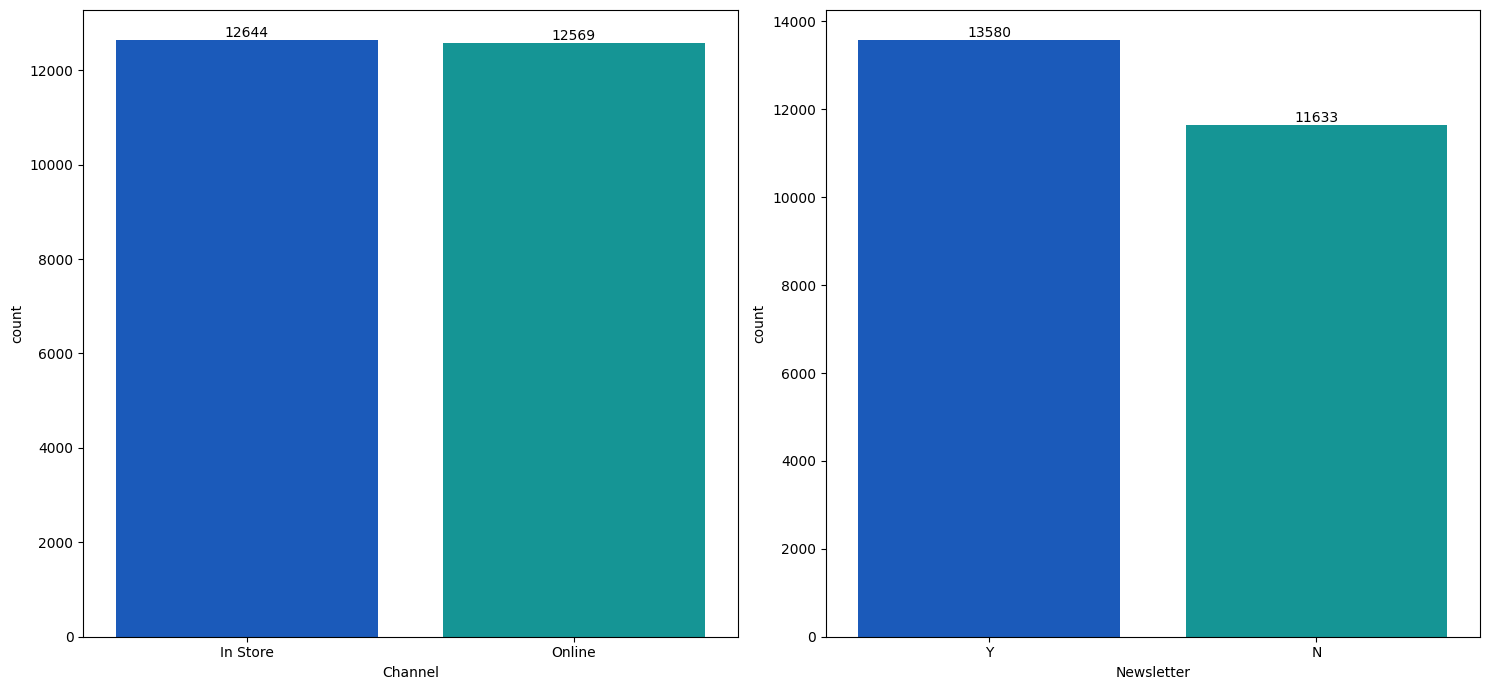

In [43]:
# Set the figure size
figuresize = (15, 7)

# Define the number of columns and rows for subplots
cols = 2  # Adjusted to 1 column for vertical orientation
rows = 1  # Adjusted to 2 rows for two categorical columns

# Define the list of filtered categorical columns
filtered_categorical_columns = ['Channel', 'Newsletter']

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=figuresize)

# Iterate over the subplots and plot barplots for each categorical column
for i, ax in enumerate(axes.flat, start=0):  # Start index adjusted to 0
    # Plot a barplot for the current categorical column
    sns.countplot(x=filtered_categorical_columns[i], data=trans_detail, palette='winter',
                  order=trans_detail[filtered_categorical_columns[i]].value_counts().index, ax=ax)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=0)

    # Set x-axis label
    ax.set_xlabel(filtered_categorical_columns[i])

    # Add text annotation to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
# Initialize a variable to store the count
count_online_newsletter = 0
count_newsletter = 0

# Iterate through each row in the DataFrame
for i in range(len(trans_detail)):
    # Check if the value of 'Channel' is 'Online' and the value of 'Newsletter' is 'Y'
    if trans_detail.loc[i, 'Channel'] == 'Online' and trans_detail.loc[i, 'Newsletter'] == 'Y':
        # Increment the count if the condition is met
        count_online_newsletter += 1
    if trans_detail.loc[i, 'Newsletter'] == 'Y':
        count_newsletter += 1


count_online_newsletter_rate = count_online_newsletter/count_newsletter*100

# Print the count
print("Number of occurrences where Channel is 'Online' and Newsletter is 'Y':", count_online_newsletter)
print(f"Percentage of occurrences where Channel is 'Online' and Newsletter is 'Y', on the number of 'Y': {count_online_newsletter_rate}%")

Number of occurrences where Channel is 'Online' and Newsletter is 'Y': 6778
Percentage of occurrences where Channel is 'Online' and Newsletter is 'Y', on the number of 'Y': 49.91163475699558%


These above charts show the number of customers who performed shopping by two means and with or without the suggestion. It poited out the number of sold items will be higher if the customers receive the newsletter of the update. There are no evident to determine the receiving newsletter will lead to shopping online. Because the number of customers who bought products online by newsletter, take just above 50% customers (6.778 customers). However, website assisted the online shopping immediately for approx 50% customers received newsletter. And another half of shopping online for the ones no received newsletter expectedly. Noticeably, the whole transaction of the offline shopping is just minimally above that of the online shopping (respectively 12.644 customers and 12.569 customers).  

* **<b><u>Customer conversion rate:**

In [45]:
x=trans_detail['users'].sum()
y=trans_detail['CustomerID'].nunique()
print(x)
print(y)
print(f"General customer conversion rate: {x/y} users/ 1 customer")

35953677
770
General customer conversion rate: 46693.087012987016 users/ 1 customer


<ipython-input-46-cf5ed915fe94>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_categorical_columns[i], y='Conversion Rate', data=grouped_data, palette='winter', ax=ax)
<ipython-input-46-cf5ed915fe94>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_categorical_columns[i], y='Conversion Rate', data=grouped_data, palette='winter', ax=ax)


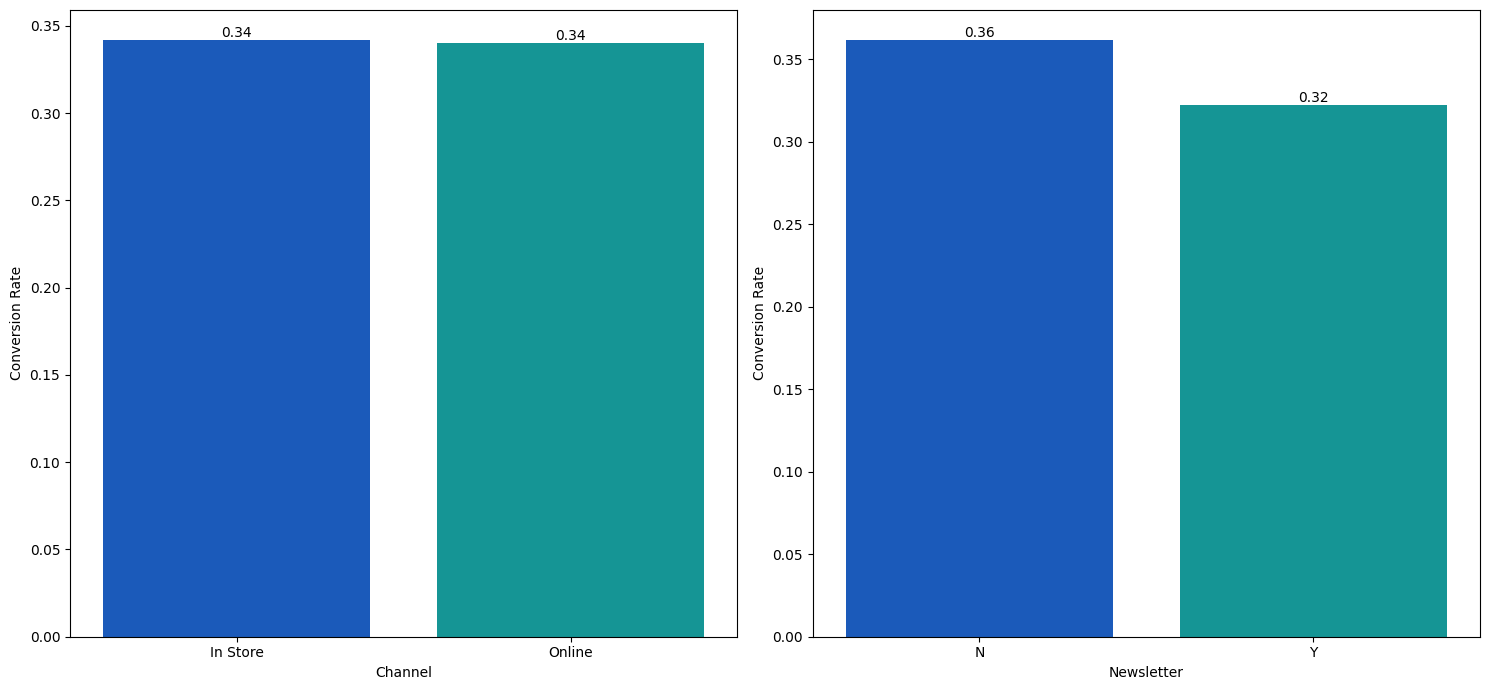

In [46]:
# Set the figure size
figuresize = (15, 7)

# Define the number of columns and rows for subplots
cols = 2  # Adjusted to 1 column for vertical orientation
rows = 1  # Adjusted to 2 rows for two categorical columns

# Define the list of filtered categorical columns
filtered_categorical_columns = ['Channel', 'Newsletter']

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=figuresize)

# Iterate over the subplots and plot barplots for each categorical column
for i, ax in enumerate(axes.flat, start=0):  # Start index adjusted to 0
    # Group the data by the current categorical column and count the number of unique users
    grouped_data = trans_detail.groupby(filtered_categorical_columns[i]).agg(users=('users', 'mean'), order_vol=('OrderID', 'nunique')).reset_index()

    # Calculate the total number of users for each category
    total_users_per_category = grouped_data['users']

    # Calculate the conversion rate for each category
    grouped_data['Conversion Rate'] = total_users_per_category/grouped_data['order_vol']

    # Plot a barplot for the conversion rate
    sns.barplot(x=filtered_categorical_columns[i], y='Conversion Rate', data=grouped_data, palette='winter', ax=ax)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=0)

    # Set x-axis label
    ax.set_xlabel(filtered_categorical_columns[i])

    # Set y-axis label
    ax.set_ylabel('Conversion Rate')

    # Add text annotation to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
x=traffic['users'].mean()
y=trans_detail['OrderID'].nunique()
print(x)
print(y)
print(f"General customer conversion rate: {x/y} users/ 1 customer")

1395.4929286153501
8363
General customer conversion rate: 0.16686511163641637 users/ 1 customer


The coversion rate is accounted by the totall users of the web traffic over the number of customers who was available based on each categorical feature.
They are impressed indicators for the conversion rate, and shows the efficience of web traffic.

* **<b><u>Relationship duration:**

<ipython-input-48-e63eeea7bb7b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_categorical_columns[i], y='relationship_duration', data=grouped_data, palette='winter', ax=ax)
<ipython-input-48-e63eeea7bb7b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_categorical_columns[i], y='relationship_duration', data=grouped_data, palette='winter', ax=ax)


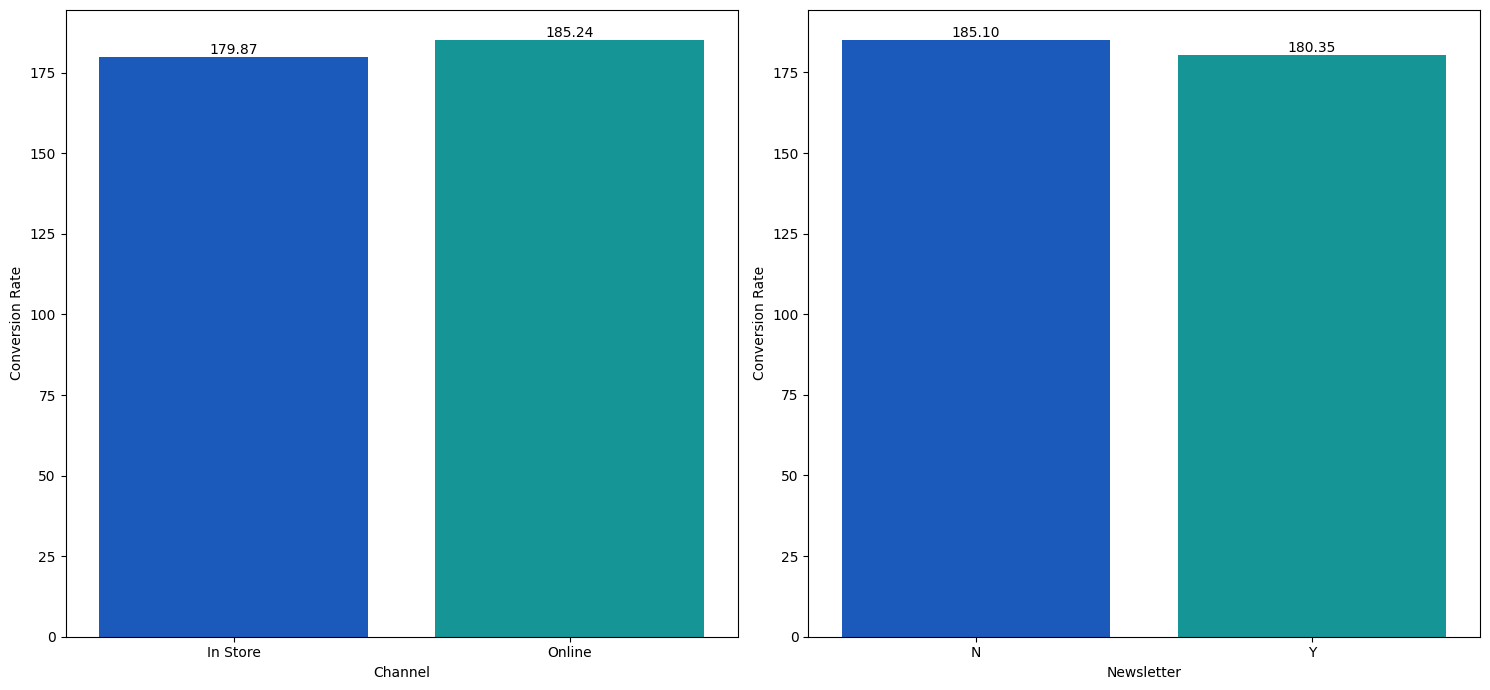

In [48]:
# Set the figure size
figuresize = (15, 7)

# Define the number of columns and rows for subplots
cols = 2  # Adjusted to 1 column for vertical orientation
rows = 1  # Adjusted to 2 rows for two categorical columns

# Define the list of filtered categorical columns
filtered_categorical_columns = ['Channel', 'Newsletter']

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=figuresize)

# Iterate over the subplots and plot barplots for each categorical column
for i, ax in enumerate(axes.flat, start=0):  # Start index adjusted to 0
    # Group the data by the current categorical column and count the number of unique users
    grouped_data = trans_detail.groupby(filtered_categorical_columns[i]).agg(relationship_duration=('relationship_duration', 'mean'), CustomerID=('CustomerID', 'nunique')).reset_index()


    # Plot a barplot for the conversion rate
    sns.barplot(x=filtered_categorical_columns[i], y='relationship_duration', data=grouped_data, palette='winter', ax=ax)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=0)

    # Set x-axis label
    ax.set_xlabel(filtered_categorical_columns[i])

    # Set y-axis label
    ax.set_ylabel('Conversion Rate')

    # Add text annotation to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

We can smoothly reallize that customers having equal value with all feature. It means the application of website and Mail-Chimp is satisfying the customer expectation with the same indicatior between higher and lower applcation.

#### B. **Webpage existing duration:**
* **<b><u>Item sales volume**

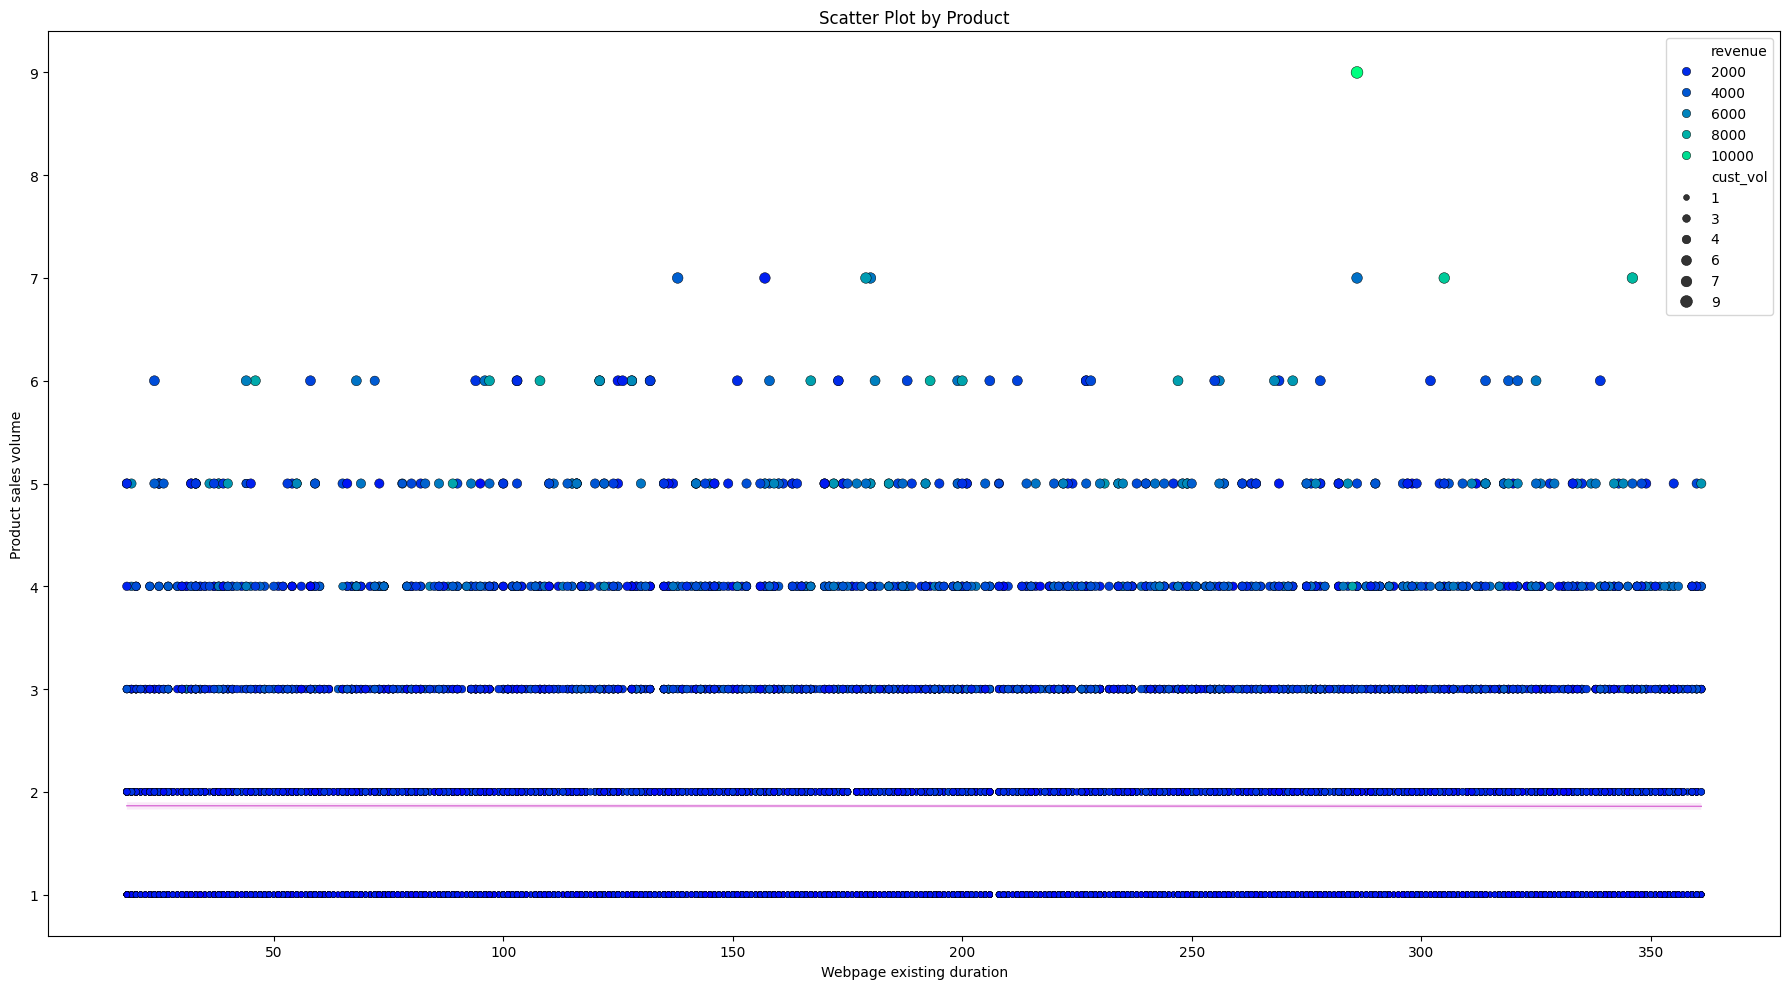

In [49]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['Product'], as_index=False).agg(existing_duration=('existing_duration','mean'),
                                                                               product_sales_vol=('ordinal', 'count'),
                                                                            revenue= ('SellPrice', 'sum'),
                                                                            cust_vol=('CustomerID', 'nunique'))

# Create scatter plot
sns.scatterplot(x='existing_duration', y='product_sales_vol',  hue='revenue', size='cust_vol',
                data=groupby_date, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='existing_duration', y='product_sales_vol', data=groupby_date, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Webpage existing duration')
plt.ylabel('Product sales volume')
plt.title(f'Scatter Plot by Product')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

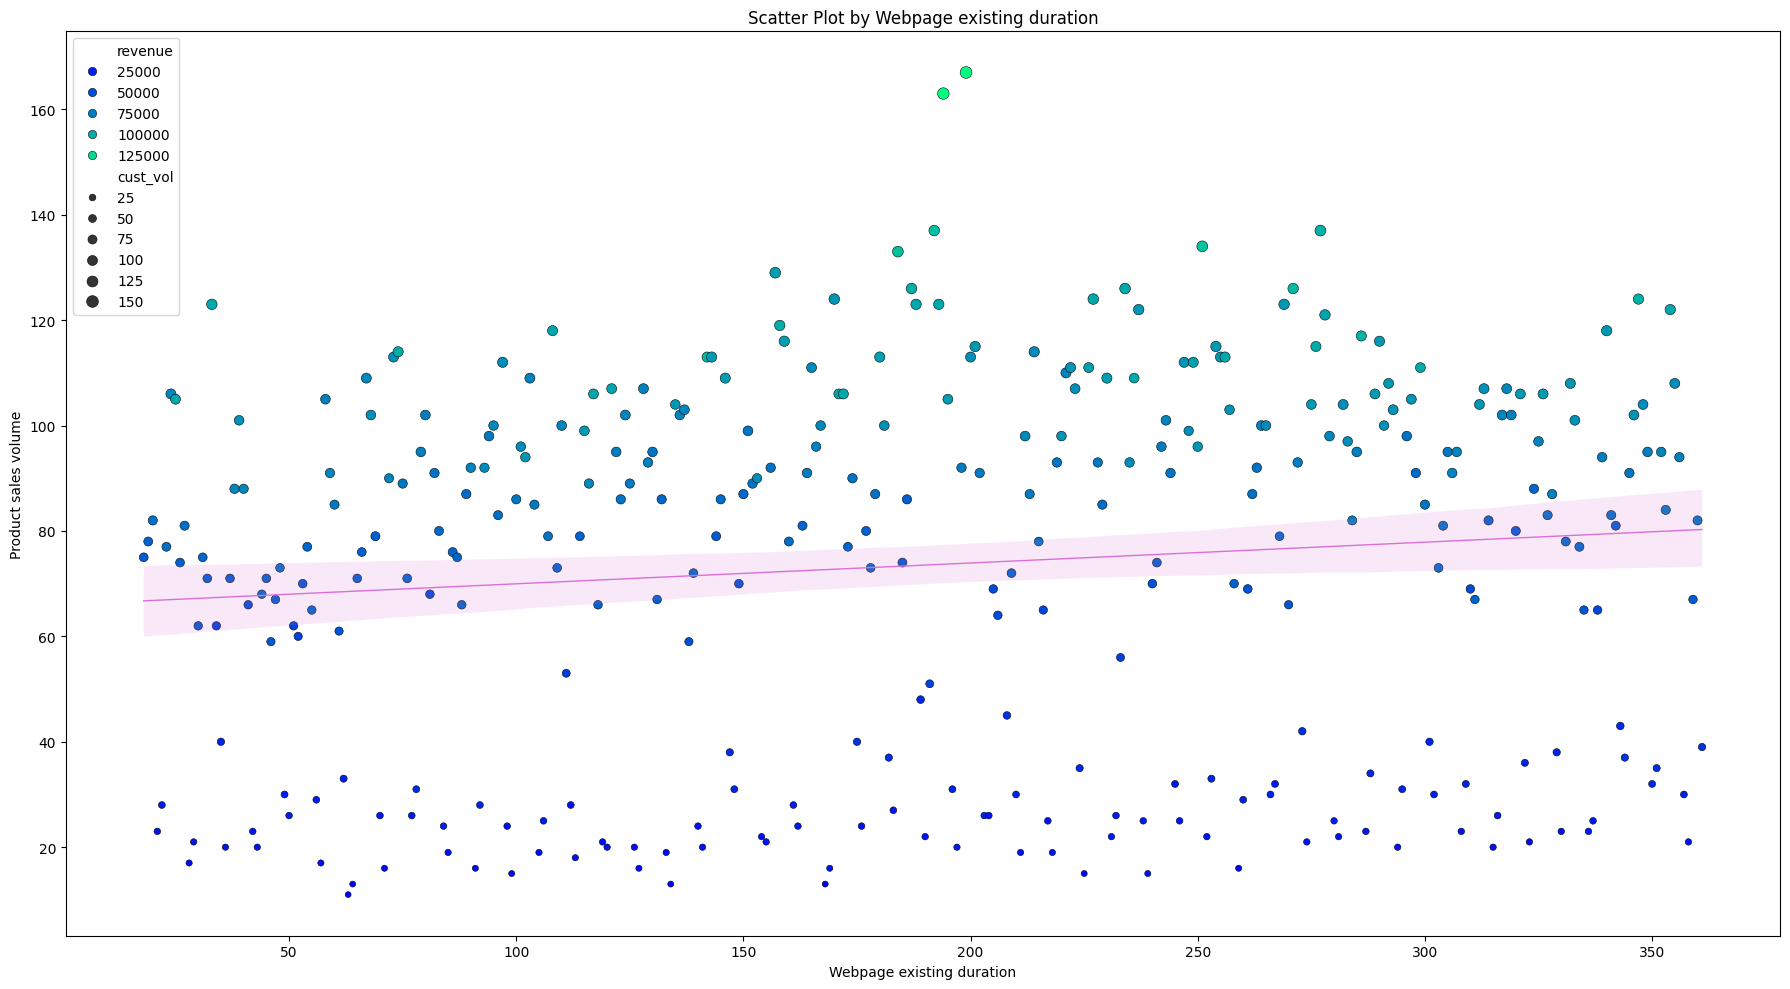

In [50]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['existing_duration'], as_index=False).agg(product_sales_vol=('ordinal', 'count'),
                                                                            revenue= ('SellPrice', 'sum'),
                                                                            cust_vol=('CustomerID', 'nunique'))

# Create scatter plot
sns.scatterplot(x='existing_duration', y='product_sales_vol',  hue='revenue', size='cust_vol',
                data=groupby_date, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='existing_duration', y='product_sales_vol', data=groupby_date, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Webpage existing duration')
plt.ylabel('Product sales volume')
plt.title(f'Scatter Plot by Webpage existing duration')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

This mixed chart points out the the webpage' existing duration has the visible impact on 'item_sales_volume', revenue and customer volume. The mean number of sold item climbed from just under 70 to just under 80 with the higher webpage's existing duration.

* **<b><u>Customer conversion rate:**

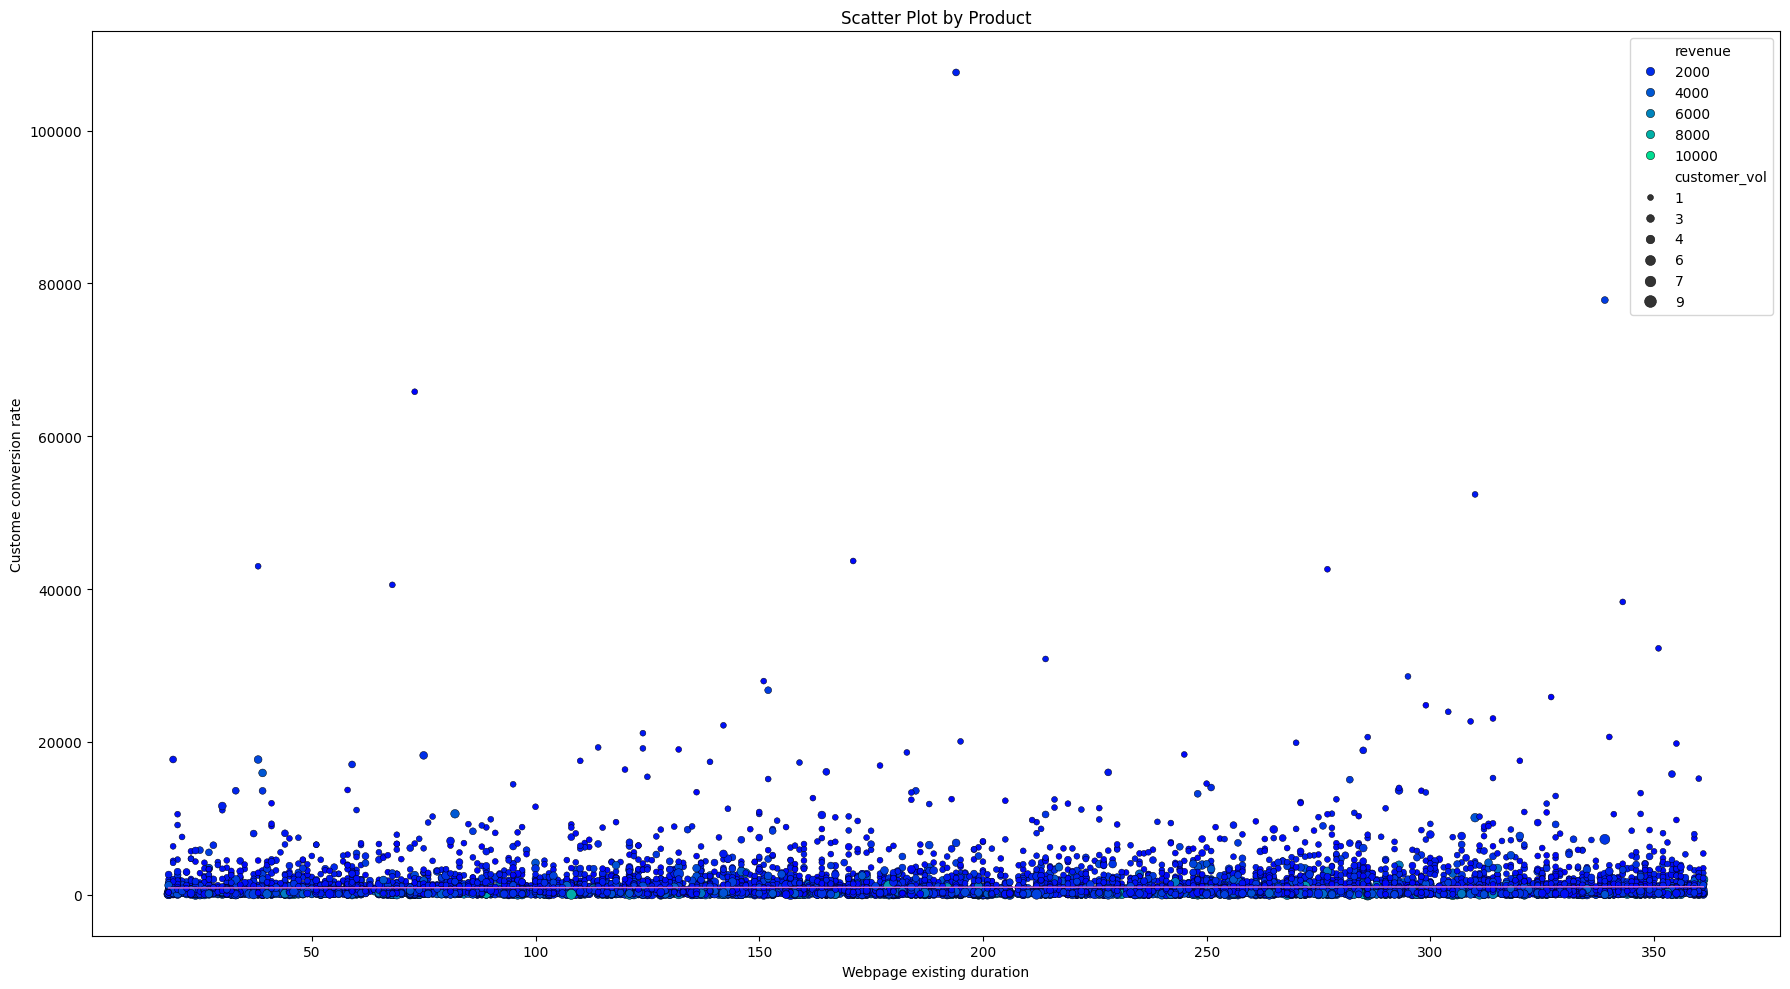

In [51]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_product = trans_detail.groupby(['Product'], as_index=False).agg(existing_duration=('existing_duration','mean'),
                                                                        uniquePageviews= ('uniquePageviews','mean'),
                                                                    user_vol=('users', 'mean'),
                                                                    order_vol=('OrderID','nunique'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'nunique'),
                                                                    revenue= ('SellPrice', 'sum'))

totall_users = groupby_product['user_vol']
groupby_product['conversion_rate']= totall_users/groupby_product['order_vol']

# Create scatter plot
sns.scatterplot(x='existing_duration', y='conversion_rate',  hue='revenue', size='customer_vol',
                data=groupby_product, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='existing_duration', y='conversion_rate', data=groupby_product, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Webpage existing duration')
plt.ylabel('Custome conversion rate')
plt.title(f'Scatter Plot by Product')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

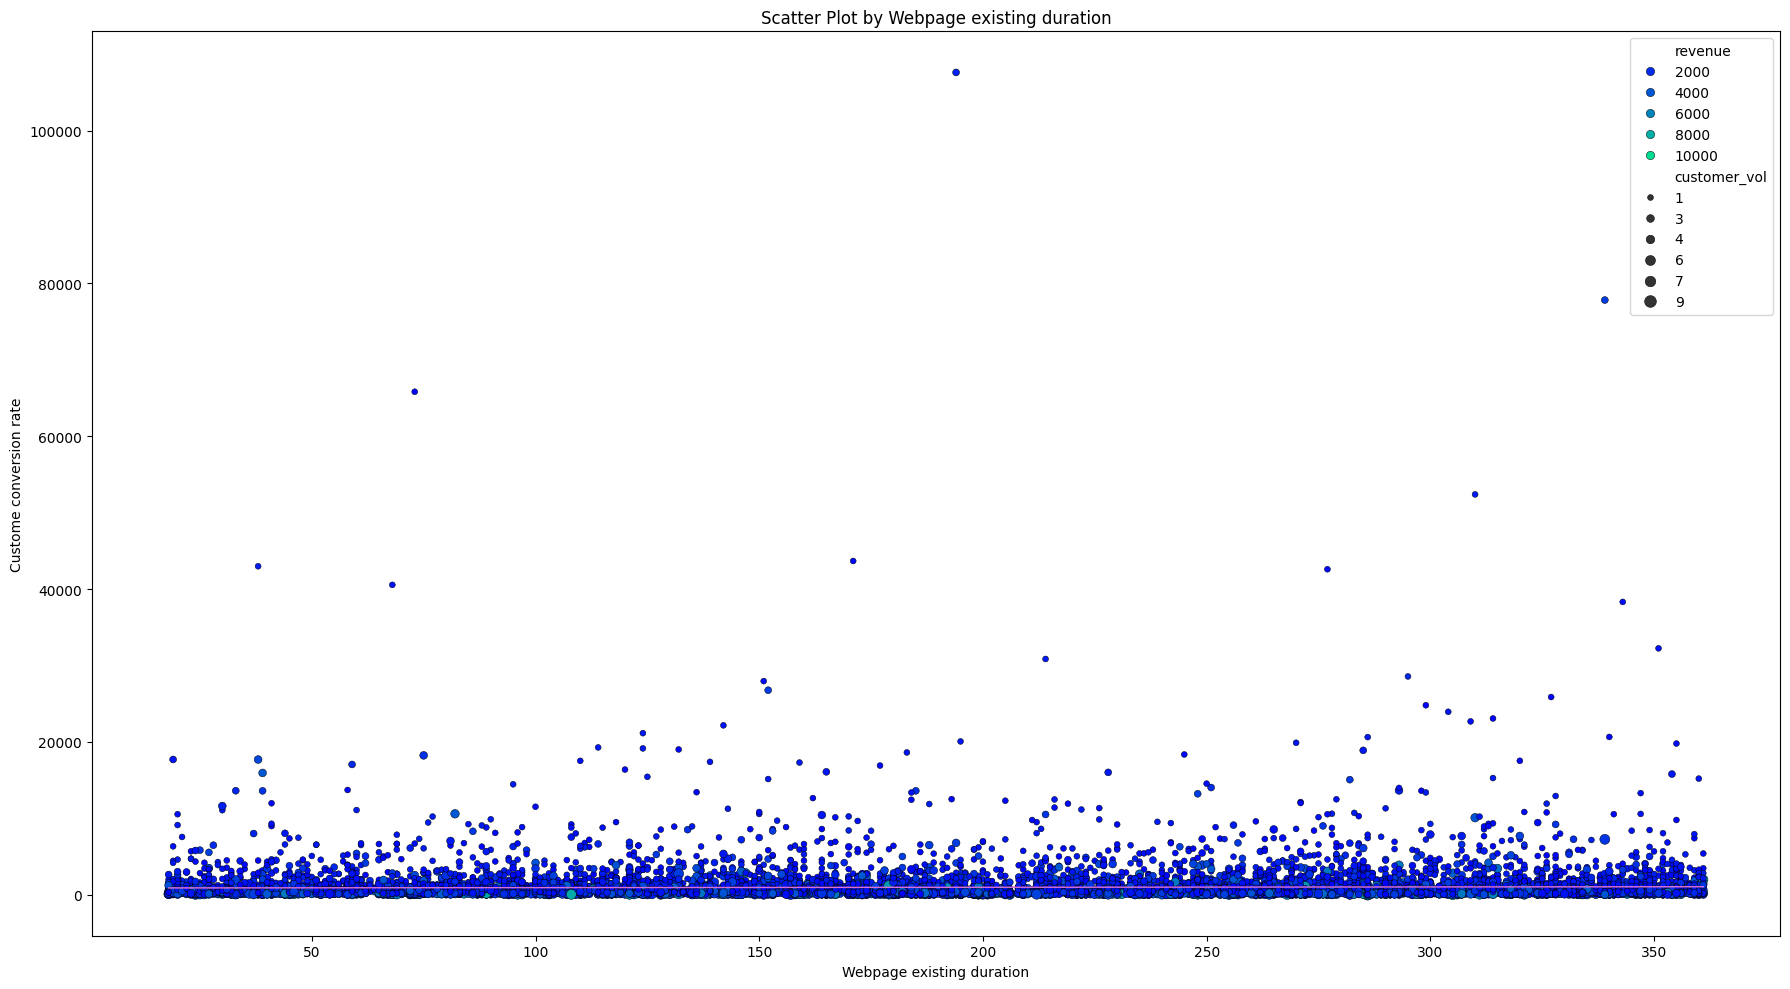

In [52]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['existing_duration'], as_index=False).agg(existing_duration=('existing_duration','mean'),
                                                                        uniquePageviews= ('uniquePageviews','mean'),
                                                                    user_vol=('users', 'mean'),
                                                                    order_vol=('OrderID','nunique'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'nunique'),
                                                                    revenue= ('SellPrice', 'sum'))

totall_users = groupby_product['user_vol']
groupby_product['conversion_rate']= totall_users/groupby_product['order_vol']

# Create scatter plot
sns.scatterplot(x='existing_duration', y='conversion_rate',  hue='revenue', size='customer_vol',
                data=groupby_product, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='existing_duration', y='conversion_rate', data=groupby_product, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Webpage existing duration')
plt.ylabel('Custome conversion rate')
plt.title(f'Scatter Plot by Webpage existing duration')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In constrast, the webpage's existing duration witnessed a minimal decrease treding with the higher webpage'existing duration. Howerver, the higher webpage'existing duration witnessed the the breakthrough of the number of orders and customers. It poits out there is some negative impact of  the webpage'existing duration on customer coversion.

* **<b><u>Relationship duration:**

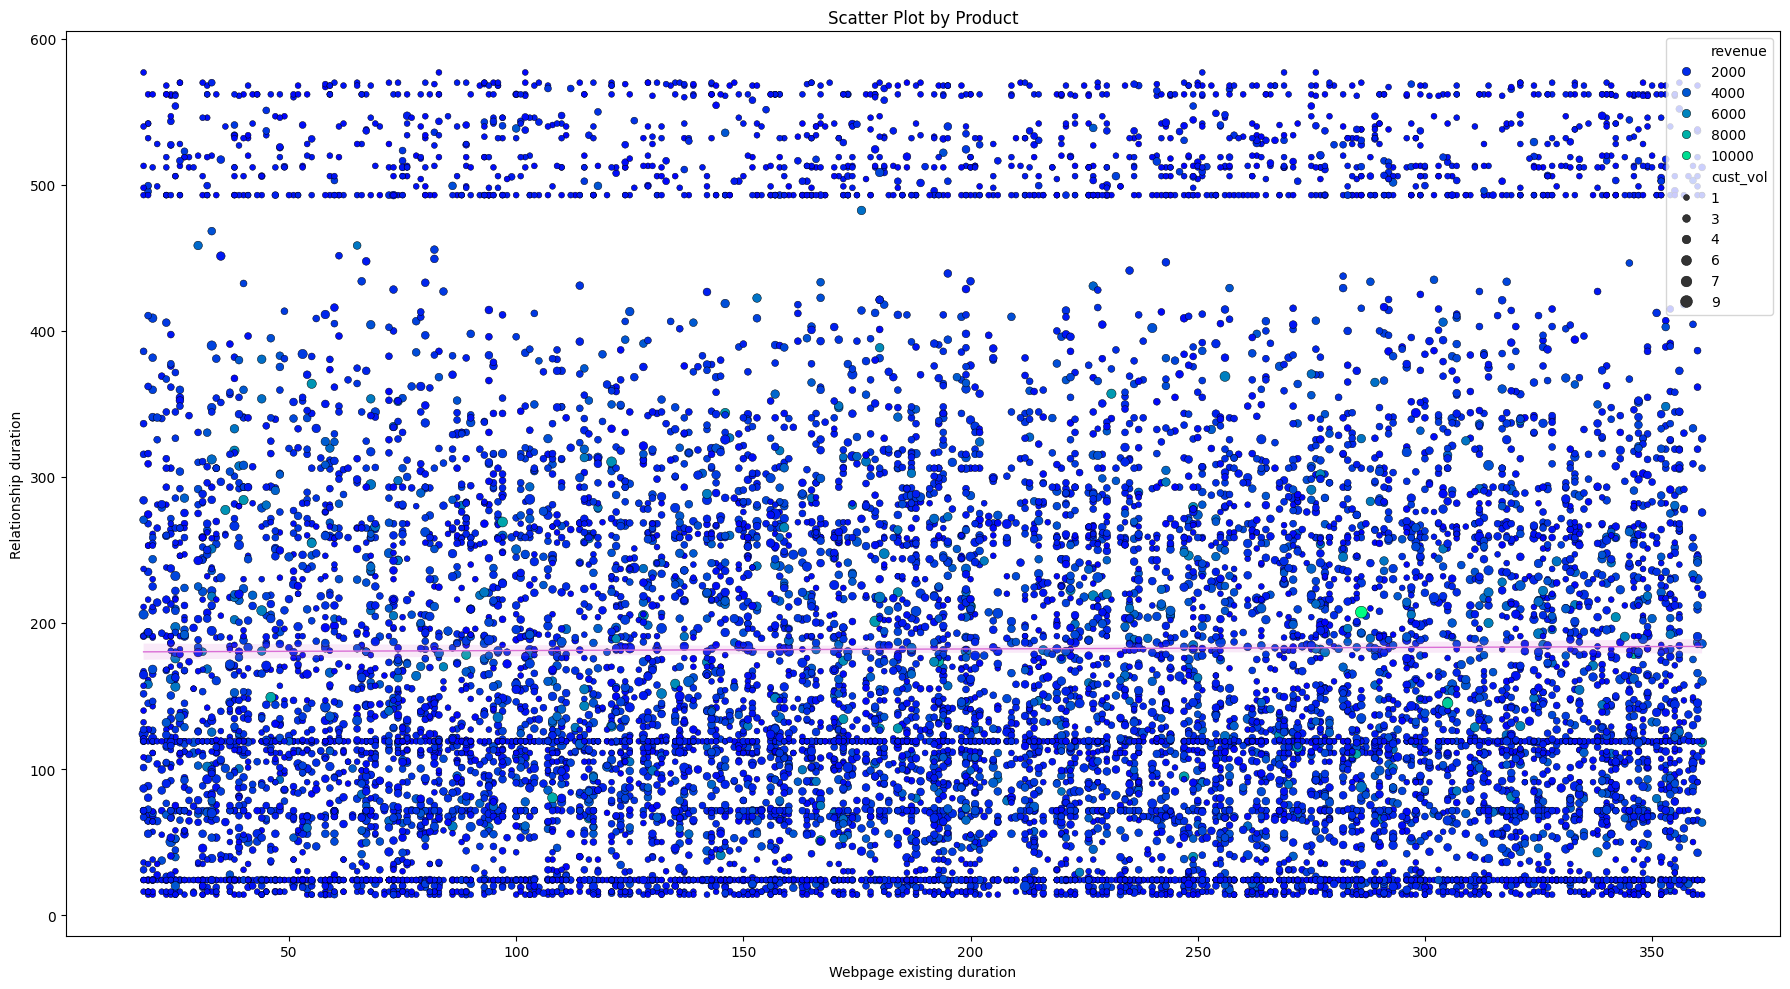

In [53]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['Product'], as_index=False).agg(existing_duration=('existing_duration','mean'),
                                                                    relationship_duration=('relationship_duration', 'mean'),
                                                                    user_vol=('users', 'mean'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'count'),
                                                                    revenue= ('SellPrice', 'sum'),
                                                                    cust_vol=('CustomerID', 'nunique'))

# Create scatter plot
sns.scatterplot(x='existing_duration', y='relationship_duration',  hue='revenue', size='cust_vol',
                data=groupby_date, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='existing_duration', y='relationship_duration', data=groupby_date, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Webpage existing duration')
plt.ylabel('Relationship duration')
plt.title(f'Scatter Plot by Product')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

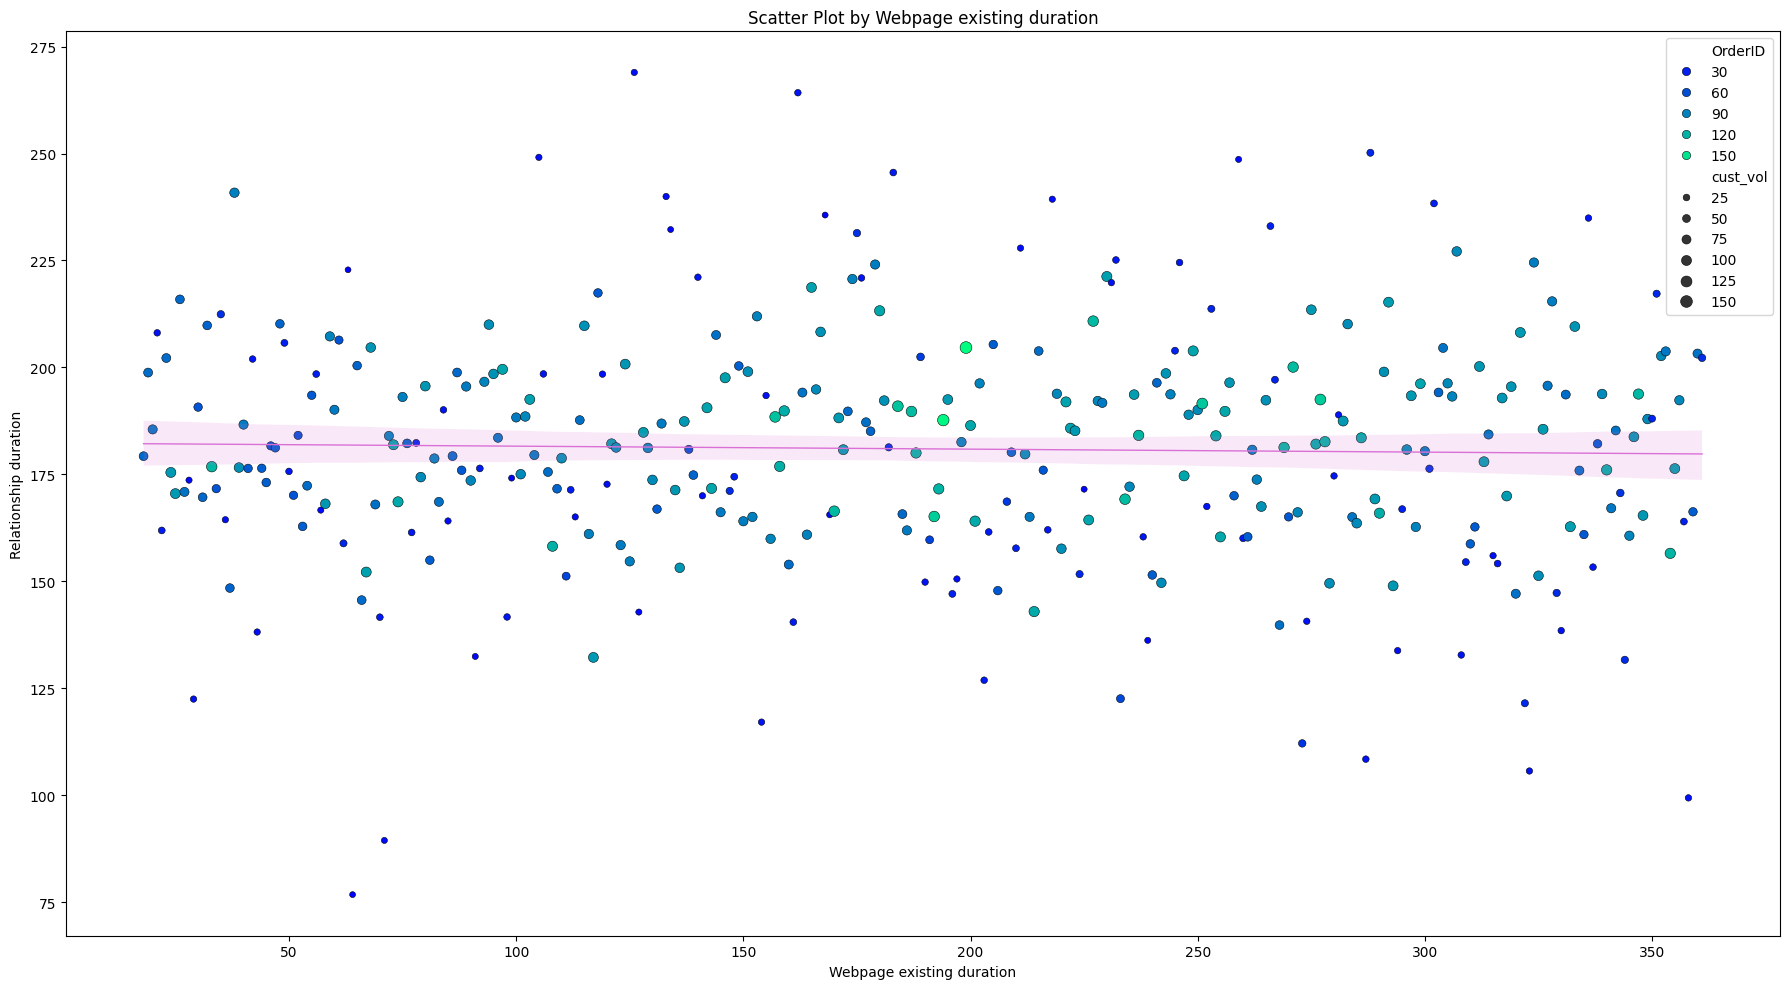

In [54]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_date = trans_detail.groupby(['existing_duration'], as_index=False).agg(relationship_duration=('relationship_duration', 'mean'),
                                                                            OrderID= ('OrderID', 'nunique'),
                                                                            cust_vol=('CustomerID', 'nunique'))

# Create scatter plot
sns.scatterplot(x='existing_duration', y='relationship_duration',  hue='OrderID', size='cust_vol',
                data=groupby_date, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='existing_duration', y='relationship_duration', data=groupby_date, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Webpage existing duration')
plt.ylabel('Relationship duration')
plt.title(f'Scatter Plot by Webpage existing duration')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [55]:
trans_detail['relationship_duration'].describe()

count    25213.000000
mean       182.543133
std        182.593678
min         14.000000
25%         24.000000
50%        119.000000
75%        247.000000
max        577.000000
Name: relationship_duration, dtype: float64

This mixed chart points out there is no obvious impact of the webpage'existing duration on customer coversion. The meaning is expreesed vaguely.

However, combining the decriptive statistical table and the mixed chart we can see the customers duration scattering numerously in the most recent year. It means the numer of customer joining grew up from launching the website.

#### C. **Unique page view:**
* **<b><u>Item sales volume**

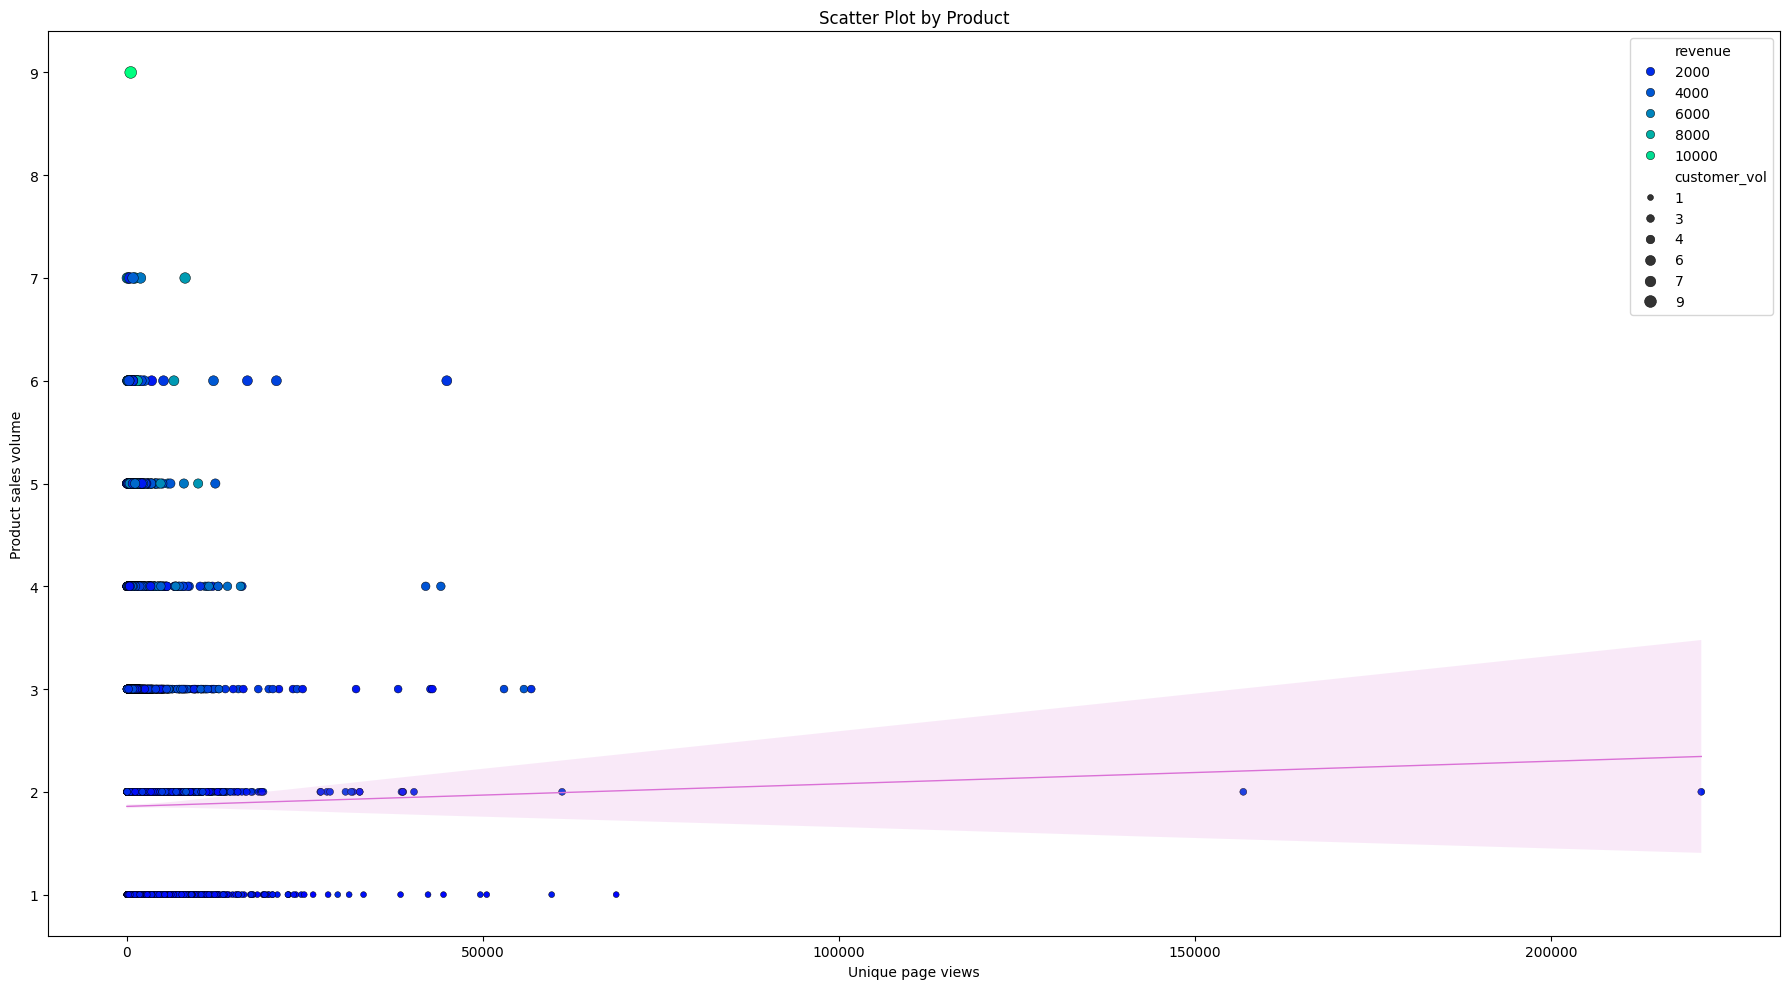

In [56]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_product=trans_detail.groupby(['Product'], as_index=False).agg(uniquePageviews= ('uniquePageviews','mean'),
                                                                     existing_duration=('existing_duration','mean'),
                                                                    relationship_duration=('relationship_duration', 'mean'),
                                                                    user_vol=('users', 'mean'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'nunique'),
                                                                    revenue= ('SellPrice', 'sum'))

# Create scatter plot
sns.scatterplot(x='uniquePageviews', y='product_sales_vol',  hue='revenue', size='customer_vol',
                data=groupby_product, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='uniquePageviews', y='product_sales_vol', data=groupby_product, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Unique page views')
plt.ylabel('Product sales volume')
plt.title(f'Scatter Plot by Product')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

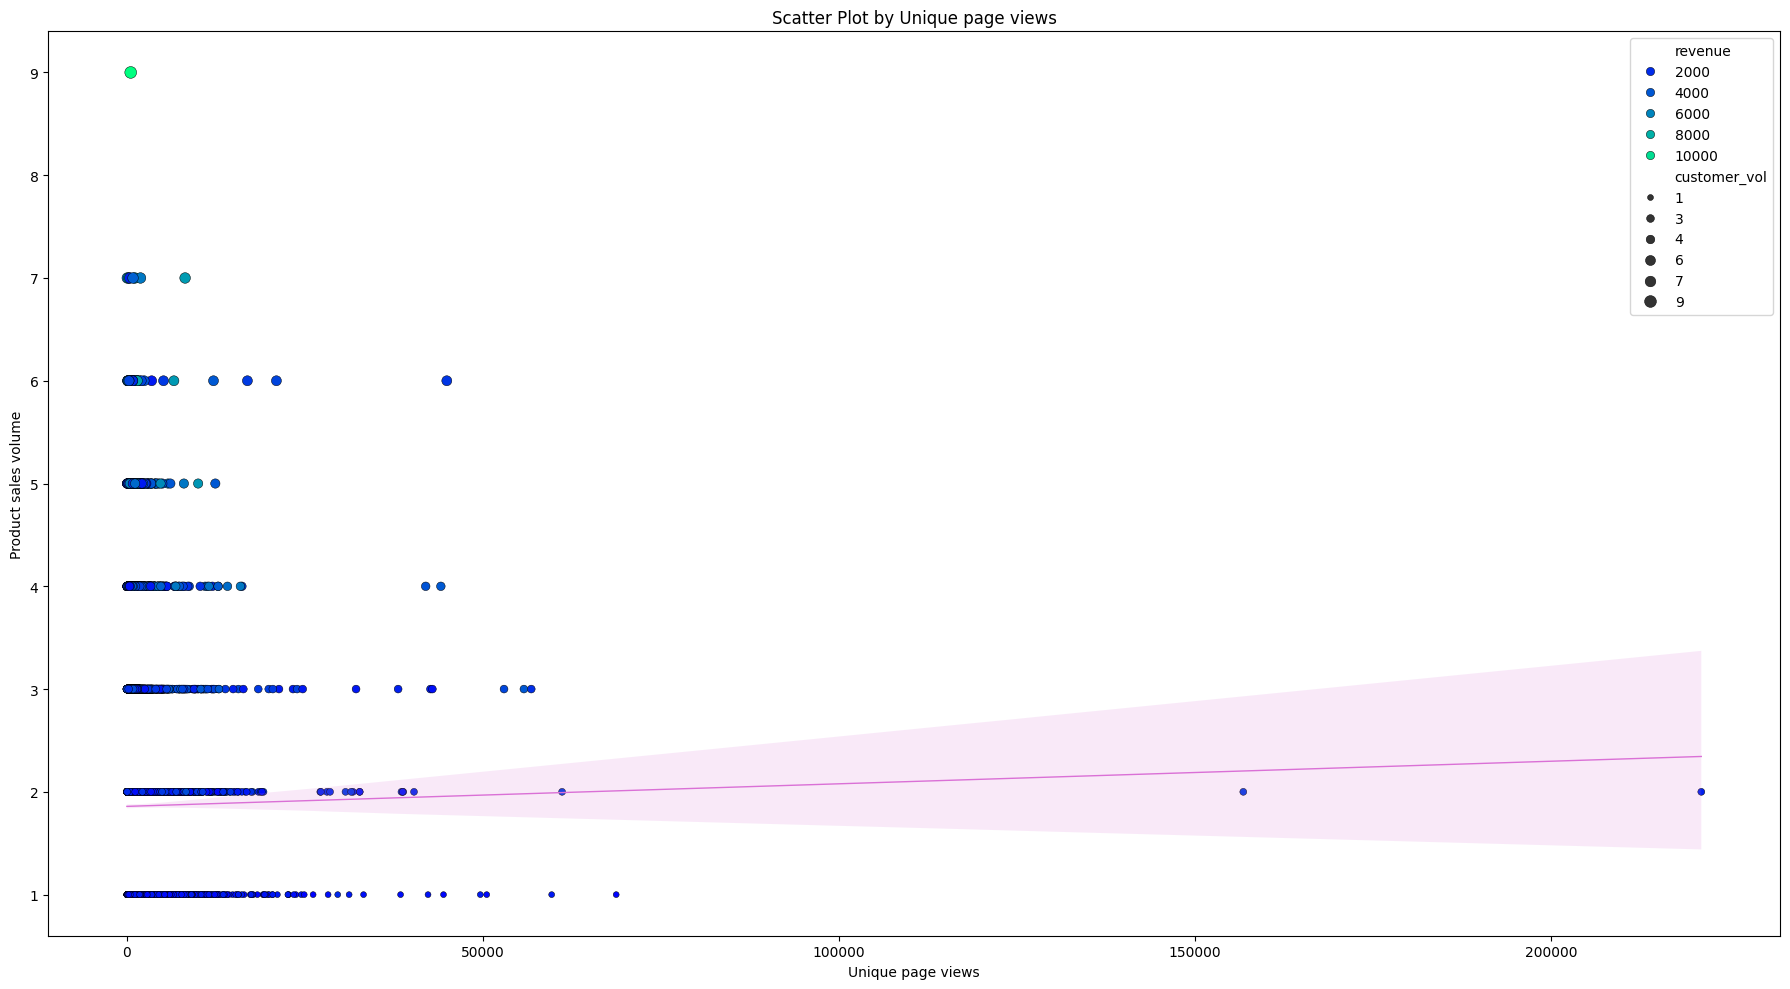

In [57]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_numeric=trans_detail.groupby(['uniquePageviews'], as_index=False).agg(uniquePageviews= ('uniquePageviews','mean'),
                                                                     existing_duration=('existing_duration','mean'),
                                                                    relationship_duration=('relationship_duration', 'mean'),
                                                                    user_vol=('users', 'mean'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'nunique'),
                                                                    revenue= ('SellPrice', 'sum'))

# Create scatter plot
sns.scatterplot(x='uniquePageviews', y='product_sales_vol',  hue='revenue', size='customer_vol',
                data=groupby_product, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='uniquePageviews', y='product_sales_vol', data=groupby_product, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Unique page views')
plt.ylabel('Product sales volume')
plt.title(f'Scatter Plot by Unique page views')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

* **<b><u>Customer conversion rate:**

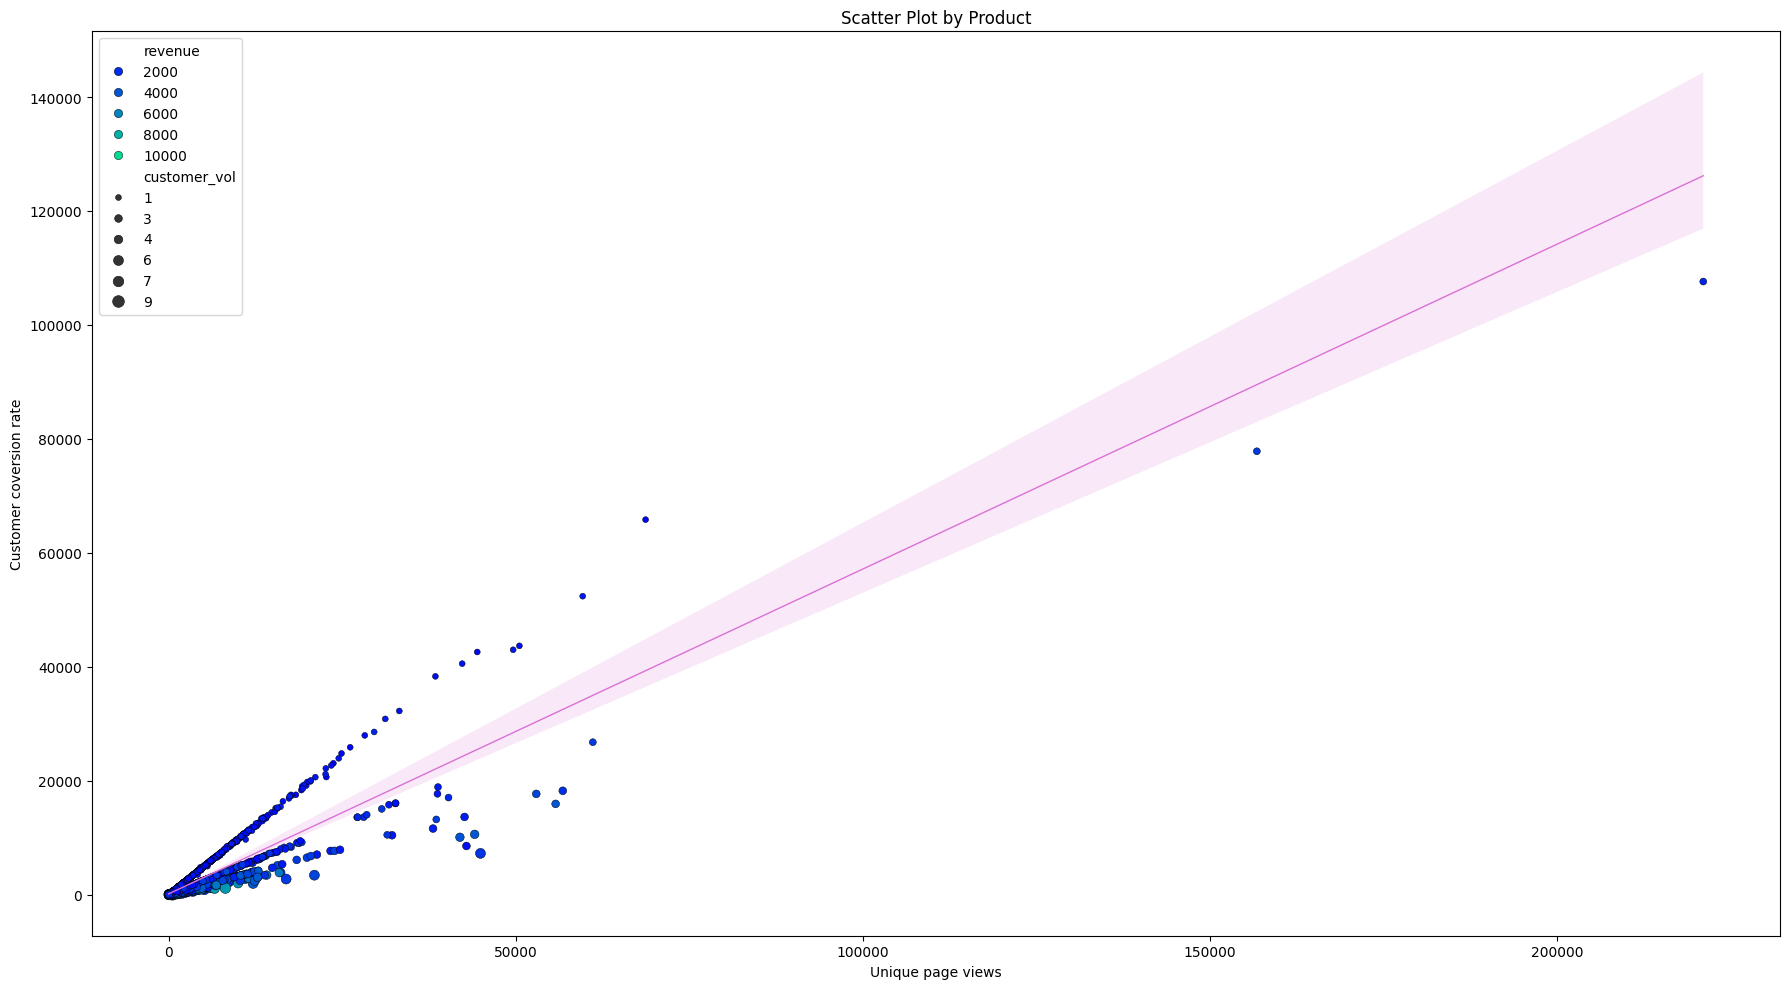

In [58]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_numeric=trans_detail.groupby(['Product'], as_index=False).agg(uniquePageviews= ('uniquePageviews','mean'),
                                                                    user_vol=('users', 'mean'),
                                                                    order_vol=('OrderID','nunique'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'nunique'),
                                                                    revenue= ('SellPrice', 'sum'))

totall_users = groupby_numeric['user_vol']
groupby_numeric['conversion_rate']= totall_users/groupby_numeric['order_vol']

# Create scatter plot
sns.scatterplot(x='uniquePageviews', y='conversion_rate',  hue='revenue', size='customer_vol',
                data=groupby_numeric, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='uniquePageviews', y='conversion_rate', data=groupby_numeric, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Unique page views')
plt.ylabel('Customer coversion rate')
plt.title(f'Scatter Plot by Product')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

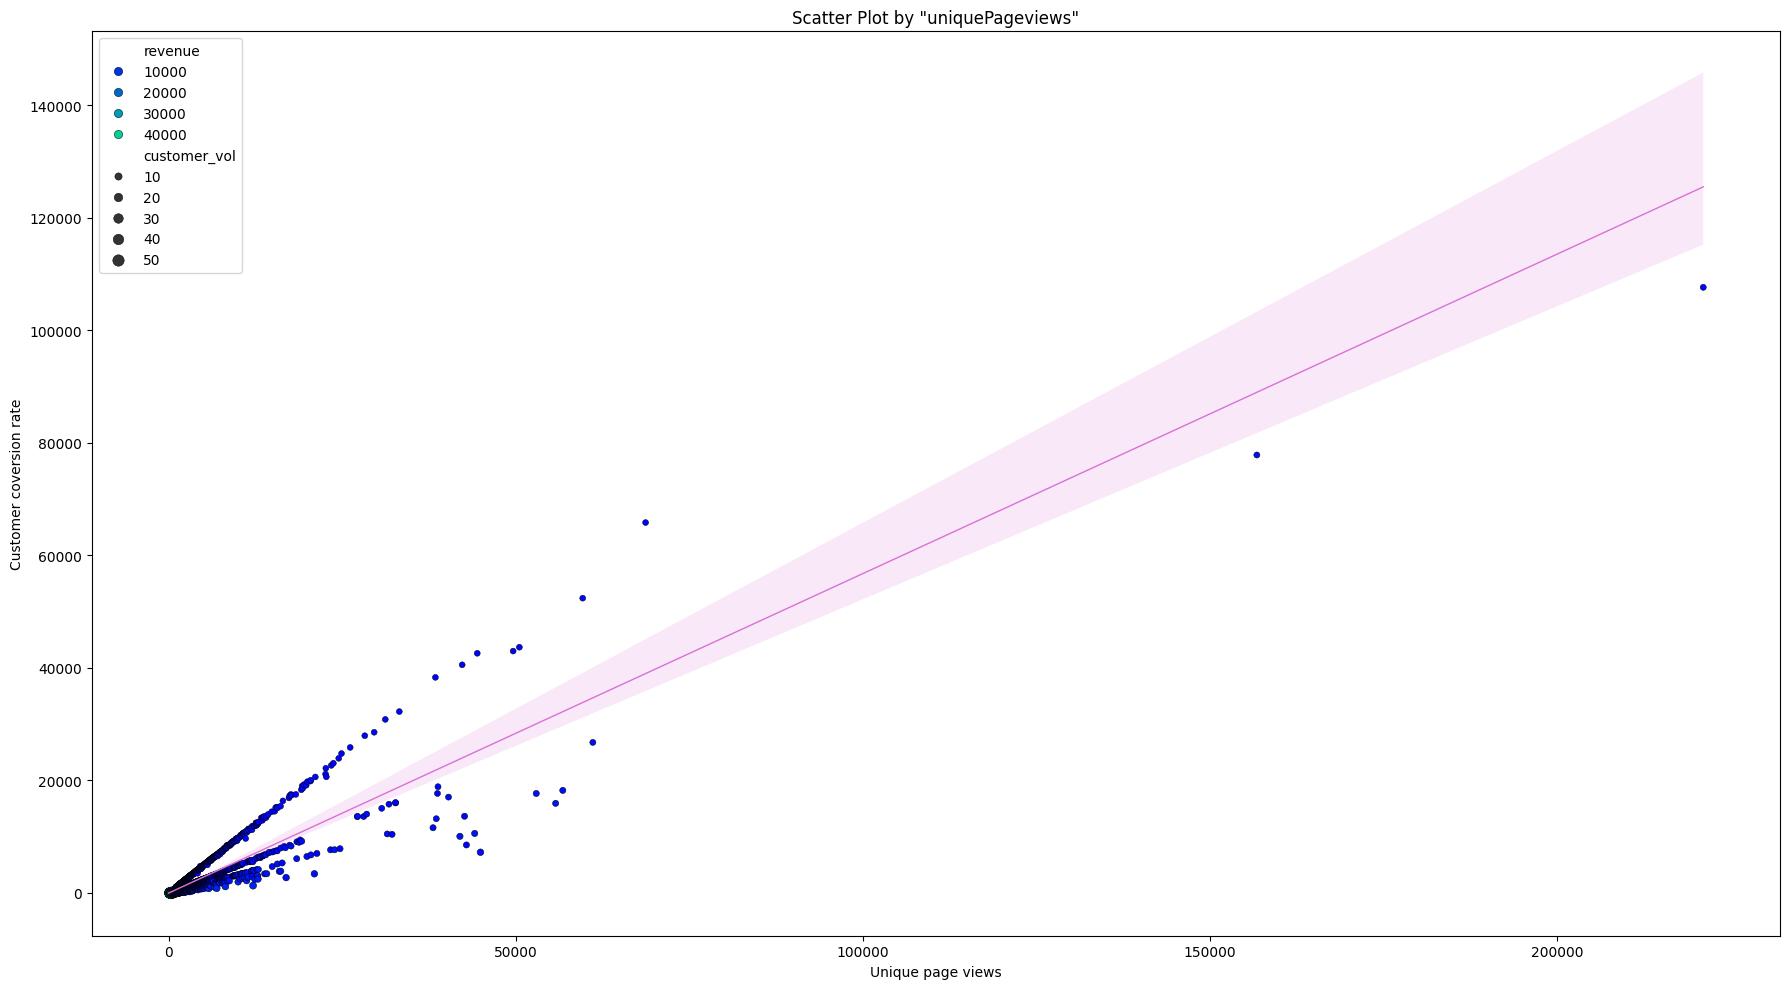

In [59]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_numeric=trans_detail.groupby(['uniquePageviews'], as_index=False).agg(uniquePageviews= ('uniquePageviews','mean'),
                                                                    user_vol=('users', 'mean'),
                                                                    order_vol=('OrderID','nunique'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'nunique'),
                                                                    revenue= ('SellPrice', 'sum'))

totall_users = groupby_numeric['user_vol']
groupby_numeric['conversion_rate']= totall_users/groupby_numeric['order_vol']

# Create scatter plot
sns.scatterplot(x='uniquePageviews', y='conversion_rate',  hue='revenue', size='customer_vol',
                data=groupby_numeric, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='uniquePageviews', y='conversion_rate', data=groupby_numeric, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Unique page views')
plt.ylabel('Customer coversion rate')
plt.title(f'Scatter Plot by "uniquePageviews"')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

* **<b><u>Relationship duration:**

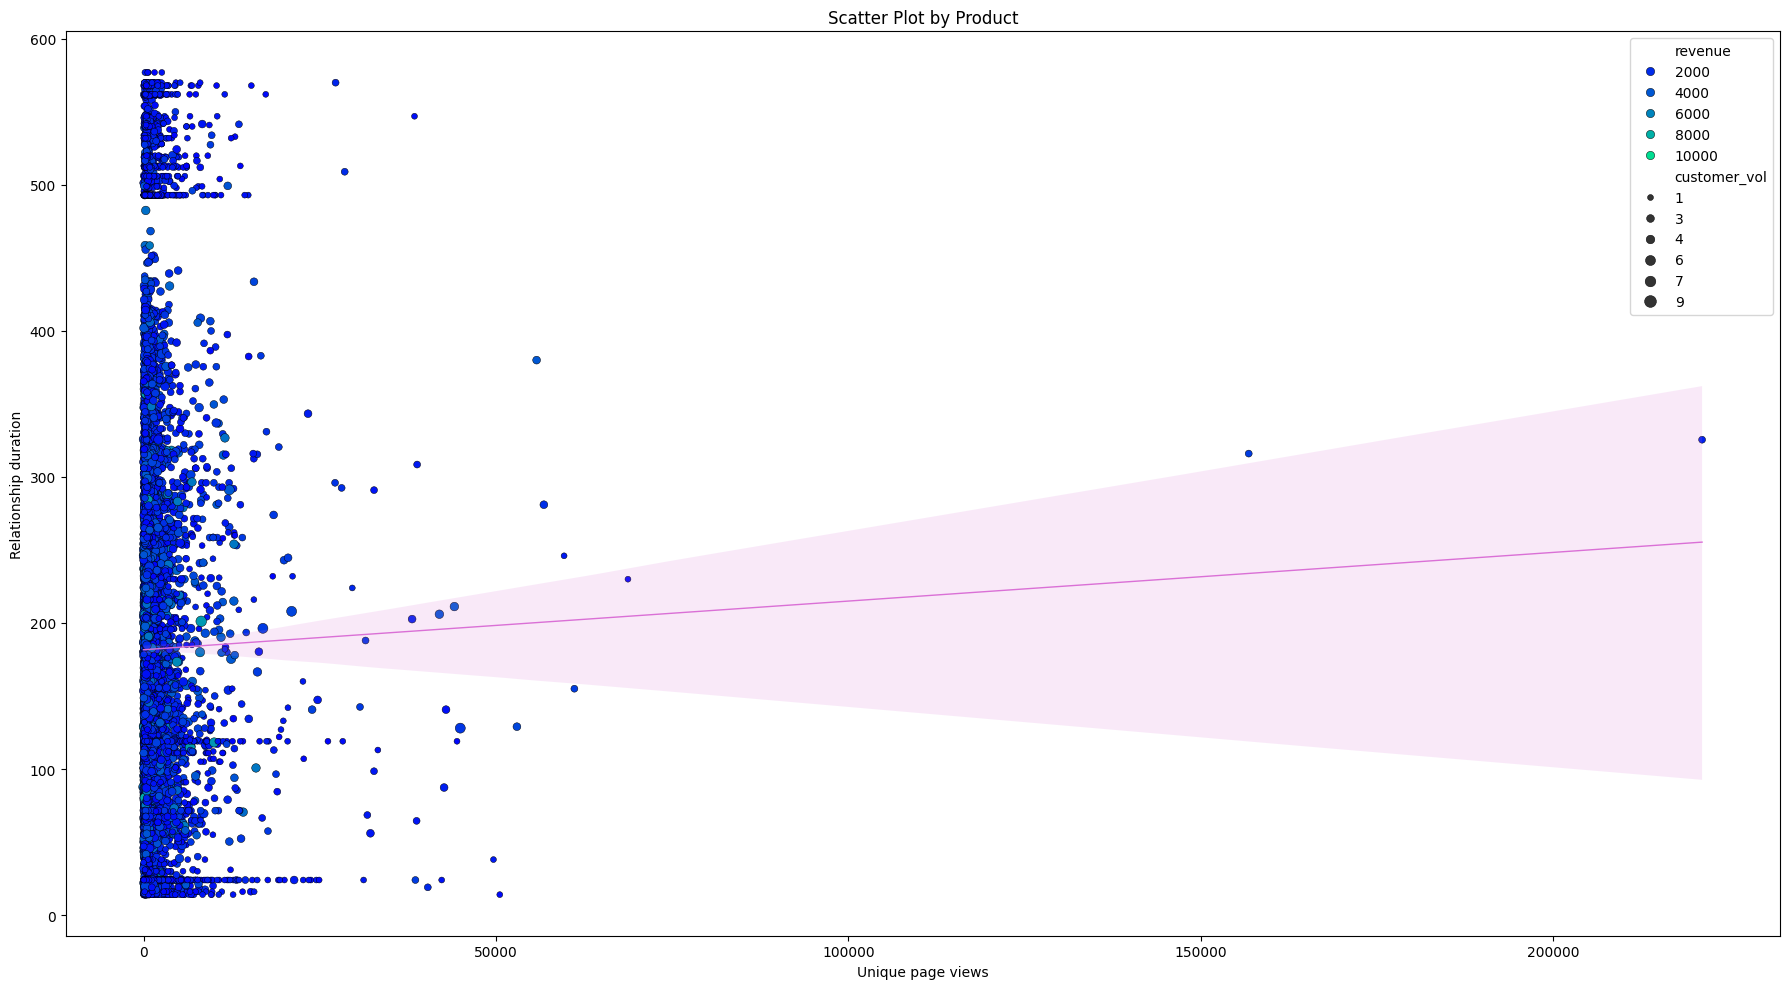

In [60]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_numeric=trans_detail.groupby(['Product'], as_index=False).agg(uniquePageviews= ('uniquePageviews','mean'),
                                                                    relationship_duration=('relationship_duration', 'mean'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'nunique'),
                                                                    revenue= ('SellPrice', 'sum'))

# Create scatter plot
sns.scatterplot(x='uniquePageviews', y='relationship_duration',  hue='revenue', size='customer_vol',
                data=groupby_numeric, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='uniquePageviews', y='relationship_duration', data=groupby_numeric, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Unique page views')
plt.ylabel('Relationship duration')
plt.title(f'Scatter Plot by Product')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

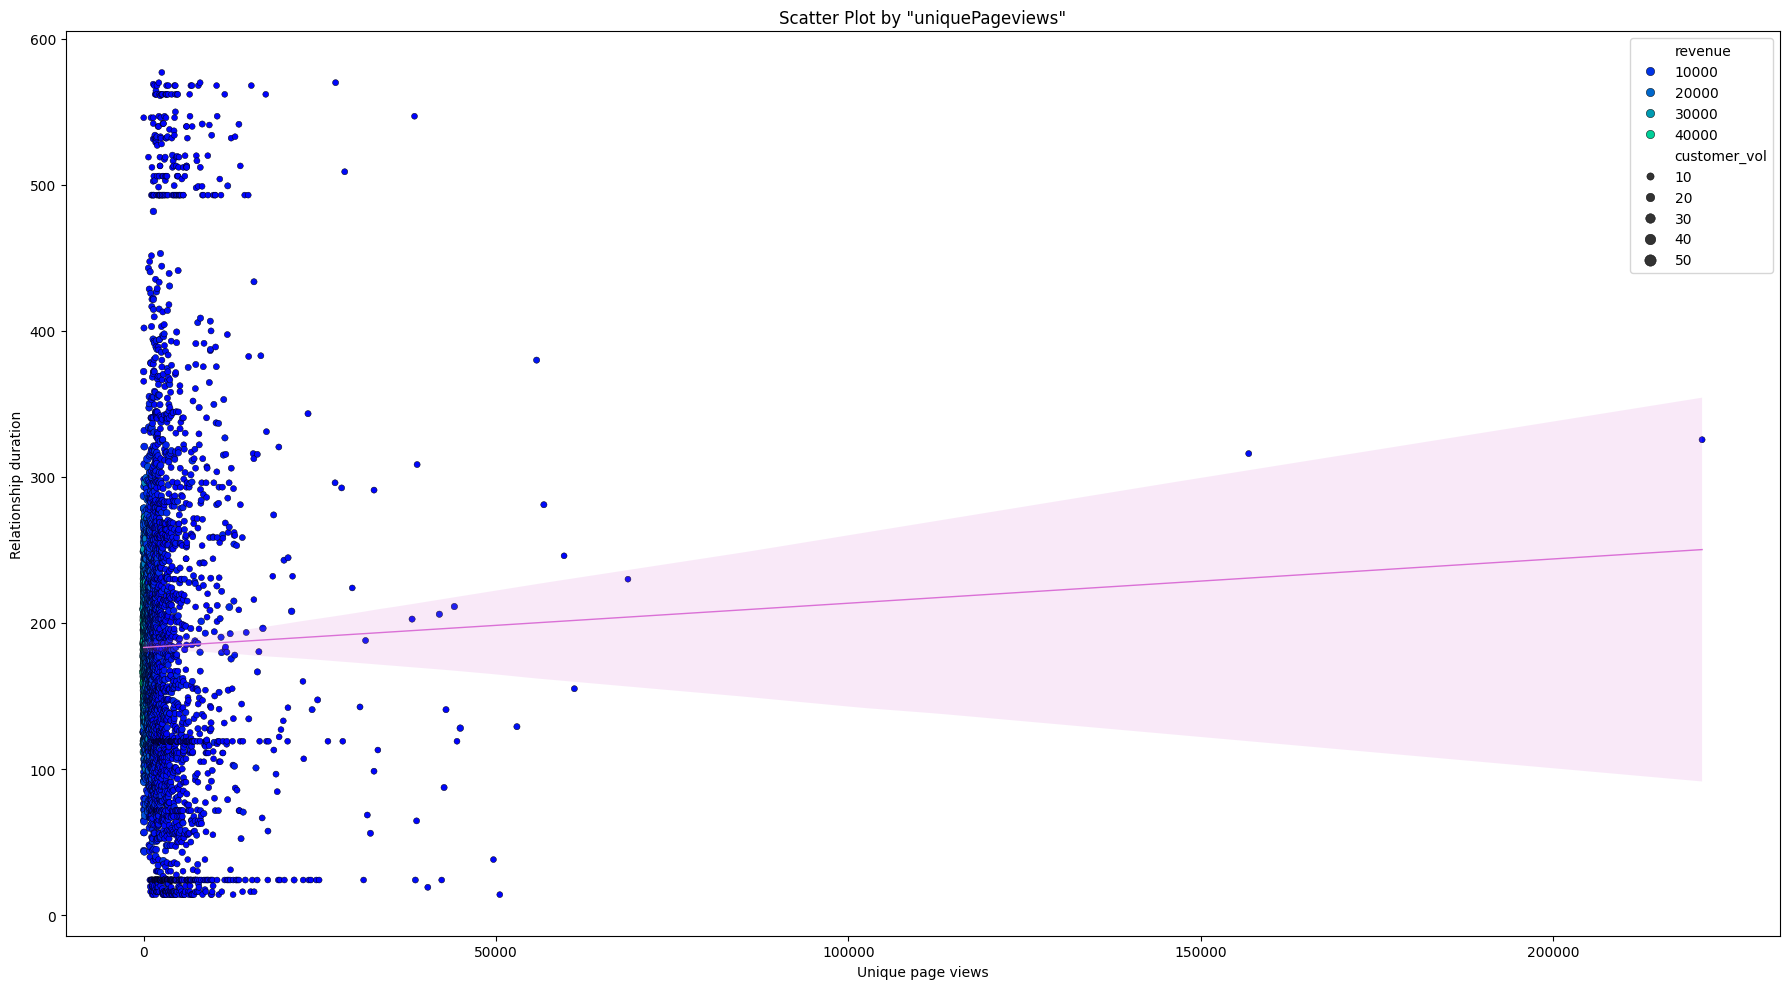

In [61]:
# Sets up the figure size and create subplots
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the sum of installs and count of apps
groupby_numeric=trans_detail.groupby(['uniquePageviews'], as_index=False).agg(uniquePageviews= ('uniquePageviews','mean'),
                                                                    relationship_duration=('relationship_duration', 'mean'),
                                                                    customer_vol= ('CustomerID', 'nunique'),
                                                                    product_sales_vol=('ordinal', 'nunique'),
                                                                    revenue= ('SellPrice', 'sum'))

# Create scatter plot
sns.scatterplot(x='uniquePageviews', y='relationship_duration',  hue='revenue', size='customer_vol',
                data=groupby_numeric, palette='winter', edgecolor='black')

# Add trend line
sns.regplot(x='uniquePageviews', y='relationship_duration', data=groupby_numeric, scatter=False, color='orchid', line_kws={"linewidth": 1})

plt.xlabel('Unique page views')
plt.ylabel('Relationship duration')
plt.title(f'Scatter Plot by "uniquePageviews"')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

By these charts, it can be seen that the weak impact of the unique pageviews on the depended features. However, surely, there are correlational impacts existing between them. The products have the good traffic, have the better sales performance, for instance, the higher page view have more than one sold item, but not too high. Noticeable, the product having higher unique page views could be defined that have the low coversion rate.

Because, beside the transactional online, the products are purchased by offline too. In addition, toward clothing, the instore purchasing certainly bring the better customer experience than online purchasing. So, the low page view is also have several sold item.

=> My conclusion is pageview make the good impact on sale performance. It stimulates the purchasing of items which have the low transaction.

### 2. <b><u>Customer segmentation </u></b>
Similar to the first request, the initial step is to deal with this request is determining the fundamental and consequent objects.

In this request, the matter could be all numerical, categorical and datetime feature. The exception is the feature that characterise the identity, unique, distinct value.

The main means which is exploited for the segmentation, is classification splitting and merging data by the quitely resemblance.

The outcome are the new columns which classificate the customers by the ranked group.

In [62]:
customer_summary = trans_detail.groupby('CustomerID').agg(total_orders=('OrderID','count'),total_revenue = ('SellPrice','sum'))

In [63]:
customer_data = customers.merge(customer_summary,left_on = 'ID',right_on = 'CustomerID',how = 'inner')

### <b><u>Loyalty:

In [64]:
import datetime

customer_data['Loyalty'] = ''
i = 0
for i in range(len(customer_data)):
    customer_data.loc[[i],'Loyalty'] = date_today.day - datetime.datetime.date(customer_data['DateJoined'][i]).day

In [65]:
customer_data['Loyalty'].unique()

array([11, 8, 7, 6, 5, 1, -2, 25, 24, 23, 22, 21, 18, 17, 16, 15, 14, 10,
       27, 9, 4, 3, 2, 0, 26, 13, 12, -1, -3, 20, 19], dtype=object)

### <b><u>Monetary:

In [66]:
customer_data['Monetary'] = customer_data.apply(lambda x: '1' if (x['total_revenue'] < 14905)
                                   else ('2' if (x['total_revenue'] >= 14905 and x['total_revenue'] < 26080)
                                         else ('3' if (x['total_revenue'] >= 26080 and x['total_revenue'] < 36911)
                                               else '4')), axis = 1)

In [67]:
customer_data['Monetary']=customer_data['Monetary'].astype(int)
customer_data['Monetary'].value_counts()

1    193
4    193
3    192
2    192
Name: Monetary, dtype: int64

### <b><u>Demographic (Youth):

In [68]:
customer_data['Youth'] = customer_data.apply(lambda x: '1' if (x['Age'] < 22)
                                   else ('2' if (x['Age'] >= 22 and x['Age'] < 32)
                                         else ('3' if (x['Age'] >= 32 and x['Age'] < 43)
                                               else '4')), axis = 1)

In [69]:
customer_data['Youth']=customer_data['Youth'].astype(int)
customer_data['Youth'].value_counts()

1    208
4    191
3    190
2    181
Name: Youth, dtype: int64

### <b><u>Demographic (Gender):

In [70]:
customer_data['Gender'].unique()

array(['B', 'M', 'F'], dtype=object)

In [71]:
customer_data['Gender'].value_counts()

F    262
M    257
B    251
Name: Gender, dtype: int64

### <b><u>Geographic (Country/City):

In [72]:
customer_data['Country'].unique()

array(['FR - France', 'GER - Germany', 'UK - United Kingdom',
       'IT - Italy'], dtype=object)

In [73]:
customer_data['Country'].value_counts()

GER - Germany          321
FR - France            256
IT - Italy             128
UK - United Kingdom     65
Name: Country, dtype: int64

In [74]:
customer_data.describe()

ID         Age  relationship_duration  total_orders  \
count  770.000000  770.000000             770.000000    770.000000   
mean   384.500000   31.894805             184.218182     32.744156   
std    222.424144   13.045209             184.770864     16.360956   
min      0.000000   10.000000              14.000000      1.000000   
25%    192.250000   21.000000              24.000000     19.000000   
50%    384.500000   31.000000             119.000000     33.000000   
75%    576.750000   42.000000             251.750000     46.000000   
max    769.000000   55.000000             577.000000     67.000000   

       total_revenue    Monetary       Youth  
count     770.000000  770.000000  770.000000  
mean    26515.867532    2.500000    2.472727  
std     13520.645847    1.119922    1.134589  
min       745.000000    1.000000    1.000000  
25%     14905.750000    1.250000    1.000000  
50%     26080.500000    2.500000    2.000000  
75%     36911.500000    3.750000    3.000000  
max     62539.000000    4.000000    4.000000

### <b><u>Receiving newsletter:

In [75]:
customer_data['Newsletter'].unique()

array(['N', 'Y'], dtype=object)

In [76]:
customer_data['Newsletter'].value_counts()

Y    413
N    357
Name: Newsletter, dtype: int64

### <b><u>Posh & Trending:

In [77]:
trans_detail.head()

OrderID  CustomerID  ItemID TransactionDate   Channel  \
0     1639         144    2736      2020-01-01    Online   
1     6695         612   14942      2020-01-01  In Store   
2     1170         108   12987      2020-01-01  In Store   
3     1830         166    3252      2020-01-01  In Store   
4     5800         533   12603      2020-01-01    Online   

               FirstName                LastName              Country  \
0    Ric0.12434077974775   Tamo0.747855032136146           IT - Italy   
1    Ridh0.6269774796358    Zuk0.439693338061207          FR - France   
2    Ch0.237920427031177    Loh0.791222685855633          FR - France   
3  Fern0.180060029060372  Medin0.634042769916507           IT - Italy   
4    Se0.730563054519865  Girsa0.795430113156434  UK - United Kingdom   

  DateJoined Gender  ... users uniquePageviews pageviews  \
0 2019-06-07      M  ...   427             434       451   
1 2020-12-12      B  ...  1017            1032      1088   
2 2020-06-20      M  ...   393             395       413   
3 2020-08-01      F  ...  2617            2672      2816   
4 2019-08-23      M  ...   588             605       674   

   Posted On (DD/MM/YYYY)  existing_duration                     Product  \
0     2020-10-16 04:07:14                 72  plaU-info0.921152245977159   
1     2020-08-02 00:29:04                147  appu-news0.135855850839363   
2     2020-06-16 17:19:29                194  tesac-car0.479461576739068   
3     2020-11-10 14:19:24                 47  app`event0.449118870823293   
4     2020-06-25 11:31:59                185  nikJ-info0.174981244982583   

   SellPrice  CostPrice  ordinal             Brand  
0        747        363        1  So)zm5Pl^_G5t?q  
1        929        348        2  Ap!FulqmT[82a2/E  
2       1394        472        3  Te0.)edhJTDlX%vE  
3        561        280        4  Ap!FulqmT[82a2/E  
4        932        176        5  NiPea$n|Eu@<@>'L  

[5 rows x 26 columns]

In [78]:
itemsRevenue = trans_detail.groupby(['Product','Brand']).agg(totalRevenue = ('SellPrice','sum'),
                                                        totalOrders=('OrderID','nunique'),
                                                        totalCustomers = ('CustomerID','nunique'),
                                                        totalItems = ('ItemID','count'))
itemsRevenue.reset_index(inplace=True)

In [79]:
itemsRevenue.head()

Product             Brand  totalRevenue  totalOrders  \
0  007Jlease0.316606245376631  WaQqK)2JxI(=dac=          1870            2   
1  007Ywatch0.906707330424838  MouDd/fn,XEARhBp          1244            2   
2  017Vorial0.336819995225967  do"hq2Gv(1b#'qX=           843            1   
3  032Olease0.888710698168418  03%@8(c"v>iM'v1A          2508            2   
4  032ekbook0.534713694668182  03%@8(c"v>iM'v1A          3051            3   

   totalCustomers  totalItems  
0               2           2  
1               2           2  
2               1           1  
3               2           2  
4               3           3

<Axes: ylabel='totalRevenue'>

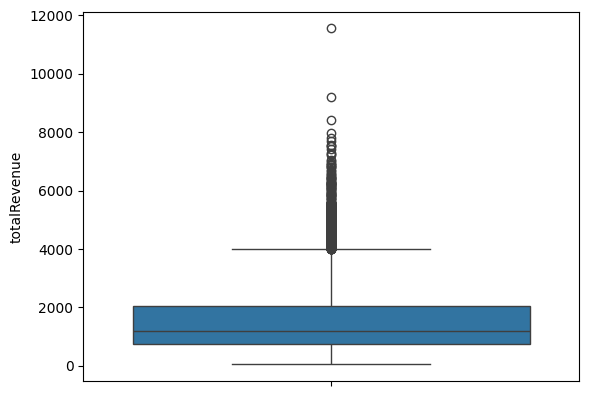

In [80]:
sns.boxplot(data=itemsRevenue,y='totalRevenue')

In [81]:
itemsRevenue.describe()

totalRevenue   totalOrders  totalCustomers    totalItems
count  13542.000000  13542.000000    13542.000000  13542.000000
mean    1507.695909      1.861837        1.860287      1.861837
std     1096.691381      1.005725        1.003931      1.005725
min       46.000000      1.000000        1.000000      1.000000
25%      742.000000      1.000000        1.000000      1.000000
50%     1186.000000      2.000000        2.000000      2.000000
75%     2042.750000      2.000000        2.000000      2.000000
max    11556.000000      9.000000        9.000000      9.000000

In [82]:
itemsRevenue['Ranking'] = itemsRevenue.apply(lambda x: 'Low' if (x['totalRevenue'] < 742)
                                   else ('Medium' if (x['totalRevenue'] >= 742 and x['totalRevenue'] < 1186)
                                         else ('High' if (x['totalRevenue'] >= 1186 and x['totalRevenue'] < 2042)
                                               else 'Cash Cow')), axis = 1)

In [83]:
itemsRevenue.head()

Product             Brand  totalRevenue  totalOrders  \
0  007Jlease0.316606245376631  WaQqK)2JxI(=dac=          1870            2   
1  007Ywatch0.906707330424838  MouDd/fn,XEARhBp          1244            2   
2  017Vorial0.336819995225967  do"hq2Gv(1b#'qX=           843            1   
3  032Olease0.888710698168418  03%@8(c"v>iM'v1A          2508            2   
4  032ekbook0.534713694668182  03%@8(c"v>iM'v1A          3051            3   

   totalCustomers  totalItems   Ranking  
0               2           2      High  
1               2           2      High  
2               1           1    Medium  
3               2           2  Cash Cow  
4               3           3  Cash Cow

In [84]:
itemsTraffic = trans_detail.groupby(['Brand','Product']).agg(totalUsers = ('users','sum'),
                                                        totalUniquePageviews=('uniquePageviews','sum'),
                                                        totalPageviews = ('pageviews','sum'))

<Axes: ylabel='totalPageviews'>

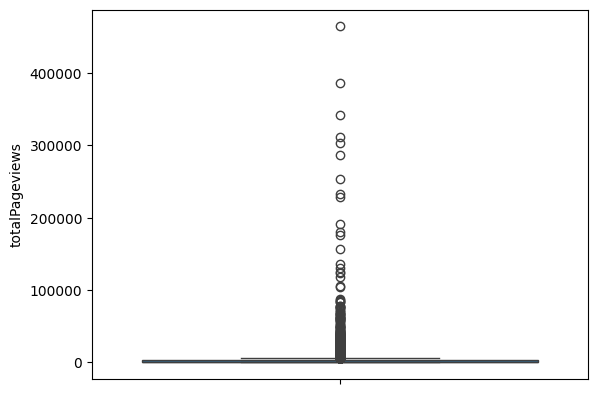

In [85]:
sns.boxplot(data=itemsTraffic,y='totalPageviews')

In [86]:
itemsTraffic.describe()

totalUsers  totalUniquePageviews  totalPageviews
count   13542.000000          13542.000000    13542.000000
mean     2654.975410           2732.409319     3057.014990
std      7981.995469           8324.328043    10640.756467
min         0.000000              0.000000        0.000000
25%       490.000000            500.000000      534.000000
50%      1040.000000           1062.000000     1144.000000
75%      2399.750000           2453.500000     2656.000000
max    430446.000000         442216.000000   464354.000000

In [87]:
itemsTraffic['trafficRanking'] = itemsTraffic.apply(lambda x: 'Low' if (x['totalPageviews'] < 358)
                                   else ('Medium' if (x['totalPageviews'] >= 358 and x['totalPageviews'] < 683)
                                         else ('High' if (x['totalPageviews'] >= 683 and x['totalPageviews'] < 1499)
                                               else 'Most Popular')), axis = 1)

In [88]:
itemsTraffic

totalUsers  \
Brand            Product                                   
!lMifo~0~N65rM}2 skyK-date0.237469692167954          279   
#B_-`aDe`}CVt'!A 18-`lease0.952310074301681         1062   
                 202rvideo0.0198947312483128         108   
                 6layenter0.832904875099387          786   
                 a-cPrants0.941652415797535          728   
...                                                  ...   
ze\yQP9Ju,s(O|>] zel`video0.809705577564763           29   
                 zelkvideo0.542849205536647           36   
                 zeloalbum0.673018009367897           48   
Ét2:1))2]qB2`9;^ etua-baby0.472156023137423         2320   
                 etujation0.0817298363167827         127   

                                              totalUniquePageviews  \
Brand            Product                                             
!lMifo~0~N65rM}2 skyK-date0.237469692167954                    285   
#B_-`aDe`}CVt'!A 18-`lease0.952310074301681                   1095   
                 202rvideo0.0198947312483128                   109   
                 6layenter0.832904875099387                    807   
                 a-cPrants0.941652415797535                    740   
...                                                            ...   
ze\yQP9Ju,s(O|>] zel`video0.809705577564763                     30   
                 zelkvideo0.542849205536647                     38   
                 zeloalbum0.673018009367897                     48   
Ét2:1))2]qB2`9;^ etua-baby0.472156023137423                   2356   
                 etujation0.0817298363167827                   128   

                                              totalPageviews trafficRanking  
Brand            Product                                                     
!lMifo~0~N65rM}2 skyK-date0.237469692167954              306            Low  
#B_-`aDe`}CVt'!A 18-`lease0.952310074301681             1268           High  
                 202rvideo0.0198947312483128             113            Low  
                 6layenter0.832904875099387              873           High  
                 a-cPrants0.941652415797535              794           High  
...                                                      ...            ...  
ze\yQP9Ju,s(O|>] zel`video0.809705577564763               33            Low  
                 zelkvideo0.542849205536647               44            Low  
                 zeloalbum0.673018009367897               54            Low  
Ét2:1))2]qB2`9;^ etua-baby0.472156023137423             2584   Most Popular  
                 etujation0.0817298363167827             136            Low  

[13542 rows x 4 columns]

In [89]:
itemsTraffic= itemsTraffic.reset_index(level=0)

In [90]:
itemsTraffic

Brand  totalUsers  \
Product                                                     
skyK-date0.237469692167954   !lMifo~0~N65rM}2         279   
18-`lease0.952310074301681   #B_-`aDe`}CVt'!A        1062   
202rvideo0.0198947312483128  #B_-`aDe`}CVt'!A         108   
6layenter0.832904875099387   #B_-`aDe`}CVt'!A         786   
a-cPrants0.941652415797535   #B_-`aDe`}CVt'!A         728   
...                                       ...         ...   
zel`video0.809705577564763   ze\yQP9Ju,s(O|>]          29   
zelkvideo0.542849205536647   ze\yQP9Ju,s(O|>]          36   
zeloalbum0.673018009367897   ze\yQP9Ju,s(O|>]          48   
etua-baby0.472156023137423   Ét2:1))2]qB2`9;^        2320   
etujation0.0817298363167827  Ét2:1))2]qB2`9;^         127   

                             totalUniquePageviews  totalPageviews  \
Product                                                             
skyK-date0.237469692167954                    285             306   
18-`lease0.952310074301681                   1095            1268   
202rvideo0.0198947312483128                   109             113   
6layenter0.832904875099387                    807             873   
a-cPrants0.941652415797535                    740             794   
...                                           ...             ...   
zel`video0.809705577564763                     30              33   
zelkvideo0.542849205536647                     38              44   
zeloalbum0.673018009367897                     48              54   
etua-baby0.472156023137423                   2356            2584   
etujation0.0817298363167827                   128             136   

                            trafficRanking  
Product                                     
skyK-date0.237469692167954             Low  
18-`lease0.952310074301681            High  
202rvideo0.0198947312483128            Low  
6layenter0.832904875099387            High  
a-cPrants0.941652415797535            High  
...                                    ...  
zel`video0.809705577564763             Low  
zelkvideo0.542849205536647             Low  
zeloalbum0.673018009367897             Low  
etua-baby0.472156023137423    Most Popular  
etujation0.0817298363167827            Low  

[13542 rows x 5 columns]

In [91]:
itemsTraffic.reset_index(inplace=True)

In [92]:
itemsTraffic

Product             Brand  totalUsers  \
0       skyK-date0.237469692167954  !lMifo~0~N65rM}2         279   
1       18-`lease0.952310074301681  #B_-`aDe`}CVt'!A        1062   
2      202rvideo0.0198947312483128  #B_-`aDe`}CVt'!A         108   
3       6layenter0.832904875099387  #B_-`aDe`}CVt'!A         786   
4       a-cPrants0.941652415797535  #B_-`aDe`}CVt'!A         728   
...                            ...               ...         ...   
13537   zel`video0.809705577564763  ze\yQP9Ju,s(O|>]          29   
13538   zelkvideo0.542849205536647  ze\yQP9Ju,s(O|>]          36   
13539   zeloalbum0.673018009367897  ze\yQP9Ju,s(O|>]          48   
13540   etua-baby0.472156023137423  Ét2:1))2]qB2`9;^        2320   
13541  etujation0.0817298363167827  Ét2:1))2]qB2`9;^         127   

       totalUniquePageviews  totalPageviews trafficRanking  
0                       285             306            Low  
1                      1095            1268           High  
2                       109             113            Low  
3                       807             873           High  
4                       740             794           High  
...                     ...             ...            ...  
13537                    30              33            Low  
13538                    38              44            Low  
13539                    48              54            Low  
13540                  2356            2584   Most Popular  
13541                   128             136            Low  

[13542 rows x 6 columns]

In [93]:
itemsRevenue

Product             Brand  totalRevenue  \
0       007Jlease0.316606245376631  WaQqK)2JxI(=dac=          1870   
1       007Ywatch0.906707330424838  MouDd/fn,XEARhBp          1244   
2       017Vorial0.336819995225967  do"hq2Gv(1b#'qX=           843   
3       032Olease0.888710698168418  03%@8(c"v>iM'v1A          2508   
4       032ekbook0.534713694668182  03%@8(c"v>iM'v1A          3051   
...                            ...               ...           ...   
13537    zoeu-news0.86467184397373  HuowRFWgR&em9:D          1233   
13538   zoolakami0.244773192837841  Zor7(ER*AxqjE*+           365   
13539  zozQation0.0106886180391892  ZofpjB"<UT3{Atib           604   
13540   zozl-info0.445888607941033  ZofpjB"<UT3{Atib           577   
13541   zseFtream0.740893188572541  ZshVf>1bM}0lEEbH          1936   

       totalOrders  totalCustomers  totalItems   Ranking  
0                2               2           2      High  
1                2               2           2      High  
2                1               1           1    Medium  
3                2               2           2  Cash Cow  
4                3               3           3  Cash Cow  
...            ...             ...         ...       ...  
13537            1               1           1      High  
13538            1               1           1       Low  
13539            2               2           2       Low  
13540            1               1           1       Low  
13541            2               2           2      High  

[13542 rows x 7 columns]

In [94]:
revenue_popularity = itemsRevenue.merge(itemsTraffic,on = ['Product','Brand'],
                                         how = 'inner').sort_values(['totalRevenue','totalPageviews'],ascending=False)

In [95]:
revenue_popularity.head()

Product             Brand  totalRevenue  \
5234   hypsrview0.321288570724117  Il^(xPdB:S`#irqz         11556   
10204  reeelease0.452821711209563  Relp\+KJ?D,cWw0P          9205   
1465   audE-info0.884915261087885  Ac8IJsKH,4xtY.Tk          8428   
6285    kinv-news0.29905739542661  DiCo4(99zZ<nkafj          7980   
13383  ymc_orson0.319251813809483  YMbpE$ev3qMx-h*E          7794   

       totalOrders  totalCustomers  totalItems   Ranking  totalUsers  \
5234             9               9           9  Cash Cow        4716   
10204            7               7           7  Cash Cow        1806   
1465             7               7           7  Cash Cow        7602   
6285             6               6           6  Cash Cow        4044   
13383            6               6           6  Cash Cow        1188   

       totalUniquePageviews  totalPageviews trafficRanking  
5234                   4860            5283   Most Popular  
10204                  1813            1974   Most Popular  
1465                   7777            8442   Most Popular  
6285                   4170            4596   Most Popular  
13383                  1218            1338           High

In [96]:
revenue_popularity = revenue_popularity[['Brand','Product','totalRevenue','totalPageviews','Ranking','trafficRanking']]

In [97]:
revenue_popularity

Brand                      Product  totalRevenue  \
5234   Il^(xPdB:S`#irqz   hypsrview0.321288570724117         11556   
10204  Relp\+KJ?D,cWw0P   reeelease0.452821711209563          9205   
1465   Ac8IJsKH,4xtY.Tk   audE-info0.884915261087885          8428   
6285   DiCo4(99zZ<nkafj    kinv-news0.29905739542661          7980   
13383  YMbpE$ev3qMx-h*E   ymc_orson0.319251813809483          7794   
...                 ...                          ...           ...   
172    Bedz04LN6g4NY{R5   2g-aation0.859210237517232            72   
4433   Br0Aza@`0k<LPOVi    g-hxrowns0.35584537222102            69   
6526   Levk)A7u]J|c_tFD   legX-info0.422268138697415            63   
12637  Lo:}7^:YFSc4xYIs  umaZction0.0701712715774042            60   
13051  Wae3Jy6[wA3Y#k7h   wacNkbook0.849290713312118            46   

       totalPageviews   Ranking trafficRanking  
5234             5283  Cash Cow   Most Popular  
10204            1974  Cash Cow   Most Popular  
1465             8442  Cash Cow   Most Popular  
6285             4596  Cash Cow   Most Popular  
13383            1338  Cash Cow           High  
...               ...       ...            ...  
172               278       Low            Low  
4433             3288       Low   Most Popular  
6526             1387       Low           High  
12637             513       Low         Medium  
13051             769       Low           High  

[13542 rows x 6 columns]

In [98]:
pd.DataFrame(revenue_popularity.groupby(['trafficRanking','Ranking'])['Product'].count())

Product
trafficRanking Ranking          
High           Cash Cow      905
               High          923
               Low           876
               Medium        898
Low            Cash Cow      167
               High          441
               Low           761
               Medium        631
Medium         Cash Cow      339
               High          533
               Low           760
               Medium        750
Most Popular   Cash Cow     1978
               High         1491
               Low           986
               Medium       1103

In [99]:
revenue_popularity[(revenue_popularity['trafficRanking'] == 'Most Popular') & (revenue_popularity['Ranking'] == 'Cash Cow')].sort_values(['totalRevenue','totalPageviews'],ascending=False).head(5)

Brand                     Product  totalRevenue  \
5234   Il^(xPdB:S`#irqz  hypsrview0.321288570724117         11556   
10204  Relp\+KJ?D,cWw0P  reeelease0.452821711209563          9205   
1465   Ac8IJsKH,4xtY.Tk  audE-info0.884915261087885          8428   
6285   DiCo4(99zZ<nkafj   kinv-news0.29905739542661          7980   
2212   BMh._Fx~"+dbZy|,   bmwk-20210.31690704020655          7686   

       totalPageviews   Ranking trafficRanking  
5234             5283  Cash Cow   Most Popular  
10204            1974  Cash Cow   Most Popular  
1465             8442  Cash Cow   Most Popular  
6285             4596  Cash Cow   Most Popular  
2212             4518  Cash Cow   Most Popular

### <b><u> CLV (Customer lifetim value):

### <b><u>RFM (Recency-Frequency-Monetary):

In [100]:
recency_df= pd.DataFrame(df.groupby(by='CustomerID', as_index=False)['TransactionDate'].max())

In [101]:
recency_df['Recency']= df['TransactionDate'].apply(lambda x: (date_today - x).days)
recency_df

CustomerID TransactionDate  Recency
0             0      2020-12-23      282
1             1      2020-12-15      167
2             2      2020-12-11      141
3             3      2020-12-20       21
4             4      2020-12-22       50
..          ...             ...      ...
765         765      2020-12-05      139
766         766      2020-07-07      233
767         767      2020-12-26      149
768         768      2020-12-27      281
769         769      2020-12-22      170

[770 rows x 3 columns]

In [102]:
frequency_df = pd.DataFrame(df.groupby(["CustomerID"]).agg({"OrderID":"nunique"}).reset_index())
frequency_df.rename(columns={"OrderID":"Frequency"}, inplace=True)
frequency_df

CustomerID  Frequency
0             0         15
1             1         14
2             2          7
3             3          6
4             4         14
..          ...        ...
765         765         13
766         766          2
767         767         19
768         768         15
769         769         10

[770 rows x 2 columns]

In [103]:
monetary_df = trans_detail.groupby('CustomerID', as_index=False)['SellPrice'].sum()
monetary_df.rename(columns={"SellPrice":"Monetary"}, inplace=True)

In [104]:
dfRF = recency_df.merge(frequency_df, on='CustomerID')
dfRFM = dfRF.merge(monetary_df, on='CustomerID')

In [105]:
dfRFM["recency_score"]  = pd.qcut(dfRFM['Recency'], 5, labels=[5, 4, 3, 2, 1])
dfRFM["frequency_score"]= pd.qcut(dfRFM['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
dfRFM["monetary_score"] = pd.qcut(dfRFM['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [106]:
dfRFM['RFM_SCORE'] = dfRFM.recency_score.astype(str)+ dfRFM.frequency_score.astype(str) + dfRFM.monetary_score.astype(str)


In [107]:
Customers = customers.merge(dfRFM, left_on='ID',right_on='CustomerID')


In [108]:
RFM_seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [109]:
Customers['Segment'] = Customers['RFM_SCORE'].replace(RFM_seg_map, regex=True)

In [110]:
Customers[(Customers['Segment'] == 'Champions')].sort_values(['Monetary','Recency'],ascending=False).head(5)

ID               FirstName                LastName              Country  \
56    56    Ke0.0970211287886591    Lie0.704766923797848        GER - Germany   
720  720  Wilfr0.819812994698298  Tiron0.702516186841342        GER - Germany   
672  672    Tio0.914017572562866      x0.868064831622167        GER - Germany   
186  186     He0.936026327871086   Chen0.730908279838007  UK - United Kingdom   
408  408    Mr.0.996644024548015    Tan0.662463855720801        GER - Germany   

    DateJoined Gender   Birthday Newsletter  \
56  2020-05-01      B 1992-04-09          Y   
720 2020-12-04      B 1999-04-28          Y   
672 2020-12-14      M 1998-06-29          N   
186 2020-08-16      B 1998-12-13          N   
408 2019-06-15      F 2001-04-24          N   

                                          FullName  Age  ...  CustomerID  \
56       Ke0.0970211287886591 Lie0.704766923797848   28  ...          56   
720  Wilfr0.819812994698298 Tiron0.702516186841342   21  ...         720   
672        Tio0.914017572562866 x0.868064831622167   22  ...         672   
186      He0.936026327871086 Chen0.730908279838007   22  ...         186   
408      Mr.0.996644024548015 Tan0.662463855720801   19  ...         408   

     TransactionDate Recency  Frequency  Monetary  recency_score  \
56        2020-12-25     100         18     62539              4   
720       2020-12-08       3         18     53747              5   
672       2020-12-15      85         20     53630              4   
186       2020-12-21      46         18     53247              5   
408       2020-12-27     128         19     53088              4   

    frequency_score monetary_score RFM_SCORE    Segment  
56                5              5       455  Champions  
720               5              5       555  Champions  
672               5              5       455  Champions  
186               5              5       555  Champions  
408               5              5       455  Champions  

[5 rows x 21 columns]

In [111]:
dfCustStats = Customers[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])

In [112]:
!pip install squarify
import squarify

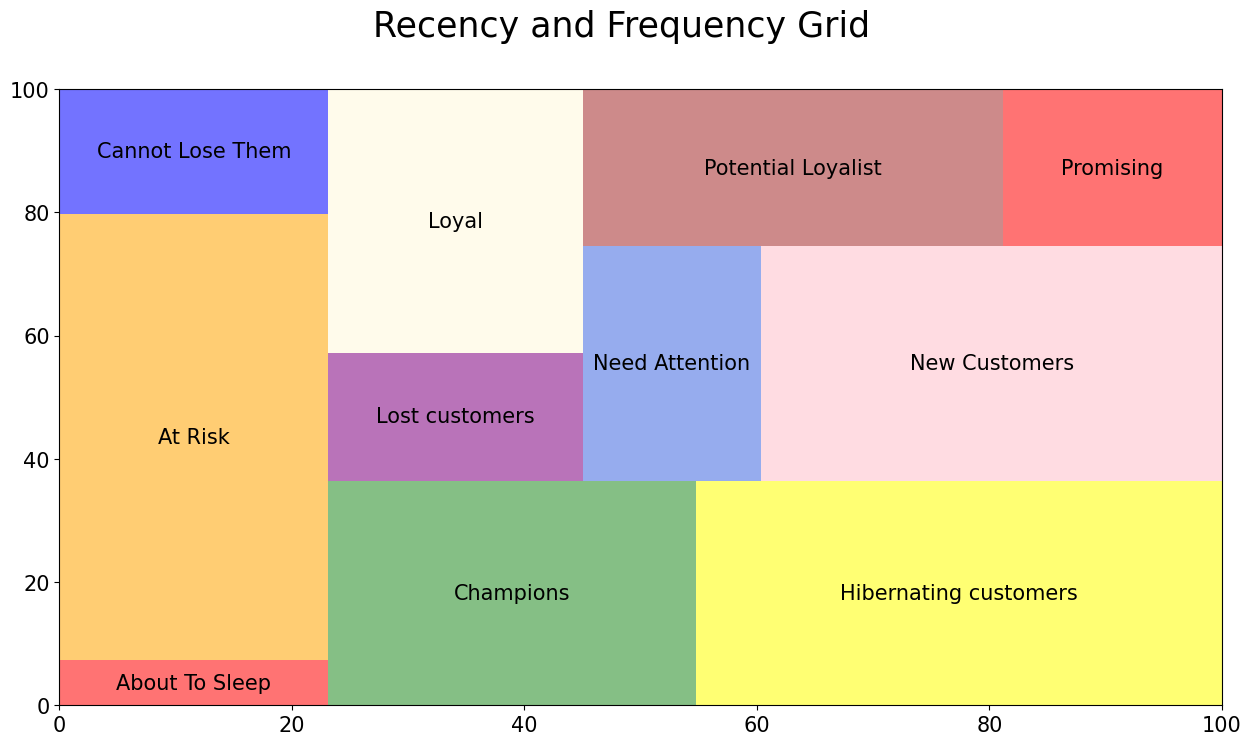

In [113]:
# Treemap by recency/frequency
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=dfCustStats["Recency"]["count"], label=dfCustStats.index,
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=25);

### <b><u>Using Clustering model of Machine Learning

In [114]:
from sklearn.cluster import KMeans

In [115]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     770 non-null    int64         
 1   FirstName              770 non-null    object        
 2   LastName               770 non-null    object        
 3   Country                770 non-null    object        
 4   DateJoined             770 non-null    datetime64[ns]
 5   Gender                 770 non-null    object        
 6   Birthday               770 non-null    datetime64[ns]
 7   Newsletter             770 non-null    object        
 8   FullName               770 non-null    object        
 9   Age                    770 non-null    int64         
 10  relationship_duration  770 non-null    int64         
 11  total_orders           770 non-null    int64         
 12  total_revenue          770 non-null    int64         
 13  Loyal

In [116]:
dfCluster = customer_data[['Loyalty','Monetary','Youth']]

In [117]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [118]:
kmeans.fit(dfCluster)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [119]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

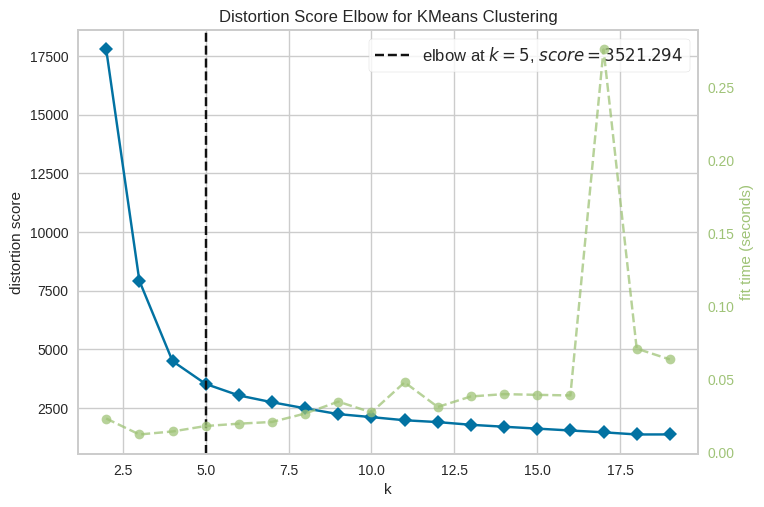

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(dfCluster)
elbow.show()

In [121]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(dfCluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [122]:
dfCluster['Cluster']= kmeans.labels_
dfCluster.head()

<ipython-input-122-971ea96c6d79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCluster['Cluster']= kmeans.labels_


Loyalty  Monetary  Youth  Cluster
0      11         3      4        4
1       8         3      1        3
2       7         2      2        3
3       7         1      4        3
4       7         4      3        3

In [123]:
dfStats = dfCluster.groupby("Cluster").agg(['mean','median', 'min', 'max', 'count'])

In [124]:
dfStats.style.background_gradient(cmap='YlGnBu')

## <b><u>VII. Model training</u></b>
### 1. <b><u>How web traffic impacts on business performance? </u></b>
* Diagnostic prediction by Regression models of Machine Learning.


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [126]:
trans_detail_filtered= trans_detail.groupby('Product').agg(uniquePageviews=('uniquePageviews', 'mean'),
                                                            existing_duration=('existing_duration', 'mean'),
                                                            product_sales_vol=('ItemID','count')).reset_index()

In [127]:
x=trans_detail_filtered[['uniquePageviews','existing_duration']]
y=trans_detail_filtered['product_sales_vol']

#### Random Frorest Regressor

In [128]:
from sklearn.ensemble import RandomForestRegressor

# Split the data for each target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor for y
reg_y = RandomForestRegressor()
# Train the regressor for y
reg_y.fit(x_train, y_train)
# Make predictions for y
y_pred = reg_y.predict(x_test)

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae_y = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error for y:", mae_y)

# Calculate Mean Squared Error (MSE)
mse_y = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for y1:", mse_y)

# Calculate R-squared (R^2) score
r2_y = r2_score(y_test, y_pred)
print("R-squared (R^2) score for y:", r2_y)

Mean Absolute Error for y: 0.8799649844433898
Mean Squared Error for y1: 1.2533348328700251
R-squared (R^2) score for y: -0.22113711098532263


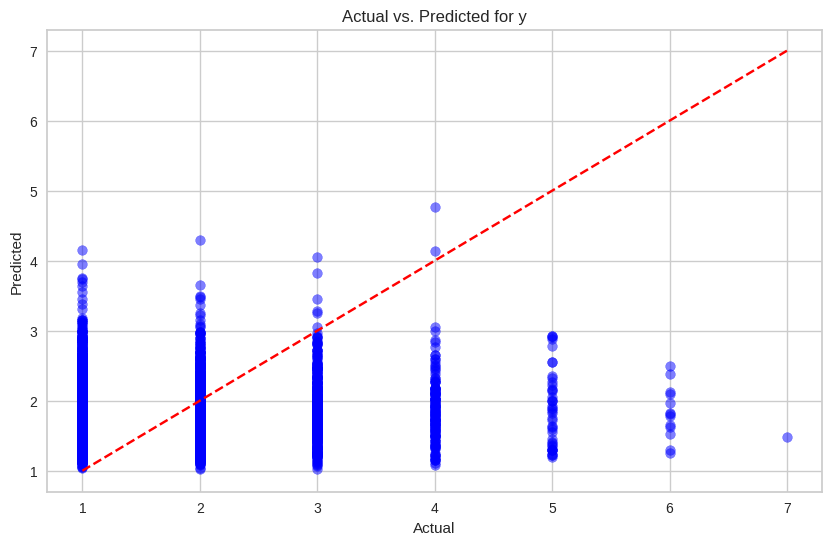

In [130]:
# Plot actual vs. predicted values for y
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [131]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor for y
reg_y = RandomForestRegressor()

# Train the regressor for y
reg_y.fit(x_train, y_train)

# Get feature importances
feature_importances = reg_y.feature_importances_

# Print feature importances
for i, feature in enumerate(x.columns):
    print(f'{feature}: {feature_importances[i]}')

uniquePageviews: 0.6181844694430215
existing_duration: 0.38181553055697853


In summary, these metrics suggest that the model is not performing well in predicting the dependent variable based on the independent variables. Further improvements to the model or consideration of other factors may be necessary to enhance its accuracy.

#### Linear Regression

In [132]:
from sklearn.linear_model import LinearRegression

# Split the data for each target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model for y
reg_y = LinearRegression()

# Train the regressor for y
reg_y.fit(x_train, y_train)

# Make predictions for y
y_pred = reg_y.predict(x_test)

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae_y = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error for y:", mae_y)

# Calculate Mean Squared Error (MSE)
mse_y = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for y1:", mse_y)

# Calculate R-squared (R^2) score
r2_y = r2_score(y_test, y_pred)
print("R-squared (R^2) score for y:", r2_y)

Mean Absolute Error for y: 0.7934015722110362
Mean Squared Error for y1: 1.026408780586056
R-squared (R^2) score for y: -4.070751363571823e-05


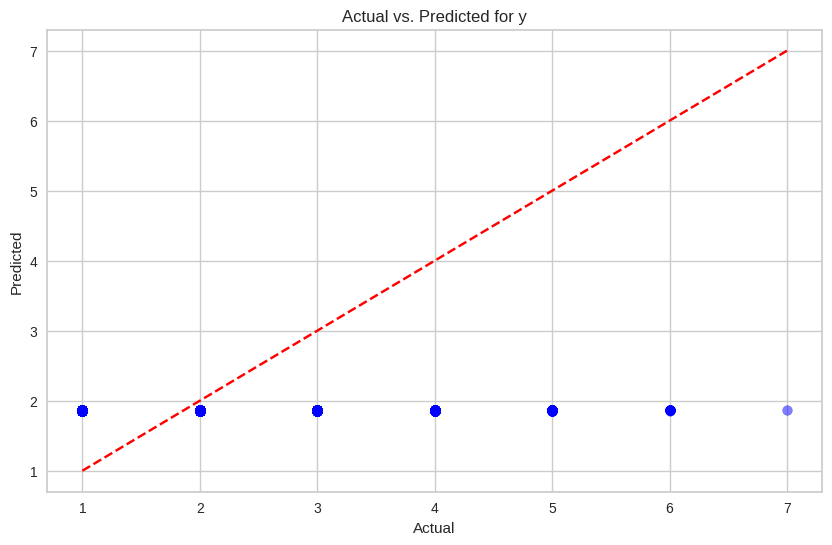

In [134]:
# Plot actual vs. predicted values for y
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [135]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model for y
reg_y = LinearRegression()

# Train the model for y
reg_y.fit(x_train, y_train)

# Get coefficients
coefficients = reg_y.coef_

# Print coefficients
for i, feature in enumerate(x.columns):
    print(f'{feature}: {coefficients[i]}')

uniquePageviews: 1.0128598079133835e-07
existing_duration: -3.110612239485031e-05


In summary, these metrics suggest that the model is not performing well in predicting the dependent variable based on the independent variables. Further improvements to the model or consideration of other factors may be necessary to enhance its accuracy.

#### Logistic Regression

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data for each target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(x_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R^2) score:", r2)

Mean Absolute Error: 0.8564045773348099
Mean Squared Error: 1.7600590623846437
R-squared (R^2) score: -0.7148437769676241


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


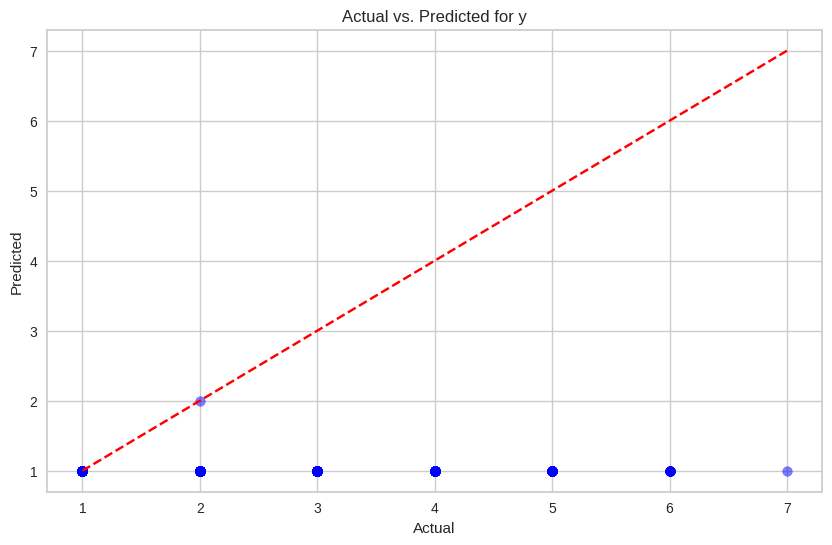

In [137]:
# Plot actual vs. predicted values for y
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [138]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model for y
reg_y = LogisticRegression()

# Train the model for y
reg_y.fit(x_train, y_train)

# Get coefficients
coefficients = reg_y.coef_

# Print coefficients
for i, feature in enumerate(x.columns):
    print(f'{feature}: {coefficients[0][i]}')

uniquePageviews: 0.0023523799677731758
existing_duration: 0.011268726145307965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. <b><u>Customer segmentation </u></b>

In [139]:
dfCluster = dfCluster[['Loyalty','Monetary','Youth']]

In [140]:
pip install kneed

In [141]:
from kneed import KneeLocator

In [142]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dfCluster)
    sse.append(kmeans.inertia_)

In [143]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [144]:
kl.elbow

3

In [145]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dfCluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [146]:
dfCluster["Cluster Labels"] = kmeans.labels_

In [147]:
dfCluster['Cluster Labels'].value_counts()

0    288
2    192
1    163
3    127
Name: Cluster Labels, dtype: int64

Overall, based on these scores, we can conclude that the clustering model appears to perform well in terms of cluster separation and cohesion. However, it's essential to consider domain knowledge and the specific context of the data when interpreting these scores.

## <b><u>Conclusion:</u></b>
In terms of the accurace of this research through applying Machine Learning's models, the testing results show the high imbalance in the input data.

The percentile of models are skewed far away from their median. conseequently, the results of analysis models wich were used to predict the objects, are totally biased towards one side.

The insight gained from this analysis is there are correlational effects betwween them, however, it just expresses that effect for one dimension of the vector.

Particulartly, toward favorability object (Rating), It is quitely correct that the high initial technical indicators bring the high favored, but when decrease the initial technical indicators.

The object tend to go out the gap of a correct result. The contrast was witnessed in the model of the popularity (Installs).

To improve the accuracy of this research, the reseach object should be mined deeper in each categorical features.

Moreover, applying techniques which assist handling imbalanced data, need to be implemented such as resampling or collecting real data, etc.
